In [1]:
import modeller
import fitter

import casadi as ca
from scipy.integrate import solve_ivp
import numpy as np
from matplotlib import pyplot as plt

In [2]:
p_true = [0.0005, 0.1]
tspan = [0, 20]
def system(t, y, p):
    return [
        -p[0]*y[0]*y[1],
        p[0]*y[0]*y[1] - p[1]*y[1],
        p[1]*y[1]
    ]
sol = solve_ivp(lambda t, y: system(t, y, p_true), tspan, [9999, 1, 0])

In [22]:
data = sol.y[-1, :]
data_pd = np.array([[i] for i in data])
config = {
    "grid_size": 100,
    "basis_number": 100,
    "model_form": {
        "state": 3,
        "parameters": 2
    },
    "time_span": tspan,
    "knot_function": None,
    "model": system,
    "dataset": {"y": data_pd, "t": sol.t},
    "observation_vector": [2],
    "weightings":[
        [1]*3,
        [1]*len(sol.t)
    ],
    "regularisation_vector": p_true,
}

In [23]:
model = modeller.Model(config)
objective = fitter.Objective()
objective.make(config, config['dataset'], model)

solver_setup = {
    'f': objective.objective,
    'x': ca.vcat(objective.input_list),
    'p': ca.hcat([objective.rho, objective.alpha])
}

solver = ca.nlpsol('solver', 'ipopt', solver_setup)

In [24]:
p0 = 0.001*np.ones(2)
c0 = [np.ones(config['basis_number']) for _ in range(3)]
x0 = np.hstack([p0, *c0])

In [25]:
prange = np.logspace(-6, -2, num=25)
solutions = []
xguess = x0
for p in prange:
    solutions.append(solver(x0=xguess, p=[p, 1e-4], lbx=0))
    xguess = np.array(solutions[-1]['x']).flatten()

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    35653

Total number of variables............................:      302
                     variables with only lower bounds:      302
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

  84 3.5152029e-003 0.00e+000 3.50e+000  -5.7 4.12e+003    -  1.00e+000 1.00e+000f  1
  85 3.4857707e-003 0.00e+000 2.87e+000  -5.7 3.93e+003    -  1.00e+000 1.00e+000f  1
  86 3.4692431e-003 0.00e+000 3.96e+000  -5.7 4.58e+003    -  1.00e+000 1.00e+000f  1
  87 3.4461359e-003 0.00e+000 2.04e+000  -5.7 3.62e+003    -  1.00e+000 1.00e+000f  1
  88 3.4500065e-003 0.00e+000 6.14e+000  -5.7 5.81e+003    -  1.00e+000 1.00e+000f  1
  89 3.4222723e-003 0.00e+000 5.96e-001  -5.7 2.49e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  90 3.4284908e-003 0.00e+000 5.59e+000  -5.7 1.10e+004    -  1.00e+000 5.00e-001f  2
  91 3.4091900e-003 0.00e+000 5.39e-001  -5.7 2.47e+003    -  1.00e+000 1.00e+000f  1
  92 3.4109543e-003 0.00e+000 4.16e+000  -5.7 1.00e+004    -  1.00e+000 5.00e-001f  2
  93 3.4009484e-003 0.00e+000 6.21e-001  -5.7 2.53e+003    -  1.00e+000 1.00e+000f  1
  94 3.4001511e-003 0.00e+000 2.19e+000  -5.7 7.34e+003    

   1 5.9259471e-002 0.00e+000 5.03e+003  -1.0 1.91e-001   2.0 7.83e-001 9.90e-001f  1
   2 1.2872197e-002 0.00e+000 1.61e+002  -1.0 1.00e+001    -  9.90e-001 1.00e+000f  1
   3 9.7629854e-001 0.00e+000 2.35e+004  -1.0 9.57e+002    -  8.26e-001 5.80e-001f  1
   4 9.7853451e-001 0.00e+000 3.91e+004  -1.0 9.42e+003    -  5.81e-003 6.25e-002f  5
   5 8.8766521e-001 0.00e+000 7.57e+001  -1.0 5.23e-003   1.5 9.91e-001 1.00e+000f  1
   6 8.8218482e-001 0.00e+000 1.78e-001  -1.0 1.60e-002   1.0 1.00e+000 1.00e+000f  1
   7 8.6140927e-001 0.00e+000 2.01e-001  -2.5 5.43e-002   0.6 1.00e+000 1.00e+000f  1
   8 8.1046256e-001 0.00e+000 1.88e-001  -2.5 1.52e-001   0.1 1.00e+000 1.00e+000f  1
   9 6.9642049e-001 0.00e+000 1.54e-001  -2.5 3.75e-001  -0.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 5.2937835e-001 0.00e+000 9.36e-002  -2.5 6.82e-001  -0.9 1.00e+000 1.00e+000f  1
  11 4.1055311e-001 0.00e+000 3.17e-002  -2.5 6.93e-001  -1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  90 3.7445394e-003 0.00e+000 3.75e+000  -8.6 3.65e+003    -  1.00e+000 1.00e+000f  1
  91 3.7441534e-003 0.00e+000 8.28e+000  -8.6 5.36e+003    -  1.00e+000 1.00e+000f  1
  92 3.7435928e-003 0.00e+000 1.63e+000  -8.6 2.54e+003    -  1.00e+000 1.00e+000f  1
  93 3.7433488e-003 0.00e+000 7.79e+000  -8.6 9.94e+003    -  1.00e+000 5.00e-001f  2
  94 3.7428862e-003 0.00e+000 1.53e+000  -8.6 2.50e+003    -  1.00e+000 1.00e+000f  1
  95 3.7426835e-003 0.00e+000 7.29e+000  -8.6 9.78e+003    -  1.00e+000 5.00e-001f  2
  96 3.7423033e-003 0.00e+000 1.45e+000  -8.6 2.46e+003    -  1.00e+000 1.00e+000f  1
  97 3.7421340e-003 0.00e+000 6.75e+000  -8.6 9.56e+003    -  1.00e+000 5.00e-001f  2
  98 3.7418240e-003 0.00e+000 1.38e+000  -8.6 2.44e+003    -  1.00e+000 1.00e+000f  1
  99 3.7416807e-003 0.00e+000 6.10e+000  -8.6 9.21e+003    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

  27 7.9870934e-002 0.00e+000 5.74e-004  -8.6 1.13e+000  -5.2 1.00e+000 5.35e-001f  1
  28 7.9827775e-002 0.00e+000 3.25e-003  -8.6 2.23e+000  -5.6 1.00e+000 1.00e+000f  1
  29 7.9739480e-002 0.00e+000 3.55e-002  -8.6 4.69e+000  -6.1 1.00e+000 9.35e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30 7.9556636e-002 0.00e+000 2.13e-001  -8.6 6.38e+000  -6.6 1.00e+000 1.00e+000f  1
  31 7.9178112e-002 0.00e+000 3.39e-002  -8.6 1.12e+001  -7.1 1.00e+000 1.00e+000f  1
  32 7.8599244e-002 0.00e+000 7.95e+000  -8.6 2.45e+001  -7.5 1.00e+000 6.79e-001f  1
  33 7.6475513e-002 0.00e+000 2.42e+002  -8.6 5.13e+001  -8.0 1.00e+000 1.00e+000f  1
  34 6.9985793e-002 0.00e+000 2.90e+003  -8.6 1.84e+002  -8.5 6.95e-001 1.00e+000f  1
  35 6.4647111e-002 0.00e+000 5.52e+003  -8.6 2.90e+004    -  7.90e-001 3.30e-001f  2
  36 5.4776312e-002 0.00e+000 7.10e+002  -8.6 5.82e+003    -  7.44e-001 1.00e+000f  1
  37 5.0076257e-002 0.00e+000 2.22e+003  -8.6 1.97e+004    

  14 4.4997786e-001 0.00e+000 1.45e+005  -1.7 3.00e+004    -  5.40e-001 1.00e+000f  1
  15 3.7755548e-001 0.00e+000 1.18e+005  -1.7 1.33e+004    -  6.66e-001 1.00e+000f  1
  16 3.1021689e-001 0.00e+000 3.86e-002  -1.7 3.13e-002   0.1 1.00e+000 1.00e+000f  1
  17 1.9173936e-001 0.00e+000 9.09e+004  -2.5 3.85e+003    -  9.11e-001 1.00e+000f  1
  18 3.0000331e-001 0.00e+000 8.09e+004  -2.5 1.01e+004    -  1.00e+000 1.00e+000f  1
  19 3.3144284e-001 0.00e+000 6.45e+004  -2.5 6.65e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20 2.2089926e-001 0.00e+000 6.15e-003  -2.5 1.49e-002  -0.4 1.00e+000 1.00e+000f  1
  21 1.8242129e-001 0.00e+000 2.77e+004  -3.8 2.83e+003    -  9.45e-001 1.00e+000f  1
  22 1.8207234e-001 0.00e+000 4.65e+004  -3.8 1.28e+004    -  9.89e-001 4.91e-001f  2
  23 1.8003372e-001 0.00e+000 2.61e+004  -3.8 9.58e+003    -  1.00e+000 1.00e+000f  1
  24 1.8014565e-001 0.00e+000 3.45e+003  -3.8 1.82e+004    

 106 5.3135551e-003 0.00e+000 2.92e+002  -8.6 5.37e+004    -  1.00e+000 5.54e-001f  1
 107 5.2103189e-003 0.00e+000 2.20e+002  -8.6 6.84e+004    -  9.38e-001 5.00e-001f  2
 108 5.1451895e-003 0.00e+000 2.07e+002  -8.6 1.18e+005    -  4.55e-001 2.44e-001f  2
 109 5.0900498e-003 0.00e+000 1.26e+002  -8.6 4.49e+004    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110 5.0271759e-003 0.00e+000 3.42e+002  -8.6 2.89e+001  -8.9 1.00e+000 1.00e+000f  1
 111 5.0030568e-003 0.00e+000 2.41e+002  -8.6 5.99e+004    -  7.92e-001 3.34e-001f  2
 112 4.9825754e-003 0.00e+000 7.09e+000  -8.6 7.72e+003    -  1.00e+000 1.00e+000f  1
 113 4.9806838e-003 0.00e+000 1.00e+002  -8.6 6.01e+004    -  1.00e+000 5.00e-001f  2
 114 4.9794126e-003 0.00e+000 5.40e+000  -8.6 2.14e+003    -  1.00e+000 1.00e+000f  1
 115 4.9793820e-003 0.00e+000 4.15e+001  -8.6 1.03e+005    -  1.00e+000 2.50e-001f  3
 116 4.9792128e-003 0.00e+000 9.26e+000  -8.6 1.09e+004    

 197 4.9713480e-003 0.00e+000 6.42e+000  -8.6 6.71e+003    -  1.00e+000 1.00e+000f  1
 198 4.9713198e-003 0.00e+000 1.95e+001  -8.6 1.18e+004    -  1.00e+000 1.00e+000f  1
 199 4.9711364e-003 0.00e+000 2.06e+000  -8.6 3.61e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200 4.9710796e-003 0.00e+000 1.23e+001  -8.6 3.49e+004    -  1.00e+000 2.50e-001f  3
 201 4.9709586e-003 0.00e+000 4.56e+000  -8.6 5.49e+003    -  1.00e+000 1.00e+000f  1
 202 4.9708958e-003 0.00e+000 1.02e+001  -8.6 1.47e+004    -  1.00e+000 5.00e-001f  2
 203 4.9707878e-003 0.00e+000 6.07e+000  -8.6 6.32e+003    -  1.00e+000 1.00e+000f  1
 204 4.9707437e-003 0.00e+000 1.59e+001  -8.6 1.03e+004    -  1.00e+000 1.00e+000f  1
 205 4.9705929e-003 0.00e+000 2.23e+000  -8.6 3.67e+003    -  1.00e+000 1.00e+000f  1
 206 4.9705344e-003 0.00e+000 8.21e+000  -8.6 2.62e+004    -  1.00e+000 2.50e-001f  3
 207 4.9704404e-003 0.00e+000 7.41e+000  -8.6 6.87e+003    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 3.7931398e+004 0.00e+000 7.64e+006  -1.0 0.00e+000    -  0.00e+000 0.00e+000   0
   1 2.6770041e-001 0.00e+000 2.06e+004  -1.0 1.09e+000   2.0 3.91e-002 9.34e-001f  1
   2 1.6036302e-002 0.00e+000 4.64e+002  -1.0 1.61e+001    -  9.89e-001 1.00e+000f  1
   3 1.8388125e+000 0.00e+000 1.83e+004  -1.0 3.52e+002    -  9.35e-001 1.00e+000f  1
   4 5.6046351e+000 0.00e+000 3.84e+005  -1.0 5.03e+003    -  9.79e-001 1.00e+000f  1
   5 3.3670174e+000 0.00e+000 9.34e-001  -1.0 2.80e-002   1.5 1.00e+000 1.00e+000f  1
   6 1.1707543e+000 0.00e+000 1.32e+005  -1.7 2.66e+005    -  2.07e-001 1.00e+000f  1
   7 4.4248812e-001 0.00e+000 2.81e+003  -1.7 3.72e-002   1.0 6.37e-001 1.00e+000f  1
   8 2.4955836e-001 0.00e+000 1.67e+004  -1.7 8.97e+004    -  1.62e-001 9.02e-002f  2
   9 5.4058114e-001 0.00e+000 9.50e+003  -1.7 5.04e+004    -  7.42e-001 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

  89 5.7635643e-003 0.00e+000 2.10e+002  -5.7 5.30e+004    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  90 5.7624832e-003 0.00e+000 1.69e+002  -5.7 3.03e+004    -  1.00e+000 1.00e+000f  1
  91 5.7688915e-003 0.00e+000 2.01e+002  -5.7 3.09e+004    -  1.00e+000 1.00e+000f  1
  92 5.7578563e-003 0.00e+000 1.12e+002  -5.7 2.11e+004    -  1.00e+000 1.00e+000f  1
  93 5.7853338e-003 0.00e+000 2.71e+002  -5.7 3.37e+004    -  1.00e+000 1.00e+000f  1
  94 5.7511239e-003 0.00e+000 3.93e+001  -5.7 1.08e+004    -  1.00e+000 1.00e+000f  1
  95 5.7561705e-003 0.00e+000 1.12e+002  -5.7 7.23e+004    -  1.00e+000 2.50e-001f  3
  96 5.7594507e-003 0.00e+000 1.43e+002  -5.7 2.24e+004    -  1.00e+000 1.00e+000f  1
  97 5.7496901e-003 0.00e+000 7.09e+001  -5.7 1.50e+004    -  1.00e+000 1.00e+000f  1
  98 5.7784522e-003 0.00e+000 2.16e+002  -5.7 2.76e+004    -  1.00e+000 1.00e+000f  1
  99 5.7457056e-003 0.00e+000 2.04e+001  -5.7 6.89e+003    

 178 5.7213756e-003 0.00e+000 5.34e+000  -8.6 4.10e+003    -  1.00e+000 1.00e+000f  1
 179 5.7212295e-003 0.00e+000 6.88e+000  -8.6 4.66e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180 5.7210819e-003 0.00e+000 3.81e+000  -8.6 3.52e+003    -  1.00e+000 1.00e+000f  1
 181 5.7209967e-003 0.00e+000 1.04e+001  -8.6 5.78e+003    -  1.00e+000 1.00e+000f  1
 182 5.7208362e-003 0.00e+000 1.32e+000  -8.6 2.15e+003    -  1.00e+000 1.00e+000f  1
 183 5.7208235e-003 0.00e+000 1.30e+001  -8.6 1.26e+004    -  1.00e+000 5.00e-001f  2
 184 5.7206353e-003 0.00e+000 6.60e-001  -8.6 1.59e+003    -  1.00e+000 1.00e+000f  1
 185 5.7205734e-003 0.00e+000 6.83e+000  -8.6 1.83e+004    -  1.00e+000 2.50e-001f  3
 186 5.7204818e-003 0.00e+000 1.95e+000  -8.6 2.62e+003    -  1.00e+000 1.00e+000f  1
 187 5.7204282e-003 0.00e+000 5.24e+000  -8.6 7.59e+003    -  1.00e+000 5.00e-001f  2
 188 5.7203564e-003 0.00e+000 2.58e+000  -8.6 3.01e+003    

  28 3.8447135e-001 0.00e+000 9.81e+004  -2.5 4.44e+003    -  1.00e+000 1.00e+000f  1
  29 3.9756646e-001 0.00e+000 1.46e+005  -2.5 2.66e+004    -  6.14e-001 1.70e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30 4.7845513e-001 0.00e+000 3.64e+005  -2.5 2.84e+003    -  1.00e+000 1.00e+000f  1
  31 4.2737697e-001 0.00e+000 2.62e+005  -2.5 9.53e+003    -  1.00e+000 1.00e+000f  1
  32 4.1830499e-001 0.00e+000 1.72e-003  -2.5 9.03e-003  -2.3 1.00e+000 1.00e+000f  1
  33 3.9140740e-001 0.00e+000 2.85e+005  -3.8 2.46e+003    -  9.78e-001 1.00e+000f  1
  34 3.8776001e-001 0.00e+000 1.70e-002  -3.8 9.20e-002  -2.8 1.00e+000 1.00e+000f  1
  35 3.8754475e-001 0.00e+000 3.42e-003  -3.8 8.88e-002  -3.2 1.00e+000 1.00e+000f  1
  36 3.8748115e-001 0.00e+000 1.67e-002  -3.8 2.12e-001  -3.7 1.00e+000 1.00e+000f  1
  37 3.8741708e-001 0.00e+000 2.41e-002  -3.8 4.42e-001  -4.2 1.00e+000 1.00e+000f  1
  38 3.8733261e-001 0.00e+000 7.33e-002  -3.8 9.89e-001  -4

 119 6.6711842e-003 0.00e+000 4.29e+002  -5.7 7.71e+004    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 6.6537365e-003 0.00e+000 3.11e+002  -5.7 3.67e+004    -  1.00e+000 1.00e+000f  1
 121 6.6658448e-003 0.00e+000 4.50e+002  -5.7 4.59e+004    -  1.00e+000 1.00e+000f  1
 122 6.6359414e-003 0.00e+000 1.74e+002  -5.7 2.64e+004    -  1.00e+000 1.00e+000f  1
 123 6.6455519e-003 0.00e+000 3.08e+002  -5.7 6.41e+004    -  1.00e+000 5.00e-001f  2
 124 6.6361686e-003 0.00e+000 2.39e+002  -5.7 3.12e+004    -  1.00e+000 1.00e+000f  1
 125 6.6425864e-003 0.00e+000 3.08e+002  -5.7 3.57e+004    -  1.00e+000 1.00e+000f  1
 126 6.6247717e-003 0.00e+000 1.50e+002  -5.7 2.35e+004    -  1.00e+000 1.00e+000f  1
 127 6.6785726e-003 0.00e+000 4.76e+002  -5.7 4.43e+004    -  1.00e+000 1.00e+000f  1
 128 6.6166089e-003 0.00e+000 4.18e+001  -5.7 1.05e+004    -  1.00e+000 1.00e+000f  1
 129 6.6366518e-003 0.00e+000 2.64e+002  -5.7 1.21e+005    

 207 6.5855363e-003 0.00e+000 1.61e+001  -8.6 1.13e+004    -  1.00e+000 5.00e-001f  2
 208 6.5849689e-003 0.00e+000 4.84e+000  -8.6 3.48e+003    -  1.00e+000 1.00e+000f  1
 209 6.5846513e-003 0.00e+000 1.32e+001  -8.6 1.01e+004    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210 6.5841833e-003 0.00e+000 6.36e+000  -8.6 3.99e+003    -  1.00e+000 1.00e+000f  1
 211 6.5840481e-003 0.00e+000 2.38e+001  -8.6 7.59e+003    -  1.00e+000 1.00e+000f  1
 212 6.5833869e-003 0.00e+000 1.63e+000  -8.6 2.17e+003    -  1.00e+000 1.00e+000f  1
 213 6.5831498e-003 0.00e+000 1.31e+001  -8.6 2.16e+004    -  1.00e+000 2.50e-001f  3
 214 6.5827862e-003 0.00e+000 4.91e+000  -8.6 3.61e+003    -  1.00e+000 1.00e+000f  1
 215 6.5825741e-003 0.00e+000 9.63e+000  -8.6 8.57e+003    -  1.00e+000 5.00e-001f  2
 216 6.5822797e-003 0.00e+000 7.83e+000  -8.6 4.54e+003    -  1.00e+000 1.00e+000f  1
 217 6.5820284e-003 0.00e+000 1.08e+001  -8.6 5.33e+003    

   6 6.7909132e+000 0.00e+000 9.94e-001  -1.0 8.94e-002   1.0 1.00e+000 1.00e+000f  1
   7 6.5053860e+000 0.00e+000 9.73e-001  -1.7 2.63e-001   0.6 1.00e+000 1.00e+000f  1
   8 5.7497450e+000 0.00e+000 9.01e-001  -1.7 7.30e-001   0.1 1.00e+000 1.00e+000f  1
   9 4.1482435e+000 0.00e+000 7.25e-001  -1.7 1.76e+000  -0.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 2.1111036e+000 0.00e+000 4.21e-001  -1.7 3.07e+000  -0.9 1.00e+000 1.00e+000f  1
  11 1.0487249e+000 0.00e+000 2.35e-001  -1.7 2.90e+000  -1.3 1.00e+000 1.00e+000f  1
  12 8.6169177e-001 0.00e+000 4.17e-001  -1.7 1.16e+000  -1.8 1.00e+000 1.00e+000f  1
  13 1.1174377e+000 0.00e+000 1.04e+005  -1.7 2.46e+006    -  3.67e-001 1.09e-001f  2
  14 3.4584066e+000 0.00e+000 4.96e+003  -1.7 2.25e+005    -  1.00e+000 8.70e-001f  1
  15 3.0856027e-001 0.00e+000 3.31e+002  -1.7 4.03e+000  -2.3 1.92e-001 1.00e+000f  1
  16 3.9112178e-001 0.00e+000 3.17e+004  -1.7 1.51e+004    

  96 5.2415669e-001 0.00e+000 1.98e+005  -5.7 1.93e+003  -9.7 1.00e+000 5.00e-001f  2
  97 5.0083457e-001 0.00e+000 3.94e+004  -5.7 2.25e+004    -  1.00e+000 1.00e+000f  1
  98 4.8950507e-001 0.00e+000 1.66e+005  -5.7 5.77e+004    -  1.00e+000 5.00e-001f  2
  99 4.4434509e-001 0.00e+000 9.65e+001  -5.7 2.22e+004    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 4.2226096e-001 0.00e+000 8.35e+004  -5.7 4.49e+003 -10.2 3.51e-001 7.71e-002f  3
 101 4.0081457e-001 0.00e+000 1.59e+005  -5.7 4.76e+004    -  1.00e+000 1.00e+000f  1
 102 3.2978790e-001 0.00e+000 2.02e+004  -5.7 2.72e+004    -  1.00e+000 1.00e+000f  1
 103 2.9950875e-001 0.00e+000 9.17e+004  -5.7 2.95e+003  -8.9 1.13e-001 8.17e-002f  2
 104 2.5501612e-001 0.00e+000 2.19e+004  -5.7 3.27e+004    -  1.00e+000 1.00e+000f  1
 105 2.5195336e-001 0.00e+000 9.15e+004  -5.7 5.91e+004    -  1.00e+000 1.00e+000f  1
 106 1.9056643e-001 0.00e+000 1.72e+004  -5.7 2.86e+004    

 186 7.6231901e-003 0.00e+000 1.31e+001  -5.7 4.05e+003    -  1.00e+000 1.00e+000f  1
 187 7.6315816e-003 0.00e+000 4.84e+001  -5.7 8.01e+003    -  1.00e+000 1.00e+000f  1
 188 7.6288986e-003 0.00e+000 3.12e+000  -5.7 1.78e+003    -  1.00e+000 1.00e+000f  1
 189 7.6320498e-003 0.00e+000 1.55e+001  -5.7 1.64e+004    -  1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 7.6349725e-003 0.00e+000 1.46e+001  -5.7 4.20e+003    -  1.00e+000 1.00e+000f  1
 191 7.6375701e-003 0.00e+000 1.11e+001  -5.7 3.64e+003    -  1.00e+000 1.00e+000f  1
 192 7.6406129e-003 0.00e+000 1.19e+001  -5.7 3.75e+003    -  1.00e+000 1.00e+000f  1
 193 7.6427548e-003 0.00e+000 6.63e+000  -5.7 2.76e+003    -  1.00e+000 1.00e+000f  1
 194 7.6459564e-003 0.00e+000 1.04e+001  -5.7 3.48e+003    -  1.00e+000 1.00e+000f  1
 195 7.6473022e-003 0.00e+000 2.58e+000  -5.7 1.68e+003    -  1.00e+000 1.00e+000f  1
 196 7.6507129e-003 0.00e+000 9.81e+000  -5.7 3.37e+003    

 275 7.5606816e-003 0.00e+000 3.25e+000  -8.6 3.10e+003    -  1.00e+000 1.00e+000f  1
 276 7.5606519e-003 0.00e+000 6.21e+000  -8.6 4.28e+003    -  1.00e+000 1.00e+000f  1
 277 7.5606207e-003 0.00e+000 1.52e+000  -8.6 2.15e+003    -  1.00e+000 1.00e+000f  1
 278 7.5606000e-003 0.00e+000 4.74e+000  -8.6 6.87e+003    -  1.00e+000 5.00e-001f  2
 279 7.5605758e-003 0.00e+000 1.84e+000  -8.6 2.37e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 280 7.5605642e-003 0.00e+000 8.32e+000  -8.6 4.99e+003    -  1.00e+000 1.00e+000f  1
 281 7.5605342e-003 0.00e+000 3.73e-001  -8.6 1.11e+003    -  1.00e+000 1.00e+000f  1
 282 7.5605204e-003 0.00e+000 3.04e+000  -8.6 1.16e+004    -  1.00e+000 2.50e-001f  3
 283 7.5605058e-003 0.00e+000 1.76e+000  -8.6 2.33e+003    -  1.00e+000 1.00e+000f  1
 284 7.5604928e-003 0.00e+000 3.58e+000  -8.6 3.32e+003    -  1.00e+000 1.00e+000f  1
 285 7.5604820e-003 0.00e+000 7.16e-001  -8.6 1.50e+003    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30 1.1330646e+000 0.00e+000 1.50e+002  -1.7 3.79e+000  -4.7 1.00e+000 1.00e+000f  1
  31 1.3429790e+000 0.00e+000 2.01e+006  -1.7 4.43e+003    -  8.09e-001 3.66e-001f  2
  32 1.0583588e+000 0.00e+000 4.78e+002  -1.7 4.44e+000  -5.2 1.00e+000 1.00e+000f  1
  33 1.2905398e+000 0.00e+000 2.58e+006  -1.7 5.63e+003    -  9.23e-001 4.13e-001f  2
  34 1.0292411e+000 0.00e+000 9.10e+002  -1.7 5.55e+000  -5.6 1.00e+000 1.00e+000f  1
  35 1.2625387e+000 0.00e+000 3.41e+006  -1.7 7.45e+003    -  1.00e+000 4.53e-001f  2
  36 1.0193783e+000 0.00e+000 1.71e+003  -1.7 6.40e+000  -6.1 1.00e+000 1.00e+000f  1
  37 1.2330349e+000 0.00e+000 4.50e+006  -1.7 1.01e+004    -  1.00e+000 4.81e-001f  2
  38 1.0153808e+000 0.00e+000 3.12e+003  -1.7 9.70e+000  -6.6 1.00e+000 1.00e+000f  1
  39 1.1905335e+000 0.00e+000 5.77e+006  -1.7 1.36e+004    -  1.00e+000 4.96e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 5.8866653e-002 0.00e+000 3.11e+003  -5.7 4.46e+004    -  1.00e+000 5.00e-001f  2
 121 4.8406588e-002 0.00e+000 2.21e+003  -5.7 2.61e+004    -  1.00e+000 1.00e+000f  1
 122 4.0330948e-002 0.00e+000 2.52e+003  -5.7 2.89e+004    -  1.00e+000 1.00e+000f  1
 123 3.6927108e-002 0.00e+000 1.72e+003  -5.7 2.31e+004    -  1.00e+000 3.82e-001f  1
 124 3.1164759e-002 0.00e+000 2.08e+003  -5.7 2.86e+004    -  1.00e+000 1.00e+000f  1
 125 2.7115870e-002 0.00e+000 9.99e+002  -5.7 2.08e+004    -  1.00e+000 7.11e-001f  1
 126 2.4027562e-002 0.00e+000 2.23e+003  -5.7 3.05e+004    -  1.00e+000 1.00e+000f  1
 127 1.9933130e-002 0.00e+000 2.40e+002  -5.7 1.47e+004    -  1.00e+000 1.00e+000f  1
 128 1.8706566e-002 0.00e+000 1.71e+003  -5.7 4.06e+004    -  1.00e+000 5.00e-001f  2
 129 1.6907155e-002 0.00e+000 9.65e+002  -5.7 3.39e+004    -  2.91e-001 4.55e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 212 8.7083727e-003 0.00e+000 2.41e+001  -8.6 5.92e+003    -  1.00e+000 1.00e+000f  1
 213 8.7065833e-003 0.00e+000 2.02e+001  -8.6 5.49e+003    -  1.00e+000 1.00e+000f  1
 214 8.7050318e-003 0.00e+000 2.71e+001  -8.6 6.36e+003    -  1.00e+000 1.00e+000f  1
 215 8.7033727e-003 0.00e+000 1.46e+001  -8.6 4.77e+003    -  1.00e+000 1.00e+000f  1
 216 8.7026339e-003 0.00e+000 4.58e+001  -8.6 8.32e+003    -  1.00e+000 1.00e+000f  1
 217 8.7005141e-003 0.00e+000 4.56e+000  -8.6 2.84e+003    -  1.00e+000 1.00e+000f  1
 218 8.6996289e-003 0.00e+000 2.25e+001  -8.6 2.18e+004    -  1.00e+000 2.50e-001f  3
 219 8.6983636e-003 0.00e+000 1.76e+001  -8.6 5.36e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220 8.6973134e-003 0.00e+000 2.70e+001  -8.6 6.61e+003    -  1.00e+000 1.00e+000f  1
 221 8.6961111e-003 0.00e+000 1.12e+001  -8.6 4.37e+003    -  1.00e+000 1.00e+000f  1
 222 8.6954075e-003 0.00e+000 1.98e+001  -8.6 9.68e+003    

   4 3.0572918e+000 0.00e+000 2.56e+005  -1.0 5.40e+004    -  9.90e-001 1.00e+000f  1
   5 2.1639658e+000 0.00e+000 7.20e-001  -1.0 6.48e-004   3.0 1.00e+000 1.00e+000f  1
   6 1.4565659e+000 0.00e+000 1.07e+005  -1.7 7.71e+005    -  7.69e-001 4.28e-001f  2
   7 3.2373328e+000 0.00e+000 1.20e+003  -1.7 1.82e+005    -  9.46e-001 1.00e+000f  1
   8 3.2346427e+000 0.00e+000 1.00e+000  -1.7 2.70e-003   2.6 1.00e+000 1.00e+000f  1
   9 3.2266625e+000 0.00e+000 9.98e-001  -1.7 8.08e-003   2.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 3.2029023e+000 0.00e+000 9.93e-001  -1.7 2.41e-002   1.6 1.00e+000 1.00e+000f  1
  11 3.1332116e+000 0.00e+000 9.80e-001  -1.7 7.15e-002   1.1 1.00e+000 1.00e+000f  1
  12 2.9376314e+000 0.00e+000 9.42e-001  -1.7 2.06e-001   0.7 1.00e+000 1.00e+000f  1
  13 3.4389368e+000 0.00e+000 7.29e+004  -1.7 1.72e+005    -  2.06e-002 3.02e-002f  2
  14 2.4423267e+000 0.00e+000 1.05e+000  -1.7 6.88e-001   0

  93 1.0104268e-002 0.00e+000 4.06e+000  -5.7 1.89e+003    -  1.00e+000 1.00e+000f  1
  94 1.0100105e-002 0.00e+000 1.38e+001  -5.7 6.18e+003    -  1.00e+000 5.00e-001f  2
  95 1.0096918e-002 0.00e+000 5.56e+000  -5.7 2.18e+003    -  1.00e+000 1.00e+000f  1
  96 1.0092587e-002 0.00e+000 1.42e+001  -5.7 3.43e+003    -  1.00e+000 1.00e+000f  1
  97 1.0090863e-002 0.00e+000 1.48e+000  -5.7 1.16e+003    -  1.00e+000 1.00e+000f  1
  98 1.0088740e-002 0.00e+000 4.16e+000  -5.7 3.40e+003    -  1.00e+000 5.00e-001f  2
  99 1.0086909e-002 0.00e+000 2.51e+000  -5.7 1.47e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 1.0085596e-002 0.00e+000 1.34e+000  -5.7 1.08e+003    -  1.00e+000 1.00e+000f  1
 101 1.0084880e-002 0.00e+000 4.06e-001  -5.7 5.94e+002    -  1.00e+000 1.00e+000f  1
 102 1.0084618e-002 0.00e+000 5.49e-002  -5.7 2.18e+002    -  1.00e+000 1.00e+000f  1
 103 1.0084586e-002 0.00e+000 8.32e-004  -5.7 2.69e+001    

 186 9.9543460e-003 0.00e+000 3.74e+000  -8.6 2.94e+003    -  1.00e+000 1.00e+000f  1
 187 9.9542939e-003 0.00e+000 1.31e+001  -8.6 1.01e+004    -  1.00e+000 5.00e-001f  2
 188 9.9542185e-003 0.00e+000 4.00e+000  -8.6 3.05e+003    -  1.00e+000 1.00e+000f  1
 189 9.9541713e-003 0.00e+000 1.04e+001  -8.6 8.76e+003    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 9.9541083e-003 0.00e+000 5.25e+000  -8.6 3.50e+003    -  1.00e+000 1.00e+000f  1
 191 9.9540739e-003 0.00e+000 1.72e+001  -8.6 6.30e+003    -  1.00e+000 1.00e+000f  1
 192 9.9539988e-003 0.00e+000 1.51e+000  -8.6 1.93e+003    -  1.00e+000 1.00e+000f  1
 193 9.9539628e-003 0.00e+000 7.82e+000  -8.6 1.58e+004    -  1.00e+000 2.50e-001f  3
 194 9.9539169e-003 0.00e+000 5.91e+000  -8.6 3.74e+003    -  1.00e+000 1.00e+000f  1
 195 9.9538767e-003 0.00e+000 8.88e+000  -8.6 4.58e+003    -  1.00e+000 1.00e+000f  1
 196 9.9538370e-003 0.00e+000 3.56e+000  -8.6 2.93e+003    

  25 6.2839807e-001 0.00e+000 2.67e+004  -1.7 6.14e+003    -  1.00e+000 1.00e+000f  1
  26 7.0953955e-001 0.00e+000 4.32e+004  -1.7 1.66e+004    -  6.00e-001 1.92e-001f  3
  27 1.5004386e+000 0.00e+000 1.67e+005  -1.7 2.44e+003    -  1.00e+000 1.00e+000f  1
  28 1.1274224e+000 0.00e+000 1.37e+005  -1.7 8.61e+003    -  1.00e+000 1.00e+000f  1
  29 9.7510897e-001 0.00e+000 9.46e+000  -1.7 9.64e-002  -2.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30 1.0605807e+000 0.00e+000 1.16e+005  -1.7 8.15e+003    -  7.09e-001 2.43e-001f  3
  31 1.6875455e+000 0.00e+000 2.62e+005  -1.7 8.47e+003    -  1.00e+000 1.00e+000f  1
  32 1.4209187e+000 0.00e+000 7.54e+004  -1.7 5.84e+003    -  1.00e+000 1.00e+000f  1
  33 1.3663247e+000 0.00e+000 2.55e+000  -1.7 1.63e-001  -3.2 1.00e+000 1.00e+000f  1
  34 1.4833321e+000 0.00e+000 2.30e+005  -1.7 9.07e+003    -  5.92e-001 2.01e-001f  3
  35 1.6624823e+000 0.00e+000 3.11e+005  -1.7 9.10e+003    

 114 1.1790604e+000 0.00e+000 3.69e+005  -3.8 3.87e+004    -  6.78e-001 2.00e-001f  2
 115 9.8716423e-001 0.00e+000 6.47e+003  -3.8 1.71e+004    -  1.00e+000 1.00e+000f  1
 116 9.0154370e-001 0.00e+000 1.99e+005  -3.8 1.40e+003  -9.8 5.88e-001 1.53e-001f  2
 117 7.7096549e-001 0.00e+000 4.31e+004  -3.8 1.75e+004    -  1.00e+000 1.00e+000f  1
 118 7.0180481e-001 0.00e+000 8.69e+004  -3.8 2.22e+004    -  1.00e+000 5.00e-001f  2
 119 6.1363477e-001 0.00e+000 5.07e+004  -3.8 1.42e+004    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 5.5012634e-001 0.00e+000 7.72e+004  -3.8 1.30e+004    -  1.00e+000 1.00e+000f  1
 121 4.8533742e-001 0.00e+000 1.97e+004  -3.8 1.00e+004    -  1.00e+000 1.00e+000f  1
 122 4.5134684e-001 0.00e+000 4.21e+004  -3.8 9.37e+003    -  1.00e+000 4.22e-001f  2
 123 4.0555661e-001 0.00e+000 3.48e+004  -3.8 9.92e+003    -  1.00e+000 1.00e+000f  1
 124 3.6371180e-001 0.00e+000 3.00e+004  -3.8 7.70e+003    

 201 1.1691522e-002 0.00e+000 3.24e+001  -5.7 4.43e+003    -  1.00e+000 1.00e+000f  1
 202 1.1677959e-002 0.00e+000 5.04e+001  -5.7 5.50e+003    -  1.00e+000 1.00e+000f  1
 203 1.1665936e-002 0.00e+000 1.91e+001  -5.7 3.51e+003    -  1.00e+000 1.00e+000f  1
 204 1.1657156e-002 0.00e+000 3.37e+001  -5.7 7.71e+003    -  1.00e+000 5.00e-001f  2
 205 1.1646161e-002 0.00e+000 3.24e+001  -5.7 4.55e+003    -  1.00e+000 1.00e+000f  1
 206 1.1636025e-002 0.00e+000 2.98e+001  -5.7 4.40e+003    -  1.00e+000 1.00e+000f  1
 207 1.1626591e-002 0.00e+000 2.93e+001  -5.7 4.39e+003    -  1.00e+000 1.00e+000f  1
 208 1.1617999e-002 0.00e+000 2.53e+001  -5.7 4.12e+003    -  1.00e+000 1.00e+000f  1
 209 1.1609837e-002 0.00e+000 2.71e+001  -5.7 4.28e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210 1.1602768e-002 0.00e+000 1.91e+001  -5.7 3.64e+003    -  1.00e+000 1.00e+000f  1
 211 1.1595447e-002 0.00e+000 2.83e+001  -5.7 4.42e+003    

 293 1.1406300e-002 0.00e+000 6.44e+000  -8.6 3.43e+003    -  1.00e+000 1.00e+000f  1
 294 1.1406177e-002 0.00e+000 3.62e+001  -8.6 1.52e+004    -  1.00e+000 5.00e-001f  2
 295 1.1405840e-002 0.00e+000 4.66e+000  -8.6 2.96e+003    -  1.00e+000 1.00e+000f  1
 296 1.1405685e-002 0.00e+000 1.63e+001  -8.6 1.91e+004    -  1.00e+000 2.50e-001f  3
 297 1.1405472e-002 0.00e+000 2.04e+001  -8.6 6.07e+003    -  1.00e+000 1.00e+000f  1
 298 1.1405253e-002 0.00e+000 1.24e+001  -8.6 4.78e+003    -  1.00e+000 1.00e+000f  1
 299 1.1405108e-002 0.00e+000 3.04e+001  -8.6 7.44e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 300 1.1404865e-002 0.00e+000 4.94e+000  -8.6 3.08e+003    -  1.00e+000 1.00e+000f  1
 301 1.1404820e-002 0.00e+000 3.82e+001  -8.6 1.62e+004    -  1.00e+000 5.00e-001f  2
 302 1.1404530e-002 0.00e+000 2.72e+000  -8.6 2.34e+003    -  1.00e+000 1.00e+000f  1
 303 1.1404422e-002 0.00e+000 2.29e+001  -8.6 2.49e+004    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 3.7797226e+005 0.00e+000 7.62e+007  -1.0 0.00e+000    -  0.00e+000 0.00e+000   0
   1 2.3408773e+000 0.00e+000 1.92e+005  -1.0 2.41e-001   4.0 2.84e-001 9.64e-001f  1
   2 1.8262451e-001 0.00e+000 2.05e+004  -1.0 1.05e+002    -  9.68e-001 1.00e+000f  1
   3 8.6073001e+000 0.00e+000 2.55e+005  -1.0 4.98e+002    -  7.59e-001 1.00e+000f  1
   4 7.4978233e+000 0.00e+000 2.63e+001  -1.0 1.74e-004   3.5 9.90e-001 1.00e+000f  1
   5 2.1338872e+000 0.00e+000 3.20e+004  -1.0 1.09e+006    -  2.21e-003 2.58e-003f  5
   6 2.9671704e+000 0.00e+000 4.58e+005  -1.0 1.93e+004    -  7.76e-001 3.41e-001f  2
   7 2.1759228e+000 0.00e+000 1.98e+005  -1.0 6.69e+004    -  9.79e-001 1.00e+000f  1
   8 2.1007652e+000 0.00e+000 4.83e-001  -1.0 4.35e-004   3.0 1.00e+000 1.00e+000f  1
   9 2.0999890e+000 0.00e+000 4.91e-001  -1.7 1.33e-003   2.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  90 1.4082321e-002 0.00e+000 9.32e+000  -5.7 9.12e-001  -7.0 1.00e+000 1.00e+000f  1
  91 1.4003211e-002 0.00e+000 1.22e+002  -5.7 2.97e+004    -  1.00e+000 2.50e-001f  3
  92 1.3898107e-002 0.00e+000 5.64e+001  -5.7 6.33e+003    -  1.00e+000 1.00e+000f  1
  93 1.3828734e-002 0.00e+000 1.31e+002  -5.7 8.36e+003    -  1.00e+000 1.00e+000f  1
  94 1.3759996e-002 0.00e+000 2.90e+001  -5.7 4.68e+003    -  1.00e+000 1.00e+000f  1
  95 1.3724446e-002 0.00e+000 9.57e+001  -5.7 1.27e+004    -  1.00e+000 5.00e-001f  2
  96 1.3679770e-002 0.00e+000 3.71e+001  -5.7 4.71e+003    -  1.00e+000 1.00e+000f  1
  97 1.3653703e-002 0.00e+000 6.61e+001  -5.7 9.39e+003    -  1.00e+000 5.00e-001f  2
  98 1.3619327e-002 0.00e+000 6.46e+001  -5.7 5.62e+003    -  1.00e+000 1.00e+000f  1
  99 1.3588150e-002 0.00e+000 6.29e+001  -5.7 5.38e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 178 1.3071060e-002 0.00e+000 5.19e+001  -8.6 7.85e+003    -  1.00e+000 1.00e+000f  1
 179 1.3069802e-002 0.00e+000 1.81e+001  -8.6 4.74e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180 1.3069070e-002 0.00e+000 4.21e+001  -8.6 1.26e+004    -  1.00e+000 5.00e-001f  2
 181 1.3067986e-002 0.00e+000 2.56e+001  -8.6 5.65e+003    -  1.00e+000 1.00e+000f  1
 182 1.3067324e-002 0.00e+000 6.46e+001  -8.6 8.90e+003    -  1.00e+000 1.00e+000f  1
 183 1.3066066e-002 0.00e+000 1.00e+001  -8.6 3.65e+003    -  1.00e+000 1.00e+000f  1
 184 1.3065499e-002 0.00e+000 2.81e+001  -8.6 2.03e+004    -  1.00e+000 2.50e-001f  3
 185 1.3064749e-002 0.00e+000 4.89e+001  -8.6 7.88e+003    -  1.00e+000 1.00e+000f  1
 186 1.3063802e-002 0.00e+000 1.58e+001  -8.6 4.58e+003    -  1.00e+000 1.00e+000f  1
 187 1.3063258e-002 0.00e+000 4.11e+001  -8.6 1.30e+004    -  1.00e+000 5.00e-001f  2
 188 1.3062435e-002 0.00e+000 2.09e+001  -8.6 5.27e+003    

 267 1.3047402e-002 0.00e+000 2.35e+000  -8.6 8.02e+003    -  1.00e+000 2.50e-001f  3
 268 1.3047394e-002 0.00e+000 3.23e+000  -8.6 2.57e+003    -  1.00e+000 1.00e+000f  1
 269 1.3047388e-002 0.00e+000 1.24e+000  -8.6 1.59e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270 1.3047381e-002 0.00e+000 3.94e+000  -8.6 2.84e+003    -  1.00e+000 1.00e+000f  1
 271 1.3047378e-002 0.00e+000 2.96e-001  -8.6 7.87e+002    -  1.00e+000 1.00e+000f  1
 272 1.3047374e-002 0.00e+000 1.67e+000  -8.6 3.53e+003    -  1.00e+000 5.00e-001f  2
 273 1.3047371e-002 0.00e+000 4.19e-001  -8.6 9.30e+002    -  1.00e+000 1.00e+000f  1
 274 1.3047367e-002 0.00e+000 1.19e+000  -8.6 1.56e+003    -  1.00e+000 1.00e+000f  1
 275 1.3047366e-002 0.00e+000 6.77e-002  -8.6 3.75e+002    -  1.00e+000 1.00e+000f  1
 276 1.3047365e-002 0.00e+000 2.35e-001  -8.6 6.96e+002    -  1.00e+000 1.00e+000f  1
 277 1.3047365e-002 0.00e+000 1.67e-003  -8.6 5.91e+001    

  36 2.4776720e+000 0.00e+000 1.69e+005  -1.7 9.62e+003    -  7.38e-001 2.50e-001f  3
  37 2.7931224e+000 0.00e+000 2.37e+005  -1.7 1.76e+003    -  1.00e+000 1.00e+000f  1
  38 2.9006393e+000 0.00e+000 1.08e+005  -1.7 1.30e+003    -  1.00e+000 1.00e+000f  1
  39 3.3900513e+000 0.00e+000 7.14e+005  -1.7 3.86e+003    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40 3.3403415e+000 0.00e+000 3.57e+004  -1.7 1.21e+003    -  1.00e+000 1.00e+000f  1
  41 3.3388761e+000 0.00e+000 2.93e-001  -1.7 1.58e-001  -3.2 1.00e+000 1.00e+000f  1
  42 3.5355883e+000 0.00e+000 6.69e+005  -1.7 1.90e+004    -  2.67e-001 7.08e-002f  3
  43 3.9255688e+000 0.00e+000 9.11e+005  -1.7 6.18e+003    -  1.00e+000 1.00e+000f  1
  44 3.7533169e+000 0.00e+000 4.20e+005  -1.7 3.62e+003    -  1.00e+000 1.00e+000f  1
  45 3.8684522e+000 0.00e+000 1.09e+006  -1.7 8.89e+004    -  1.62e-001 4.15e-002f  3
  46 4.3745198e+000 0.00e+000 2.86e+006  -1.7 2.38e+003    

 126 2.9214672e+000 0.00e+000 1.22e+006  -3.8 8.97e+004    -  1.00e+000 3.67e-001f  2
 127 2.4141142e+000 0.00e+000 1.79e+005  -3.8 2.28e+004    -  1.00e+000 1.00e+000f  1
 128 2.1960719e+000 0.00e+000 7.52e+005  -3.8 1.29e+003  -7.6 7.62e-001 2.37e-001f  2
 129 1.8668174e+000 0.00e+000 1.25e+005  -3.8 2.69e+004    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130 1.6955891e+000 0.00e+000 3.22e+005  -3.8 4.78e+004    -  1.00e+000 4.84e-001f  2
 131 1.4611338e+000 0.00e+000 1.18e+005  -3.8 2.37e+004    -  1.00e+000 1.00e+000f  1
 132 1.3752722e+000 0.00e+000 4.02e+005  -3.8 2.99e+004    -  1.00e+000 1.00e+000f  1
 133 1.1272365e+000 0.00e+000 2.14e+004  -3.8 1.87e+004    -  1.00e+000 1.00e+000f  1
 134 1.1061836e+000 0.00e+000 3.69e+005  -3.8 6.89e+002  -8.1 6.56e-001 1.77e-001f  1
 135 9.0094772e-001 0.00e+000 1.36e+004  -3.8 1.85e+004    -  1.00e+000 1.00e+000f  1
 136 8.2969662e-001 0.00e+000 1.22e+005  -3.8 1.10e+003  -8

 215 1.6160203e-002 0.00e+000 1.04e+002  -5.7 7.67e+003    -  1.00e+000 1.00e+000f  1
 216 1.6098173e-002 0.00e+000 5.82e+000  -5.7 3.10e+001  -8.8 1.00e+000 1.00e+000f  1
 217 1.6046809e-002 0.00e+000 8.64e+001  -5.7 3.48e+004    -  1.00e+000 1.25e-001f  4
 218 1.5977491e-002 0.00e+000 1.10e+002  -5.7 6.20e+003    -  1.00e+000 1.00e+000f  1
 219 1.5913470e-002 0.00e+000 6.54e+001  -5.7 4.89e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220 1.5870971e-002 0.00e+000 1.67e+002  -5.7 7.38e+003    -  1.00e+000 1.00e+000f  1
 221 1.5804940e-002 0.00e+000 2.51e+001  -5.7 3.12e+003    -  1.00e+000 1.00e+000f  1
 222 1.5786174e-002 0.00e+000 2.03e+002  -5.7 1.55e+004    -  1.00e+000 5.00e-001f  2
 223 1.5715411e-002 0.00e+000 1.47e+001  -5.7 2.55e+003    -  1.00e+000 1.00e+000f  1
 224 1.5684328e-002 0.00e+000 1.03e+002  -5.7 2.22e+004    -  1.00e+000 2.50e-001f  3
 225 1.5642557e-002 0.00e+000 5.48e+001  -5.7 4.60e+003    

 303 1.4957813e-002 0.00e+000 8.67e+001  -8.6 1.70e+004    -  1.00e+000 5.00e-001f  2
 304 1.4955502e-002 0.00e+000 1.74e+001  -8.6 4.20e+003    -  1.00e+000 1.00e+000f  1
 305 1.4954749e-002 0.00e+000 9.95e+001  -8.6 1.86e+004    -  1.00e+000 5.00e-001f  2
 306 1.4952301e-002 0.00e+000 1.23e+001  -8.6 3.62e+003    -  1.00e+000 1.00e+000f  1
 307 1.4951214e-002 0.00e+000 4.82e+001  -8.6 2.47e+004    -  1.00e+000 2.50e-001f  3
 308 1.4949658e-002 0.00e+000 4.99e+001  -8.6 7.09e+003    -  1.00e+000 1.00e+000f  1
 309 1.4948138e-002 0.00e+000 4.51e+001  -8.6 6.77e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 310 1.4946743e-002 0.00e+000 5.31e+001  -8.6 7.37e+003    -  1.00e+000 1.00e+000f  1
 311 1.4945304e-002 0.00e+000 3.72e+001  -8.6 6.23e+003    -  1.00e+000 1.00e+000f  1
 312 1.4944222e-002 0.00e+000 7.21e+001  -8.6 8.64e+003    -  1.00e+000 1.00e+000f  1
 313 1.4942713e-002 0.00e+000 1.89e+001  -8.6 4.54e+003    

 394 1.4914928e-002 0.00e+000 3.45e+000  -8.6 2.47e+003    -  1.00e+000 1.00e+000f  1
 395 1.4914905e-002 0.00e+000 2.19e+001  -8.6 1.18e+004    -  1.00e+000 5.00e-001f  2
 396 1.4914865e-002 0.00e+000 2.33e+000  -8.6 2.04e+003    -  1.00e+000 1.00e+000f  1
 397 1.4914842e-002 0.00e+000 9.28e+000  -8.6 1.45e+004    -  1.00e+000 2.50e-001f  3
 398 1.4914813e-002 0.00e+000 1.02e+001  -8.6 4.22e+003    -  1.00e+000 1.00e+000f  1
 399 1.4914786e-002 0.00e+000 7.50e+000  -8.6 3.63e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 400 1.4914761e-002 0.00e+000 1.16e+001  -8.6 4.53e+003    -  1.00e+000 1.00e+000f  1
 401 1.4914738e-002 0.00e+000 4.35e+000  -8.6 2.78e+003    -  1.00e+000 1.00e+000f  1
 402 1.4914722e-002 0.00e+000 8.02e+000  -8.6 6.43e+003    -  1.00e+000 5.00e-001f  2
 403 1.4914701e-002 0.00e+000 6.87e+000  -8.6 3.50e+003    -  1.00e+000 1.00e+000f  1
 404 1.4914682e-002 0.00e+000 7.82e+000  -8.6 3.73e+003    

  14 1.1138021e+000 0.00e+000 3.79e+000  -2.5 6.86e-001  -0.8 1.00e+000 1.00e+000f  1
  15 8.7010886e-001 0.00e+000 5.73e+001  -2.5 1.08e+000  -1.2 1.00e+000 1.00e+000f  1
  16 7.4394225e-001 0.00e+000 2.01e+002  -2.5 8.75e-001  -1.7 1.00e+000 7.66e-001f  1
  17 6.3444182e-001 0.00e+000 7.71e+002  -2.5 1.03e+000  -2.2 1.00e+000 1.00e+000f  1
  18 5.8751229e-001 0.00e+000 4.05e+002  -2.5 1.13e+000  -2.7 1.00e+000 1.00e+000f  1
  19 7.8493072e-001 0.00e+000 1.51e+005  -2.5 1.61e+007    -  7.85e-002 1.96e-002f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20 1.1091937e+000 0.00e+000 1.07e+005  -2.5 3.95e+005    -  4.81e-001 7.56e-001f  1
  21 1.5713557e-001 0.00e+000 5.96e+004  -2.5 1.03e+005    -  1.00e+000 1.00e+000f  1
  22 1.0082900e-001 0.00e+000 1.32e+003  -2.5 8.78e-001  -3.2 1.00e+000 1.00e+000f  1
  23 3.1575545e-001 0.00e+000 9.57e+004  -2.5 5.07e+006    -  9.61e-002 2.71e-002f  3
  24 3.4549181e-001 0.00e+000 4.97e+002  -2.5 6.79e+004    

 104 1.7781153e-002 0.00e+000 9.53e+001  -5.7 5.66e+003    -  1.00e+000 1.00e+000f  1
 105 1.7747067e-002 0.00e+000 9.68e+001  -5.7 5.74e+003    -  1.00e+000 1.00e+000f  1
 106 1.7714889e-002 0.00e+000 8.83e+001  -5.7 5.55e+003    -  1.00e+000 1.00e+000f  1
 107 1.7684933e-002 0.00e+000 9.87e+001  -5.7 5.90e+003    -  1.00e+000 1.00e+000f  1
 108 1.7656423e-002 0.00e+000 7.45e+001  -5.7 5.21e+003    -  1.00e+000 1.00e+000f  1
 109 1.7630622e-002 0.00e+000 1.19e+002  -5.7 6.55e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110 1.7605217e-002 0.00e+000 4.48e+001  -5.7 4.17e+003    -  1.00e+000 1.00e+000f  1
 111 1.7587592e-002 0.00e+000 8.65e+001  -5.7 9.73e+003    -  1.00e+000 5.00e-001f  2
 112 1.7564981e-002 0.00e+000 7.29e+001  -5.7 5.32e+003    -  1.00e+000 1.00e+000f  1
 113 1.7543724e-002 0.00e+000 9.30e+001  -5.7 6.01e+003    -  1.00e+000 1.00e+000f  1
 114 1.7523944e-002 0.00e+000 5.34e+001  -5.7 4.65e+003    

 193 1.7070390e-002 0.00e+000 4.57e+001  -8.6 6.46e+003    -  1.00e+000 1.00e+000f  1
 194 1.7069223e-002 0.00e+000 9.50e+001  -8.6 9.27e+003    -  1.00e+000 1.00e+000f  1
 195 1.7067473e-002 0.00e+000 2.17e+001  -8.6 4.56e+003    -  1.00e+000 1.00e+000f  1
 196 1.7066725e-002 0.00e+000 1.01e+002  -8.6 1.81e+004    -  1.00e+000 5.00e-001f  2
 197 1.7065001e-002 0.00e+000 1.82e+001  -8.6 4.23e+003    -  1.00e+000 1.00e+000f  1
 198 1.7064667e-002 0.00e+000 1.27e+002  -8.6 2.09e+004    -  1.00e+000 5.00e-001f  2
 199 1.7062607e-002 0.00e+000 1.07e+001  -8.6 3.33e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200 1.7061829e-002 0.00e+000 7.73e+001  -8.6 3.23e+004    -  1.00e+000 2.50e-001f  3
 201 1.7060527e-002 0.00e+000 2.76e+001  -8.6 5.24e+003    -  1.00e+000 1.00e+000f  1
 202 1.7059761e-002 0.00e+000 6.28e+001  -8.6 1.38e+004    -  1.00e+000 5.00e-001f  2
 203 1.7058624e-002 0.00e+000 3.94e+001  -8.6 6.25e+003    

 282 1.7033160e-002 0.00e+000 1.38e+001  -8.6 4.59e+003    -  1.00e+000 1.00e+000f  1
 283 1.7033117e-002 0.00e+000 1.67e+001  -8.6 5.05e+003    -  1.00e+000 1.00e+000f  1
 284 1.7033075e-002 0.00e+000 1.05e+001  -8.6 4.03e+003    -  1.00e+000 1.00e+000f  1
 285 1.7033040e-002 0.00e+000 2.30e+001  -8.6 5.94e+003    -  1.00e+000 1.00e+000f  1
 286 1.7033000e-002 0.00e+000 4.54e+000  -8.6 2.67e+003    -  1.00e+000 1.00e+000f  1
 287 1.7032974e-002 0.00e+000 2.34e+001  -8.6 1.14e+004    -  1.00e+000 5.00e-001f  2
 288 1.7032937e-002 0.00e+000 3.57e+000  -8.6 2.38e+003    -  1.00e+000 1.00e+000f  1
 289 1.7032918e-002 0.00e+000 2.75e+001  -8.6 1.26e+004    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 290 1.7032880e-002 0.00e+000 2.05e+000  -8.6 1.82e+003    -  1.00e+000 1.00e+000f  1
 291 1.7032857e-002 0.00e+000 1.36e+001  -8.6 1.73e+004    -  1.00e+000 2.50e-001f  3
 292 1.7032832e-002 0.00e+000 6.71e+000  -8.6 3.26e+003    

  24 2.7483498e-001 0.00e+000 6.10e+004  -2.5 7.11e+004    -  1.00e+000 1.00e+000f  1
  25 2.2162416e-001 0.00e+000 5.77e+003  -2.5 2.17e+004    -  1.00e+000 1.00e+000f  1
  26 2.3529861e-001 0.00e+000 2.08e+004  -2.5 1.08e+005    -  1.00e+000 2.50e-001f  3
  27 2.5067917e-001 0.00e+000 1.79e+004  -2.5 2.75e+004    -  1.00e+000 1.00e+000f  1
  28 2.5961259e-001 0.00e+000 1.23e+004  -2.5 2.00e+004    -  1.00e+000 1.00e+000f  1
  29 2.6579310e-001 0.00e+000 1.23e+004  -2.5 1.73e+004    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30 2.5990313e-001 0.00e+000 6.47e+003  -2.5 1.00e+004    -  1.00e+000 1.00e+000f  1
  31 2.5433704e-001 0.00e+000 1.07e+004  -2.5 1.23e+004    -  1.00e+000 1.00e+000f  1
  32 2.4428766e-001 0.00e+000 2.46e+003  -2.5 4.56e+003    -  1.00e+000 1.00e+000f  1
  33 2.3799788e-001 0.00e+000 5.06e+003  -2.5 1.36e+004    -  1.00e+000 5.00e-001f  2
  34 2.3034107e-001 0.00e+000 2.98e+003  -2.5 5.28e+003    

 115 2.0356633e-002 0.00e+000 4.06e+001  -5.7 3.61e+003    -  1.00e+000 1.00e+000f  1
 116 2.0331659e-002 0.00e+000 2.35e+002  -5.7 1.55e+004    -  1.00e+000 5.00e-001f  2
 117 2.0284959e-002 0.00e+000 3.08e+001  -5.7 3.22e+003    -  1.00e+000 1.00e+000f  1
 118 2.0260804e-002 0.00e+000 9.82e+001  -5.7 1.87e+004    -  1.00e+000 2.50e-001f  3
 119 2.0227986e-002 0.00e+000 1.58e+002  -5.7 6.96e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 2.0194588e-002 0.00e+000 5.89e+001  -5.7 4.38e+003    -  1.00e+000 1.00e+000f  1
 121 2.0171931e-002 0.00e+000 1.18e+002  -5.7 1.04e+004    -  1.00e+000 5.00e-001f  2
 122 2.0142463e-002 0.00e+000 9.41e+001  -5.7 5.52e+003    -  1.00e+000 1.00e+000f  1
 123 2.0115241e-002 0.00e+000 1.36e+002  -5.7 6.62e+003    -  1.00e+000 1.00e+000f  1
 124 2.0088974e-002 0.00e+000 6.22e+001  -5.7 4.59e+003    -  1.00e+000 1.00e+000f  1
 125 2.0073345e-002 0.00e+000 2.55e+002  -5.7 9.10e+003    

 204 1.9496909e-002 0.00e+000 1.04e+002  -8.6 8.72e+003    -  1.00e+000 1.00e+000f  1
 205 1.9494469e-002 0.00e+000 4.68e+001  -8.6 5.94e+003    -  1.00e+000 1.00e+000f  1
 206 1.9493013e-002 0.00e+000 7.68e+001  -8.6 1.26e+004    -  1.00e+000 5.00e-001f  2
 207 1.9490946e-002 0.00e+000 8.10e+001  -8.6 7.81e+003    -  1.00e+000 1.00e+000f  1
 208 1.9488898e-002 0.00e+000 7.11e+001  -8.6 7.37e+003    -  1.00e+000 1.00e+000f  1
 209 1.9487040e-002 0.00e+000 8.92e+001  -8.6 8.27e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210 1.9485060e-002 0.00e+000 5.56e+001  -8.6 6.59e+003    -  1.00e+000 1.00e+000f  1
 211 1.9483822e-002 0.00e+000 1.36e+002  -8.6 1.03e+004    -  1.00e+000 1.00e+000f  1
 212 1.9481498e-002 0.00e+000 2.24e+001  -8.6 4.30e+003    -  1.00e+000 1.00e+000f  1
 213 1.9481436e-002 0.00e+000 1.87e+002  -8.6 2.34e+004    -  1.00e+000 5.00e-001f  2
 214 1.9478276e-002 0.00e+000 1.11e+001  -8.6 3.13e+003    

 294 1.9436578e-002 0.00e+000 2.82e+001  -8.6 6.01e+003    -  1.00e+000 1.00e+000f  1
 295 1.9436479e-002 0.00e+000 2.48e+001  -8.6 5.65e+003    -  1.00e+000 1.00e+000f  1
 296 1.9436387e-002 0.00e+000 3.00e+001  -8.6 6.22e+003    -  1.00e+000 1.00e+000f  1
 297 1.9436294e-002 0.00e+000 1.95e+001  -8.6 5.03e+003    -  1.00e+000 1.00e+000f  1
 298 1.9436222e-002 0.00e+000 4.23e+001  -8.6 7.40e+003    -  1.00e+000 1.00e+000f  1
 299 1.9436126e-002 0.00e+000 8.63e+000  -8.6 3.39e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 300 1.9436078e-002 0.00e+000 4.63e+001  -8.6 1.48e+004    -  1.00e+000 5.00e-001f  2
 301 1.9435982e-002 0.00e+000 6.36e+000  -8.6 2.93e+003    -  1.00e+000 1.00e+000f  1
 302 1.9435933e-002 0.00e+000 2.06e+001  -8.6 1.82e+004    -  1.00e+000 2.50e-001f  3
 303 1.9435865e-002 0.00e+000 2.82e+001  -8.6 6.10e+003    -  1.00e+000 1.00e+000f  1
 304 1.9435796e-002 0.00e+000 1.42e+001  -8.6 4.35e+003    

   1 3.7597827e+001 0.00e+000 1.91e+006  -1.0 5.89e+000   4.0 3.65e-003 4.03e-001f  1
   2 3.8859823e+000 0.00e+000 1.51e+005  -1.0 7.61e+002    -  8.17e-002 2.77e-001f  2
   3 3.6491735e-001 0.00e+000 4.16e+003  -1.0 1.27e+002    -  9.88e-001 1.00e+000f  1
   4 4.9618870e+000 0.00e+000 8.00e+005  -1.0 3.76e+002    -  2.11e-001 1.26e-001f  2
   5 4.2757747e+000 0.00e+000 9.07e+005  -1.0 1.49e+003    -  9.34e-001 1.00e+000f  1
   6 3.2999766e+000 0.00e+000 2.99e+000  -1.0 1.38e-004   3.5 9.90e-001 1.00e+000f  1
   7 3.2997620e+000 0.00e+000 4.59e-001  -1.0 4.14e-004   3.0 1.00e+000 1.00e+000f  1
   8 3.2989795e+000 0.00e+000 4.62e-001  -1.7 1.25e-003   2.6 1.00e+000 1.00e+000f  1
   9 3.2966832e+000 0.00e+000 4.62e-001  -1.7 3.74e-003   2.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 3.2898268e+000 0.00e+000 4.60e-001  -1.7 1.12e-002   1.6 1.00e+000 1.00e+000f  1
  11 3.2695469e+000 0.00e+000 4.56e-001  -1.7 3.32e-002   1

  92 3.5838111e-002 0.00e+000 1.22e+003  -3.8 6.94e+003    -  1.00e+000 1.00e+000f  1
  93 3.3726823e-002 0.00e+000 1.02e+003  -3.8 3.21e+001  -7.1 1.00e+000 5.00e-001f  2
  94 3.2907034e-002 0.00e+000 7.32e+002  -3.8 3.18e+003    -  1.00e+000 5.00e-001f  2
  95 3.2657402e-002 0.00e+000 1.08e+003  -3.8 7.02e+003    -  1.00e+000 1.00e+000f  1
  96 3.1392105e-002 0.00e+000 3.47e+002  -3.8 2.15e+001  -7.6 1.00e+000 1.00e+000f  1
  97 3.1790606e-002 0.00e+000 8.19e+002  -3.8 1.84e+004    -  1.00e+000 5.00e-001f  2
  98 3.1469246e-002 0.00e+000 4.33e+002  -3.8 5.09e+003    -  1.00e+000 1.00e+000f  1
  99 3.1580065e-002 0.00e+000 1.08e+003  -3.8 8.10e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 3.1049339e-002 0.00e+000 1.51e+002  -3.8 2.60e+003    -  1.00e+000 1.00e+000f  1
 101 3.1369213e-002 0.00e+000 1.01e+003  -3.8 1.62e+004    -  1.00e+000 5.00e-001f  2
 102 3.0907714e-002 0.00e+000 9.67e+001  -3.8 2.12e+003    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180 2.2642066e-002 0.00e+000 9.26e+001  -5.7 5.66e+003    -  1.00e+000 1.00e+000f  1
 181 2.2629816e-002 0.00e+000 6.05e+001  -5.7 4.62e+003    -  1.00e+000 1.00e+000f  1
 182 2.2616506e-002 0.00e+000 1.18e+002  -5.7 6.42e+003    -  1.00e+000 1.00e+000f  1
 183 2.2606716e-002 0.00e+000 2.84e+001  -5.7 3.24e+003    -  1.00e+000 1.00e+000f  1
 184 2.2596277e-002 0.00e+000 9.51e+001  -5.7 1.07e+004    -  1.00e+000 5.00e-001f  2
 185 2.2587310e-002 0.00e+000 3.30e+001  -5.7 3.51e+003    -  1.00e+000 1.00e+000f  1
 186 2.2579067e-002 0.00e+000 6.44e+001  -5.7 8.31e+003    -  1.00e+000 5.00e-001f  2
 187 2.2569821e-002 0.00e+000 5.20e+001  -5.7 4.38e+003    -  1.00e+000 1.00e+000f  1
 188 2.2560345e-002 0.00e+000 6.41e+001  -5.7 4.87e+003    -  1.00e+000 1.00e+000f  1
 189 2.2552784e-002 0.00e+000 3.54e+001  -5.7 3.66e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 268 2.2201987e-002 0.00e+000 1.54e+001  -8.6 3.50e+003    -  1.00e+000 1.00e+000f  1
 269 2.2201161e-002 0.00e+000 1.42e+002  -8.6 3.89e+004    -  1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270 2.2199459e-002 0.00e+000 3.15e+001  -8.6 4.93e+003    -  1.00e+000 1.00e+000f  1
 271 2.2198790e-002 0.00e+000 1.57e+002  -8.6 2.04e+004    -  1.00e+000 5.00e-001f  2
 272 2.2197034e-002 0.00e+000 2.44e+001  -8.6 4.39e+003    -  1.00e+000 1.00e+000f  1
 273 2.2196228e-002 0.00e+000 7.15e+001  -8.6 2.53e+004    -  1.00e+000 2.50e-001f  3
 274 2.2195119e-002 0.00e+000 1.11e+002  -8.6 9.22e+003    -  1.00e+000 1.00e+000f  1
 275 2.2193796e-002 0.00e+000 4.51e+001  -8.6 5.95e+003    -  1.00e+000 1.00e+000f  1
 276 2.2193003e-002 0.00e+000 8.63e+001  -8.6 1.40e+004    -  1.00e+000 5.00e-001f  2
 277 2.2191849e-002 0.00e+000 7.15e+001  -8.6 7.49e+003    -  1.00e+000 1.00e+000f  1
 278 2.2190834e-002 0.00e+000 1.01e+002  -8.6 8.89e+003    

 358 2.2160723e-002 0.00e+000 4.17e+001  -8.6 6.96e+003    -  1.00e+000 1.00e+000f  1
 359 2.2160639e-002 0.00e+000 1.47e+001  -8.6 4.16e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360 2.2160584e-002 0.00e+000 3.31e+001  -8.6 1.09e+004    -  1.00e+000 5.00e-001f  2
 361 2.2160509e-002 0.00e+000 2.08e+001  -8.6 4.96e+003    -  1.00e+000 1.00e+000f  1
 362 2.2160450e-002 0.00e+000 4.78e+001  -8.6 7.49e+003    -  1.00e+000 1.00e+000f  1
 363 2.2160372e-002 0.00e+000 8.75e+000  -8.6 3.24e+003    -  1.00e+000 1.00e+000f  1
 364 2.2160337e-002 0.00e+000 5.63e+001  -8.6 1.56e+004    -  1.00e+000 5.00e-001f  2
 365 2.2160253e-002 0.00e+000 5.52e+000  -8.6 2.60e+003    -  1.00e+000 1.00e+000f  1
 366 2.2160208e-002 0.00e+000 2.93e+001  -8.6 2.19e+004    -  1.00e+000 2.50e-001f  3
 367 2.2160150e-002 0.00e+000 1.79e+001  -8.6 4.64e+003    -  1.00e+000 1.00e+000f  1
 368 2.2160104e-002 0.00e+000 4.33e+001  -8.6 7.19e+003    

   6 1.4280967e+001 0.00e+000 4.88e+000  -1.0 4.63e-005   5.0 1.00e+000 1.00e+000f  1
   7 1.4280943e+001 0.00e+000 9.71e-001  -1.0 2.62e-005   4.6 1.00e+000 1.00e+000f  1
   8 1.4280793e+001 0.00e+000 9.69e-001  -1.7 7.85e-005   4.1 1.00e+000 1.00e+000f  1
   9 1.4280404e+001 0.00e+000 9.69e-001  -1.7 2.35e-004   3.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 1.4279235e+001 0.00e+000 9.69e-001  -1.7 7.06e-004   3.1 1.00e+000 1.00e+000f  1
  11 1.4275730e+001 0.00e+000 9.69e-001  -1.7 2.12e-003   2.7 1.00e+000 1.00e+000f  1
  12 1.4265223e+001 0.00e+000 9.68e-001  -1.7 6.35e-003   2.2 1.00e+000 1.00e+000f  1
  13 1.4233766e+001 0.00e+000 9.67e-001  -1.7 1.90e-002   1.7 1.00e+000 1.00e+000f  1
  14 1.4139979e+001 0.00e+000 9.63e-001  -1.7 5.69e-002   1.2 1.00e+000 1.00e+000f  1
  15 1.3863790e+001 0.00e+000 9.91e-001  -1.7 1.69e-001   0.8 1.00e+000 1.00e+000f  1
  16 1.3079709e+001 0.00e+000 8.15e+000  -1.7 4.87e-001   0

  95 3.6854494e-002 0.00e+000 3.22e+002  -3.8 4.53e+001  -8.0 1.00e+000 1.00e+000f  1
  96 3.6227474e-002 0.00e+000 3.80e+002  -3.8 3.71e+001  -7.6 1.00e+000 1.00e+000f  1
  97 3.5264417e-002 0.00e+000 7.28e+001  -3.8 1.37e+001  -7.2 1.00e+000 1.00e+000f  1
  98 3.5301004e-002 0.00e+000 3.05e+002  -3.8 6.98e+003    -  1.00e+000 5.00e-001f  2
  99 3.5182671e-002 0.00e+000 8.46e+001  -3.8 1.45e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 3.5120125e-002 0.00e+000 1.66e+002  -3.8 3.74e+003    -  1.00e+000 5.00e-001f  2
 101 3.5067746e-002 0.00e+000 1.18e+002  -3.8 1.88e+003    -  1.00e+000 1.00e+000f  1
 102 3.5036663e-002 0.00e+000 1.27e+002  -3.8 2.00e+003    -  1.00e+000 1.00e+000f  1
 103 3.5023459e-002 0.00e+000 6.21e+001  -3.8 1.44e+003    -  1.00e+000 1.00e+000f  1
 104 3.5036249e-002 0.00e+000 9.58e+001  -3.8 1.87e+003    -  1.00e+000 1.00e+000f  1
 105 3.5039155e-002 0.00e+000 2.03e+001  -3.8 8.45e+002    

 186 2.5699424e-002 0.00e+000 1.19e+002  -5.7 6.22e+003    -  1.00e+000 1.00e+000f  1
 187 2.5693544e-002 0.00e+000 1.47e+001  -5.7 2.26e+003    -  1.00e+000 1.00e+000f  1
 188 2.5683894e-002 0.00e+000 1.12e+002  -5.7 1.17e+004    -  1.00e+000 5.00e-001f  2
 189 2.5679018e-002 0.00e+000 1.03e+001  -5.7 1.92e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 2.5669779e-002 0.00e+000 1.06e+002  -5.7 1.16e+004    -  1.00e+000 5.00e-001f  2
 191 2.5665880e-002 0.00e+000 6.43e+000  -5.7 1.53e+003    -  1.00e+000 1.00e+000f  1
 192 2.5657158e-002 0.00e+000 9.65e+001  -5.7 1.12e+004    -  1.00e+000 5.00e-001f  2
 193 2.5654191e-002 0.00e+000 3.71e+000  -5.7 1.18e+003    -  1.00e+000 1.00e+000f  1
 194 2.5646623e-002 0.00e+000 7.05e+001  -5.7 9.66e+003    -  1.00e+000 5.00e-001f  2
 195 2.5644488e-002 0.00e+000 2.62e+000  -5.7 9.91e+002    -  1.00e+000 1.00e+000f  1
 196 2.5639233e-002 0.00e+000 3.29e+001  -5.7 6.59e+003    

 273 2.5297195e-002 0.00e+000 3.91e+001  -8.6 5.14e+003    -  1.00e+000 1.00e+000f  1
 274 2.5296494e-002 0.00e+000 1.99e+002  -8.6 2.16e+004    -  1.00e+000 5.00e-001f  2
 275 2.5294561e-002 0.00e+000 2.96e+001  -8.6 4.53e+003    -  1.00e+000 1.00e+000f  1
 276 2.5293670e-002 0.00e+000 9.33e+001  -8.6 2.74e+004    -  1.00e+000 2.50e-001f  3
 277 2.5292415e-002 0.00e+000 1.28e+002  -8.6 9.28e+003    -  1.00e+000 1.00e+000f  1
 278 2.5291012e-002 0.00e+000 6.67e+001  -8.6 6.75e+003    -  1.00e+000 1.00e+000f  1
 279 2.5290572e-002 0.00e+000 2.35e+002  -8.6 1.26e+004    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 280 2.5288466e-002 0.00e+000 1.87e+001  -8.6 3.69e+003    -  1.00e+000 1.00e+000f  1
 281 2.5287747e-002 0.00e+000 1.59e+002  -8.6 3.97e+004    -  1.00e+000 2.50e-001f  3
 282 2.5286348e-002 0.00e+000 3.95e+001  -8.6 5.30e+003    -  1.00e+000 1.00e+000f  1
 283 2.5285691e-002 0.00e+000 1.64e+002  -8.6 1.99e+004    

 362 2.5252144e-002 0.00e+000 3.15e+001  -8.6 5.63e+003    -  1.00e+000 1.00e+000f  1
 363 2.5252055e-002 0.00e+000 7.42e+001  -8.6 8.62e+003    -  1.00e+000 1.00e+000f  1
 364 2.5251924e-002 0.00e+000 1.31e+001  -8.6 3.66e+003    -  1.00e+000 1.00e+000f  1
 365 2.5251885e-002 0.00e+000 9.39e+001  -8.6 1.88e+004    -  1.00e+000 5.00e-001f  2
 366 2.5251728e-002 0.00e+000 7.33e+000  -8.6 2.78e+003    -  1.00e+000 1.00e+000f  1
 367 2.5251659e-002 0.00e+000 5.98e+001  -8.6 2.97e+004    -  1.00e+000 2.50e-001f  3
 368 2.5251555e-002 0.00e+000 1.65e+001  -8.6 4.14e+003    -  1.00e+000 1.00e+000f  1
 369 2.5251490e-002 0.00e+000 5.52e+001  -8.6 1.38e+004    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 370 2.5251395e-002 0.00e+000 1.76e+001  -8.6 4.28e+003    -  1.00e+000 1.00e+000f  1
 371 2.5251332e-002 0.00e+000 4.67e+001  -8.6 1.25e+004    -  1.00e+000 5.00e-001f  2
 372 2.5251246e-002 0.00e+000 2.22e+001  -8.6 4.81e+003    

   2 4.1183647e-002 0.00e+000 1.66e+001  -1.0 2.99e-005   5.5 9.90e-001 1.00e+000f  1
   3 7.6344826e-001 0.00e+000 2.17e+005  -1.0 2.05e+004    -  2.97e-001 8.42e-002f  3
   4 5.6090123e-001 0.00e+000 6.40e+004  -1.0 2.92e+004    -  9.85e-001 9.43e-001f  1
   5 2.6855963e+001 0.00e+000 7.02e+005  -1.0 9.79e+005    -  2.30e-001 9.32e-001f  1
   6 2.4937042e+001 0.00e+000 1.58e+000  -1.0 1.42e-005   5.0 1.00e+000 1.00e+000f  1
   7 2.4936936e+001 0.00e+000 1.58e+000  -1.0 4.26e-005   4.6 1.00e+000 1.00e+000f  1
   8 2.4936619e+001 0.00e+000 1.58e+000  -1.0 1.28e-004   4.1 1.00e+000 1.00e+000f  1
   9 2.4935665e+001 0.00e+000 1.58e+000  -1.0 3.83e-004   3.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 2.4932801e+001 0.00e+000 1.58e+000  -1.0 1.15e-003   3.1 1.00e+000 1.00e+000f  1
  11 2.4924186e+001 0.00e+000 1.58e+000  -1.0 3.45e-003   2.7 1.00e+000 1.00e+000f  1
  12 2.4898187e+001 0.00e+000 1.58e+000  -1.0 1.03e-002   2

  91 2.9432349e+001 0.00e+000 1.32e+002  -5.7 1.25e+001  -7.8 1.00e+000 1.00e+000f  1
  92 2.9431696e+001 0.00e+000 8.65e+002  -5.7 3.67e+001  -8.3 1.00e+000 1.00e+000f  1
  93 2.9429730e+001 0.00e+000 7.76e+003  -5.7 1.10e+002  -8.8 1.00e+000 1.00e+000f  1
  94 2.9423749e+001 0.00e+000 7.10e+004  -5.7 3.34e+002  -9.3 1.00e+000 1.00e+000f  1
  95 2.9405036e+001 0.00e+000 6.70e+005  -5.7 1.03e+003  -9.7 1.00e+000 1.00e+000f  1
  96 2.9341689e+001 0.00e+000 6.96e+006  -5.7 3.34e+003 -10.2 1.00e+000 1.00e+000f  1
  97 2.9209971e+001 0.00e+000 7.44e+007  -5.7 1.13e+004 -10.7 1.00e+000 1.00e+000f  1
  98 2.8962870e+001 0.00e+000 2.21e+007  -5.7 4.14e+003 -11.2 1.00e+000 1.00e+000f  1
  99 2.8815586e+001 0.00e+000 4.62e+007  -5.7 2.22e+004 -11.7 1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 2.8575543e+001 0.00e+000 7.68e+007  -5.7 1.76e+004 -12.1 1.00e+000 1.00e+000f  1
 101 2.8198737e+001 0.00e+000 1.31e+007  -5.7 5.46e+004 -12

 181 1.2587225e-001 0.00e+000 3.00e+005  -5.7 4.87e+005    -  1.20e-001 3.24e-001f  2
 182 1.2135467e-001 0.00e+000 3.00e+005  -5.7 4.82e+006    -  4.32e-002 4.66e-002f  2
 183 1.1753671e-001 0.00e+000 3.00e+005  -5.7 9.34e+006    -  2.65e-002 1.71e-002f  2
 184 1.0668191e-001 0.00e+000 9.54e+004  -5.7 5.43e+004    -  5.10e-001 1.00e+000f  1
 185 9.9188523e-002 0.00e+000 2.58e+005  -5.7 4.45e+002  -7.2 2.70e-001 1.19e-001f  2
 186 9.2660202e-002 0.00e+000 9.46e+004  -5.7 9.98e+004    -  8.08e-001 1.00e+000f  1
 187 8.5649269e-002 0.00e+000 1.82e+005  -5.7 8.39e+001  -6.8 5.55e-001 2.51e-001f  2
 188 7.8163150e-002 0.00e+000 1.46e+005  -5.7 2.95e+001  -7.2 1.00e+000 1.00e+000f  1
 189 7.3807633e-002 0.00e+000 1.35e+005  -5.7 7.70e+001  -7.7 1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 7.0964054e-002 0.00e+000 1.16e+005  -5.7 1.65e+004    -  3.97e-001 5.00e-001f  2
 191 6.6531340e-002 0.00e+000 1.32e+005  -5.7 5.87e+001  -7

 269 2.9073143e-002 0.00e+000 1.83e+003  -5.7 5.56e+004    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270 2.9144890e-002 0.00e+000 8.69e+003  -5.7 4.93e+005    -  1.00e+000 2.50e-001f  3
 271 2.9075733e-002 0.00e+000 4.81e+003  -5.7 9.25e+004    -  1.00e+000 1.00e+000f  1
 272 2.9263946e-002 0.00e+000 1.38e+004  -5.7 1.62e+005    -  1.00e+000 1.00e+000f  1
 273 2.9030837e-002 0.00e+000 1.59e+003  -5.7 5.01e+004    -  1.00e+000 1.00e+000f  1
 274 2.9095340e-002 0.00e+000 7.56e+003  -5.7 4.44e+005    -  1.00e+000 2.50e-001f  3
 275 2.9033445e-002 0.00e+000 4.19e+003  -5.7 8.35e+004    -  1.00e+000 1.00e+000f  1
 276 2.9202870e-002 0.00e+000 1.20e+004  -5.7 1.46e+005    -  1.00e+000 1.00e+000f  1
 277 2.8993690e-002 0.00e+000 1.39e+003  -5.7 4.53e+004    -  1.00e+000 1.00e+000f  1
 278 2.9052102e-002 0.00e+000 6.60e+003  -5.7 4.01e+005    -  1.00e+000 2.50e-001f  3
 279 2.8996743e-002 0.00e+000 3.66e+003  -5.7 7.56e+004    

 358 2.8847332e-002 0.00e+000 7.36e+002  -5.7 2.02e+004    -  1.00e+000 1.00e+000f  1
 359 2.8841763e-002 0.00e+000 3.93e+002  -5.7 1.45e+004    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360 2.8875906e-002 0.00e+000 1.25e+003  -5.7 2.63e+004    -  1.00e+000 1.00e+000f  1
 361 2.8844515e-002 0.00e+000 1.19e+002  -5.7 7.61e+003    -  1.00e+000 1.00e+000f  1
 362 2.8861195e-002 0.00e+000 7.78e+002  -5.7 7.77e+004    -  1.00e+000 2.50e-001f  3
 363 2.8851286e-002 0.00e+000 2.59e+002  -5.7 1.13e+004    -  1.00e+000 1.00e+000f  1
 364 2.8862935e-002 0.00e+000 6.54e+002  -5.7 3.33e+004    -  1.00e+000 5.00e-001f  2
 365 2.8857905e-002 0.00e+000 3.15e+002  -5.7 1.25e+004    -  1.00e+000 1.00e+000f  1
 366 2.8897603e-002 0.00e+000 1.22e+003  -5.7 2.51e+004    -  1.00e+000 1.00e+000f  1
 367 2.8862826e-002 0.00e+000 7.96e+001  -5.7 5.95e+003    -  1.00e+000 1.00e+000f  1
 368 2.8893149e-002 0.00e+000 9.84e+002  -5.7 8.72e+004    

 449 2.9024626e-002 0.00e+000 7.12e+001  -8.6 5.25e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 450 2.9020773e-002 0.00e+000 3.59e+002  -8.6 2.18e+004    -  1.00e+000 5.00e-001f  2
 451 2.9010277e-002 0.00e+000 5.50e+001  -8.6 4.69e+003    -  1.00e+000 1.00e+000f  1
 452 2.9005500e-002 0.00e+000 1.65e+002  -8.6 2.73e+004    -  1.00e+000 2.50e-001f  3
 453 2.8998894e-002 0.00e+000 2.51e+002  -8.6 9.81e+003    -  1.00e+000 1.00e+000f  1
 454 2.8991102e-002 0.00e+000 1.08e+002  -8.6 6.54e+003    -  1.00e+000 1.00e+000f  1
 455 2.8986446e-002 0.00e+000 1.90e+002  -8.6 1.45e+004    -  1.00e+000 5.00e-001f  2
 456 2.8979735e-002 0.00e+000 1.81e+002  -8.6 8.47e+003    -  1.00e+000 1.00e+000f  1
 457 2.8973354e-002 0.00e+000 1.95e+002  -8.6 8.80e+003    -  1.00e+000 1.00e+000f  1
 458 2.8966955e-002 0.00e+000 1.66e+002  -8.6 8.18e+003    -  1.00e+000 1.00e+000f  1
 459 2.8961243e-002 0.00e+000 2.23e+002  -8.6 9.48e+003    

 538 2.8780668e-002 0.00e+000 3.10e+001  -8.6 4.66e+003    -  1.00e+000 1.00e+000f  1
 539 2.8780199e-002 0.00e+000 9.19e+001  -8.6 2.72e+004    -  1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 540 2.8779545e-002 0.00e+000 1.37e+002  -8.6 9.68e+003    -  1.00e+000 1.00e+000f  1
 541 2.8778784e-002 0.00e+000 6.06e+001  -8.6 6.49e+003    -  1.00e+000 1.00e+000f  1
 542 2.8778320e-002 0.00e+000 1.03e+002  -8.6 1.42e+004    -  1.00e+000 5.00e-001f  2
 543 2.8777656e-002 0.00e+000 1.02e+002  -8.6 8.40e+003    -  1.00e+000 1.00e+000f  1
 544 2.8777012e-002 0.00e+000 1.03e+002  -8.6 8.46e+003    -  1.00e+000 1.00e+000f  1
 545 2.8776380e-002 0.00e+000 9.79e+001  -8.6 8.29e+003    -  1.00e+000 1.00e+000f  1
 546 2.8775775e-002 0.00e+000 1.05e+002  -8.6 8.58e+003    -  1.00e+000 1.00e+000f  1
 547 2.8775168e-002 0.00e+000 8.95e+001  -8.6 7.97e+003    -  1.00e+000 1.00e+000f  1
 548 2.8774618e-002 0.00e+000 1.18e+002  -8.6 9.17e+003    

 626 2.8756939e-002 0.00e+000 1.47e+001  -8.6 3.74e+003    -  1.00e+000 1.00e+000f  1
 627 2.8756896e-002 0.00e+000 5.84e+001  -8.6 1.38e+004    -  1.00e+000 5.00e-001f  2
 628 2.8756835e-002 0.00e+000 1.38e+001  -8.6 3.63e+003    -  1.00e+000 1.00e+000f  1
 629 2.8756795e-002 0.00e+000 5.85e+001  -8.6 1.40e+004    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 630 2.8756737e-002 0.00e+000 1.22e+001  -8.6 3.42e+003    -  1.00e+000 1.00e+000f  1
 631 2.8756702e-002 0.00e+000 6.34e+001  -8.6 1.47e+004    -  1.00e+000 5.00e-001f  2
 632 2.8756646e-002 0.00e+000 9.11e+000  -8.6 2.97e+003    -  1.00e+000 1.00e+000f  1
 633 2.8756613e-002 0.00e+000 2.78e+001  -8.6 1.79e+004    -  1.00e+000 2.50e-001f  3
 634 2.8756568e-002 0.00e+000 4.11e+001  -8.6 6.27e+003    -  1.00e+000 1.00e+000f  1
 635 2.8756524e-002 0.00e+000 1.78e+001  -8.6 4.15e+003    -  1.00e+000 1.00e+000f  1
 636 2.8756494e-002 0.00e+000 2.96e+001  -8.6 8.92e+003    

   1 2.6972279e+001 0.00e+000 2.44e+006  -1.0 8.55e-002   6.0 9.90e-001 9.67e-001f  1
   2 9.6481418e-002 0.00e+000 1.59e+001  -1.0 2.99e-005   5.5 9.90e-001 1.00e+000f  1
   3 9.6490355e-002 0.00e+000 9.87e+000  -1.0 8.88e-005   5.0 9.90e-001 1.00e+000f  1
   4 9.6508572e-002 0.00e+000 9.62e+000  -1.0 2.60e-004   4.6 1.00e+000 1.00e+000f  1
   5 9.6562480e-002 0.00e+000 8.95e+000  -1.0 7.25e-004   4.1 1.00e+000 1.00e+000f  1
   6 9.6718452e-002 0.00e+000 7.52e+000  -1.0 1.83e-003   3.6 1.00e+000 1.00e+000f  1
   7 9.7153297e-002 0.00e+000 5.43e+000  -1.0 3.96e-003   3.1 1.00e+000 1.00e+000f  1
   8 9.8342083e-002 0.00e+000 3.48e+000  -1.0 7.60e-003   2.7 1.00e+000 1.00e+000f  1
   9 1.0164170e-001 0.00e+000 6.97e+000  -1.0 1.39e-002   2.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 1.1095778e-001 0.00e+000 2.33e+001  -1.0 2.46e-002   1.7 1.00e+000 1.00e+000f  1
  11 1.3729757e-001 0.00e+000 7.23e+001  -1.0 4.30e-002   1

  92 5.0040781e-001 0.00e+000 2.87e+003  -3.8 1.65e+000  -3.5 1.00e+000 1.00e+000f  1
  93 4.5600994e-001 0.00e+000 5.89e+003  -3.8 2.14e+004    -  1.00e+000 2.50e-001f  3
  94 4.4047697e-001 0.00e+000 7.76e+003  -3.8 8.94e+003    -  9.67e-001 1.00e+000f  1
  95 3.5073957e-001 0.00e+000 2.98e+003  -3.8 1.75e+000  -4.0 1.00e+000 1.00e+000f  1
  96 3.4414234e-001 0.00e+000 6.75e+003  -3.8 1.96e+004    -  1.00e+000 3.99e-001f  2
  97 2.8491163e-001 0.00e+000 2.64e+003  -3.8 1.90e+000  -4.5 1.00e+000 1.00e+000f  1
  98 2.7312876e-001 0.00e+000 5.76e+003  -3.8 1.69e+004    -  1.00e+000 5.00e-001f  2
  99 2.3508580e-001 0.00e+000 1.80e+003  -3.8 1.85e+000  -5.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 2.1961553e-001 0.00e+000 5.07e+003  -3.8 1.65e+004    -  1.00e+000 5.00e-001f  2
 101 1.9609777e-001 0.00e+000 9.62e+002  -3.8 4.07e+003    -  8.37e-001 1.00e+000f  1
 102 1.8618155e-001 0.00e+000 7.61e+003  -3.8 8.36e+000  -5

 185 3.5108807e-002 0.00e+000 6.07e+002  -5.7 9.31e+003    -  1.00e+000 1.00e+000f  1
 186 3.5005013e-002 0.00e+000 9.13e+001  -5.7 3.83e+003    -  1.00e+000 1.00e+000f  1
 187 3.4953974e-002 0.00e+000 2.64e+002  -5.7 2.12e+004    -  1.00e+000 2.50e-001f  3
 188 3.4884766e-002 0.00e+000 4.57e+002  -5.7 8.30e+003    -  1.00e+000 1.00e+000f  1
 189 3.4805701e-002 0.00e+000 1.50e+002  -5.7 4.92e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 3.4755064e-002 0.00e+000 3.79e+002  -5.7 1.36e+004    -  1.00e+000 5.00e-001f  2
 191 3.4685217e-002 0.00e+000 2.06e+002  -5.7 5.78e+003    -  1.00e+000 1.00e+000f  1
 192 3.4643843e-002 0.00e+000 6.47e+002  -5.7 1.01e+004    -  1.00e+000 1.00e+000f  1
 193 3.4558379e-002 0.00e+000 6.41e+001  -5.7 3.40e+003    -  1.00e+000 1.00e+000f  1
 194 3.4515125e-002 0.00e+000 3.37e+002  -5.7 2.70e+004    -  1.00e+000 2.50e-001f  3
 195 3.4456727e-002 0.00e+000 2.27e+002  -5.7 6.23e+003    

 273 3.3082210e-002 0.00e+000 1.75e+002  -8.6 7.46e+003    -  1.00e+000 1.00e+000f  1
 274 3.3076566e-002 0.00e+000 4.81e+002  -8.6 1.23e+004    -  1.00e+000 1.00e+000f  1
 275 3.3063353e-002 0.00e+000 6.31e+001  -8.6 4.62e+003    -  1.00e+000 1.00e+000f  1
 276 3.3057397e-002 0.00e+000 2.39e+002  -8.6 3.12e+004    -  1.00e+000 2.50e-001f  3
 277 3.3048712e-002 0.00e+000 2.48e+002  -8.6 9.00e+003    -  1.00e+000 1.00e+000f  1
 278 3.3040126e-002 0.00e+000 2.27e+002  -8.6 8.66e+003    -  1.00e+000 1.00e+000f  1
 279 3.3032122e-002 0.00e+000 2.65e+002  -8.6 9.36e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 280 3.3023795e-002 0.00e+000 1.93e+002  -8.6 8.05e+003    -  1.00e+000 1.00e+000f  1
 281 3.3017294e-002 0.00e+000 3.54e+002  -8.6 1.09e+004    -  1.00e+000 1.00e+000f  1
 282 3.3008458e-002 0.00e+000 1.04e+002  -8.6 6.03e+003    -  1.00e+000 1.00e+000f  1
 283 3.3003679e-002 0.00e+000 3.28e+002  -8.6 1.93e+004    

 362 3.2772776e-002 0.00e+000 2.58e+002  -8.6 4.63e+004    -  1.00e+000 2.50e-001f  3
 363 3.2771465e-002 0.00e+000 4.35e+001  -8.6 5.06e+003    -  1.00e+000 1.00e+000f  1
 364 3.2770853e-002 0.00e+000 1.17e+002  -8.6 2.77e+004    -  1.00e+000 2.50e-001f  3
 365 3.2770025e-002 0.00e+000 2.02e+002  -8.6 1.08e+004    -  1.00e+000 1.00e+000f  1
 366 3.2768964e-002 0.00e+000 6.71e+001  -8.6 6.27e+003    -  1.00e+000 1.00e+000f  1
 367 3.2768344e-002 0.00e+000 1.75e+002  -8.6 1.80e+004    -  1.00e+000 5.00e-001f  2
 368 3.2767379e-002 0.00e+000 8.58e+001  -8.6 7.11e+003    -  1.00e+000 1.00e+000f  1
 369 3.2767211e-002 0.00e+000 3.40e+002  -8.6 1.41e+004    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 370 3.2765604e-002 0.00e+000 2.13e+001  -8.6 3.65e+003    -  1.00e+000 1.00e+000f  1
 371 3.2765308e-002 0.00e+000 2.82e+002  -8.6 4.99e+004    -  1.00e+000 2.50e-001f  3
 372 3.2764071e-002 0.00e+000 2.98e+001  -8.6 4.30e+003    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 450 3.2737527e-002 0.00e+000 1.99e+001  -8.6 4.00e+003    -  1.00e+000 1.00e+000f  1
 451 3.2737489e-002 0.00e+000 1.48e+002  -8.6 2.09e+004    -  1.00e+000 5.00e-001f  2
 452 3.2737310e-002 0.00e+000 1.07e+001  -8.6 2.96e+003    -  1.00e+000 1.00e+000f  1
 453 3.2737240e-002 0.00e+000 1.05e+002  -8.6 3.50e+004    -  1.00e+000 2.50e-001f  3
 454 3.2737116e-002 0.00e+000 1.99e+001  -8.6 4.02e+003    -  1.00e+000 1.00e+000f  1
 455 3.2737068e-002 0.00e+000 1.28e+002  -8.6 1.94e+004    -  1.00e+000 5.00e-001f  2
 456 3.2736926e-002 0.00e+000 1.22e+001  -8.6 3.16e+003    -  1.00e+000 1.00e+000f  1
 457 3.2736856e-002 0.00e+000 7.42e+001  -8.6 2.89e+004    -  1.00e+000 2.50e-001f  3
 458 3.2736758e-002 0.00e+000 3.34e+001  -8.6 5.21e+003    -  1.00e+000 1.00e+000f  1
 459 3.2736694e-002 0.00e+000 5.45e+001  -8.6 1.11e+004    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 537 3.2734499e-002 0.00e+000 1.80e+001  -9.0 7.23e+003    -  1.00e+000 5.00e-001f  2
 538 3.2734492e-002 0.00e+000 9.54e+000  -9.0 2.95e+003    -  1.00e+000 1.00e+000f  1
 539 3.2734486e-002 0.00e+000 2.68e+001  -9.0 4.94e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 540 3.2734479e-002 0.00e+000 3.09e+000  -9.0 1.69e+003    -  1.00e+000 1.00e+000f  1
 541 3.2734475e-002 0.00e+000 3.05e+001  -9.0 1.03e+004    -  1.00e+000 5.00e-001f  2
 542 3.2734468e-002 0.00e+000 1.62e+000  -9.0 1.23e+003    -  1.00e+000 1.00e+000f  1
 543 3.2734464e-002 0.00e+000 1.22e+001  -9.0 1.27e+004    -  1.00e+000 2.50e-001f  3
 544 3.2734460e-002 0.00e+000 6.65e+000  -9.0 2.47e+003    -  1.00e+000 1.00e+000f  1
 545 3.2734455e-002 0.00e+000 1.61e+001  -9.0 3.84e+003    -  1.00e+000 1.00e+000f  1
 546 3.2734452e-002 0.00e+000 2.35e+000  -9.0 1.47e+003    -  1.00e+000 1.00e+000f  1
 547 3.2734449e-002 0.00e+000 1.25e+001  -9.0 6.45e+003    

  24 3.1905634e+000 0.00e+000 1.27e-001  -1.0 2.17e+000  -1.3 1.00e+000 1.00e+000f  1
  25 2.5269285e+000 0.00e+000 1.07e+003  -2.5 1.18e+000  -1.8 1.00e+000 1.00e+000f  1
  26 2.3324721e+000 0.00e+000 1.76e+002  -2.5 1.25e+000  -2.3 1.00e+000 1.00e+000f  1
  27 2.3484174e+000 0.00e+000 1.03e+005  -2.5 5.10e+006    -  1.50e-001 1.80e-002f  4
  28 1.9873886e+000 0.00e+000 4.83e+004  -2.5 9.23e+004    -  3.18e-001 1.00e+000f  1
  29 2.1842794e-001 0.00e+000 3.37e+003  -2.5 2.68e+000  -2.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30 2.0871847e-001 0.00e+000 3.76e+001  -2.5 1.40e+000  -3.2 1.00e+000 1.00e+000f  1
  31 3.1817256e-001 0.00e+000 1.11e+005  -2.5 2.35e+006    -  2.39e-001 2.92e-002f  4
  32 2.5324342e-001 0.00e+000 1.73e+004  -2.5 3.53e+004    -  1.00e+000 1.00e+000f  1
  33 3.1166355e-001 0.00e+000 8.27e+004  -2.5 1.03e+005    -  1.00e+000 5.00e-001f  2
  34 2.4118440e-001 0.00e+000 9.61e+003  -2.5 1.74e+004    

 116 4.8945967e-002 0.00e+000 5.48e+002  -5.7 8.10e+003    -  8.74e-001 9.77e-001f  1
 117 4.8266696e-002 0.00e+000 1.08e+003  -5.7 1.11e+004    -  8.84e-001 1.00e+000f  1
 118 4.7535995e-002 0.00e+000 5.01e+001  -5.7 8.40e+000  -7.1 1.00e+000 1.00e+000f  1
 119 4.7423683e-002 0.00e+000 1.67e+003  -5.7 5.45e+004    -  1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 4.6862788e-002 0.00e+000 1.30e+003  -5.7 9.64e+003    -  9.75e-001 2.50e-001f  3
 121 4.6493476e-002 0.00e+000 1.03e+003  -5.7 1.06e+004    -  1.00e+000 2.50e-001f  3
 122 4.6005379e-002 0.00e+000 1.60e+001  -5.7 8.90e+000  -7.6 1.00e+000 1.00e+000f  1
 123 4.5637565e-002 0.00e+000 9.05e+002  -5.7 7.70e+004    -  1.00e+000 1.25e-001f  4
 124 4.5149357e-002 0.00e+000 3.67e+002  -5.7 7.67e+003    -  1.00e+000 1.00e+000f  1
 125 4.4954202e-002 0.00e+000 5.82e+000  -5.7 1.24e+000  -7.2 1.00e+000 1.00e+000f  1
 126 4.4906414e-002 0.00e+000 1.47e+003  -5.7 9.25e+004    

 207 3.8028725e-002 0.00e+000 6.96e+001  -5.7 3.90e+003    -  1.00e+000 1.00e+000f  1
 208 3.8015780e-002 0.00e+000 2.13e+002  -5.7 1.23e+004    -  1.00e+000 5.00e-001f  2
 209 3.8004331e-002 0.00e+000 8.27e+001  -5.7 4.26e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210 3.7993965e-002 0.00e+000 1.48e+002  -5.7 9.60e+003    -  1.00e+000 5.00e-001f  2
 211 3.7981662e-002 0.00e+000 1.34e+002  -5.7 5.42e+003    -  1.00e+000 1.00e+000f  1
 212 3.7969496e-002 0.00e+000 1.42e+002  -5.7 5.59e+003    -  1.00e+000 1.00e+000f  1
 213 3.7958531e-002 0.00e+000 1.11e+002  -5.7 4.96e+003    -  1.00e+000 1.00e+000f  1
 214 3.7946708e-002 0.00e+000 1.52e+002  -5.7 5.81e+003    -  1.00e+000 1.00e+000f  1
 215 3.7937732e-002 0.00e+000 7.16e+001  -5.7 4.02e+003    -  1.00e+000 1.00e+000f  1
 216 3.7924798e-002 0.00e+000 2.46e+002  -5.7 7.40e+003    -  1.00e+000 1.00e+000f  1
 217 3.7918370e-002 0.00e+000 1.91e+001  -5.7 2.13e+003    

 298 3.7387019e-002 0.00e+000 4.74e+001  -8.6 4.38e+003    -  1.00e+000 1.00e+000f  1
 299 3.7385004e-002 0.00e+000 3.50e+002  -8.6 4.37e+004    -  1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 300 3.7381366e-002 0.00e+000 1.09e+002  -8.6 6.59e+003    -  1.00e+000 1.00e+000f  1
 301 3.7379326e-002 0.00e+000 3.16e+002  -8.6 2.01e+004    -  1.00e+000 5.00e-001f  2
 302 3.7375983e-002 0.00e+000 1.30e+002  -8.6 7.19e+003    -  1.00e+000 1.00e+000f  1
 303 3.7373972e-002 0.00e+000 2.47e+002  -8.6 1.69e+004    -  1.00e+000 5.00e-001f  2
 304 3.7371018e-002 0.00e+000 2.06e+002  -8.6 9.05e+003    -  1.00e+000 1.00e+000f  1
 305 3.7368403e-002 0.00e+000 2.89e+002  -8.6 1.07e+004    -  1.00e+000 1.00e+000f  1
 306 3.7365421e-002 0.00e+000 1.45e+002  -8.6 7.66e+003    -  1.00e+000 1.00e+000f  1
 307 3.7364818e-002 0.00e+000 5.55e+002  -8.6 1.49e+004    -  1.00e+000 1.00e+000f  1
 308 3.7359956e-002 0.00e+000 3.74e+001  -8.6 4.02e+003    

 388 3.7268314e-002 0.00e+000 2.87e+002  -8.6 2.47e+004    -  1.00e+000 5.00e-001f  2
 389 3.7267617e-002 0.00e+000 2.98e+001  -8.6 4.25e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 390 3.7267311e-002 0.00e+000 1.69e+002  -8.6 3.70e+004    -  1.00e+000 2.50e-001f  3
 391 3.7266838e-002 0.00e+000 8.27e+001  -8.6 7.02e+003    -  1.00e+000 1.00e+000f  1
 392 3.7266745e-002 0.00e+000 3.29e+002  -8.6 1.39e+004    -  1.00e+000 1.00e+000f  1
 393 3.7265960e-002 0.00e+000 2.05e+001  -8.6 3.57e+003    -  1.00e+000 1.00e+000f  1
 394 3.7265814e-002 0.00e+000 2.77e+002  -8.6 4.99e+004    -  1.00e+000 2.50e-001f  3
 395 3.7265197e-002 0.00e+000 2.76e+001  -8.6 4.14e+003    -  1.00e+000 1.00e+000f  1
 396 3.7264930e-002 0.00e+000 1.68e+002  -8.6 3.75e+004    -  1.00e+000 2.50e-001f  3
 397 3.7264511e-002 0.00e+000 7.25e+001  -8.6 6.65e+003    -  1.00e+000 1.00e+000f  1
 398 3.7264251e-002 0.00e+000 1.28e+002  -8.6 1.49e+004    

 479 3.7251584e-002 0.00e+000 2.25e+001  -8.6 4.12e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 480 3.7251549e-002 0.00e+000 5.47e+001  -8.6 1.14e+004    -  1.00e+000 5.00e-001f  2
 481 3.7251506e-002 0.00e+000 3.00e+001  -8.6 4.77e+003    -  1.00e+000 1.00e+000f  1
 482 3.7251472e-002 0.00e+000 9.05e+001  -8.6 8.26e+003    -  1.00e+000 1.00e+000f  1
 483 3.7251424e-002 0.00e+000 9.62e+000  -8.6 2.72e+003    -  1.00e+000 1.00e+000f  1
 484 3.7251394e-002 0.00e+000 4.56e+001  -8.6 2.16e+004    -  1.00e+000 2.50e-001f  3
 485 3.7251356e-002 0.00e+000 3.32e+001  -8.6 5.03e+003    -  1.00e+000 1.00e+000f  1
 486 3.7251320e-002 0.00e+000 5.74e+001  -8.6 6.61e+003    -  1.00e+000 1.00e+000f  1
 487 3.7251286e-002 0.00e+000 1.83e+001  -8.6 3.74e+003    -  1.00e+000 1.00e+000f  1
 488 3.7251259e-002 0.00e+000 4.71e+001  -8.6 1.08e+004    -  1.00e+000 5.00e-001f  2
 489 3.7251227e-002 0.00e+000 2.35e+001  -8.6 4.25e+003    

   1 7.3821556e+001 0.00e+000 6.10e+006  -1.0 2.74e-001   6.0 2.02e-001 8.80e-001f  1
   2 1.9602785e+000 0.00e+000 1.07e+001  -1.0 3.00e-005   5.5 9.90e-001 1.00e+000f  1
   3 1.9602208e+000 0.00e+000 9.87e+000  -1.0 8.89e-005   5.0 9.90e-001 1.00e+000f  1
   4 1.9600434e+000 0.00e+000 9.62e+000  -1.0 2.60e-004   4.6 9.90e-001 1.00e+000f  1
   5 1.9595093e+000 0.00e+000 8.96e+000  -1.0 7.25e-004   4.1 1.00e+000 1.00e+000f  1
   6 1.9578920e+000 0.00e+000 7.53e+000  -1.0 1.83e-003   3.6 1.00e+000 1.00e+000f  1
   7 1.9529588e+000 0.00e+000 5.43e+000  -1.0 3.96e-003   3.1 1.00e+000 1.00e+000f  1
   8 1.9379591e+000 0.00e+000 5.92e+000  -1.0 7.61e-003   2.7 1.00e+000 1.00e+000f  1
   9 1.8934641e+000 0.00e+000 1.73e+001  -1.0 1.39e-002   2.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 1.7696750e+000 0.00e+000 2.52e+001  -1.0 2.47e-002   1.7 1.00e+000 1.00e+000f  1
  11 1.4775320e+000 0.00e+000 1.28e+002  -1.0 4.33e-002   1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  90 7.6550911e-001 0.00e+000 5.21e+003  -3.8 5.85e+003    -  1.00e+000 1.00e+000f  1
  91 7.1746394e-001 0.00e+000 6.61e+003  -3.8 1.61e+004    -  5.00e-001 2.36e-001f  3
  92 6.7105406e-001 0.00e+000 8.06e+003  -3.8 1.13e+004    -  1.00e+000 5.00e-001f  2
  93 5.9392744e-001 0.00e+000 6.31e+003  -3.8 2.10e+000  -3.6 1.00e+000 1.00e+000f  1
  94 5.4854140e-001 0.00e+000 8.49e+003  -3.8 1.23e+004    -  1.00e+000 5.00e-001f  2
  95 5.1146913e-001 0.00e+000 6.66e+003  -3.8 8.63e+003    -  6.32e-001 5.00e-001f  2
  96 4.5870366e-001 0.00e+000 7.04e+003  -3.8 2.66e+000  -4.1 1.00e+000 1.00e+000f  1
  97 4.3091538e-001 0.00e+000 8.72e+003  -3.8 9.12e+003    -  1.00e+000 1.00e+000f  1
  98 3.7470337e-001 0.00e+000 2.24e+003  -3.8 1.89e+000  -4.5 1.00e+000 1.00e+000f  1
  99 3.6692318e-001 0.00e+000 1.02e+004  -3.8 1.97e+004    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 179 5.0026368e-002 0.00e+000 5.87e+002  -5.7 1.07e+005    -  1.00e+000 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180 4.9756595e-002 0.00e+000 8.93e+002  -5.7 1.15e+004    -  1.00e+000 1.00e+000f  1
 181 4.9366010e-002 0.00e+000 3.18e+002  -5.7 6.41e+003    -  1.00e+000 1.00e+000f  1
 182 4.9349232e-002 0.00e+000 3.71e+002  -5.7 2.52e+005    -  8.06e-002 8.42e-003f  4
 183 4.9275460e-002 0.00e+000 8.22e+001  -5.7 4.68e+000  -7.9 1.00e+000 1.00e+000f  1
 184 4.9151428e-002 0.00e+000 1.23e+003  -5.7 4.07e+004    -  1.00e+000 2.50e-001f  3
 185 4.8782822e-002 0.00e+000 1.56e+002  -5.7 4.68e+003    -  1.00e+000 1.00e+000f  1
 186 4.8621942e-002 0.00e+000 5.28e+002  -5.7 2.62e+004    -  1.00e+000 2.50e-001f  3
 187 4.8400655e-002 0.00e+000 7.55e+002  -5.7 9.66e+003    -  1.00e+000 1.00e+000f  1
 188 4.8165215e-002 0.00e+000 3.57e+002  -5.7 6.53e+003    -  1.00e+000 1.00e+000f  1
 189 4.8106763e-002 0.00e+000 1.44e+003  -5.7 1.24e+004    

 267 4.3224360e-002 0.00e+000 1.19e+002  -5.7 4.79e+003    -  1.00e+000 1.00e+000f  1
 268 4.3208902e-002 0.00e+000 3.53e+002  -5.7 8.21e+003    -  1.00e+000 1.00e+000f  1
 269 4.3199575e-002 0.00e+000 3.76e+001  -5.7 2.75e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270 4.3189845e-002 0.00e+000 1.44e+002  -5.7 1.88e+004    -  1.00e+000 2.50e-001f  3
 271 4.3177614e-002 0.00e+000 1.75e+002  -5.7 5.85e+003    -  1.00e+000 1.00e+000f  1
 272 4.3167598e-002 0.00e+000 1.04e+002  -5.7 4.53e+003    -  1.00e+000 1.00e+000f  1
 273 4.3154704e-002 0.00e+000 2.38e+002  -5.7 6.83e+003    -  1.00e+000 1.00e+000f  1
 274 4.3147447e-002 0.00e+000 4.14e+001  -5.7 2.90e+003    -  1.00e+000 1.00e+000f  1
 275 4.3136087e-002 0.00e+000 2.21e+002  -5.7 1.26e+004    -  1.00e+000 5.00e-001f  2
 276 4.3129687e-002 0.00e+000 3.43e+001  -5.7 2.65e+003    -  1.00e+000 1.00e+000f  1
 277 4.3118788e-002 0.00e+000 2.08e+002  -5.7 1.23e+004    

 359 4.2552667e-002 0.00e+000 5.14e+002  -8.6 2.43e+004    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360 4.2547916e-002 0.00e+000 1.06e+002  -8.6 5.98e+003    -  1.00e+000 1.00e+000f  1
 361 4.2546596e-002 0.00e+000 6.25e+002  -8.6 2.74e+004    -  1.00e+000 5.00e-001f  2
 362 4.2541096e-002 0.00e+000 6.89e+001  -8.6 4.90e+003    -  1.00e+000 1.00e+000f  1
 363 4.2538726e-002 0.00e+000 3.57e+002  -8.6 4.02e+004    -  1.00e+000 2.50e-001f  3
 364 4.2535028e-002 0.00e+000 2.07e+002  -8.6 8.40e+003    -  1.00e+000 1.00e+000f  1
 365 4.2533182e-002 0.00e+000 5.98e+002  -8.6 1.42e+004    -  1.00e+000 1.00e+000f  1
 366 4.2528261e-002 0.00e+000 7.10e+001  -8.6 5.02e+003    -  1.00e+000 1.00e+000f  1
 367 4.2526076e-002 0.00e+000 3.27e+002  -8.6 3.85e+004    -  1.00e+000 2.50e-001f  3
 368 4.2522752e-002 0.00e+000 2.33e+002  -8.6 8.99e+003    -  1.00e+000 1.00e+000f  1
 369 4.2520205e-002 0.00e+000 4.47e+002  -8.6 1.24e+004    

 447 4.2405970e-002 0.00e+000 1.24e+002  -8.6 7.81e+003    -  1.00e+000 1.00e+000f  1
 448 4.2405692e-002 0.00e+000 4.11e+002  -8.6 1.42e+004    -  1.00e+000 1.00e+000f  1
 449 4.2404661e-002 0.00e+000 3.69e+001  -8.6 4.34e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 450 4.2404261e-002 0.00e+000 2.70e+002  -8.6 4.36e+004    -  1.00e+000 2.50e-001f  3
 451 4.2403557e-002 0.00e+000 8.27e+001  -8.6 6.45e+003    -  1.00e+000 1.00e+000f  1
 452 4.2403155e-002 0.00e+000 2.48e+002  -8.6 2.02e+004    -  1.00e+000 5.00e-001f  2
 453 4.2402498e-002 0.00e+000 9.43e+001  -8.6 6.90e+003    -  1.00e+000 1.00e+000f  1
 454 4.2402098e-002 0.00e+000 2.02e+002  -8.6 1.76e+004    -  1.00e+000 5.00e-001f  2
 455 4.2401504e-002 0.00e+000 1.37e+002  -8.6 8.33e+003    -  1.00e+000 1.00e+000f  1
 456 4.2401064e-002 0.00e+000 2.87e+002  -8.6 1.20e+004    -  1.00e+000 1.00e+000f  1
 457 4.2400401e-002 0.00e+000 6.49e+001  -8.6 5.78e+003    

 537 4.2380630e-002 0.00e+000 5.11e+001  -8.6 5.70e+003    -  1.00e+000 1.00e+000f  1
 538 4.2380599e-002 0.00e+000 2.17e+002  -8.6 1.17e+004    -  1.00e+000 1.00e+000f  1
 539 4.2380439e-002 0.00e+000 1.18e+001  -8.6 2.78e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 540 4.2380399e-002 0.00e+000 1.86e+002  -8.6 4.23e+004    -  1.00e+000 2.50e-001f  3
 541 4.2380271e-002 0.00e+000 1.49e+001  -8.6 3.12e+003    -  1.00e+000 1.00e+000f  1
 542 4.2380210e-002 0.00e+000 1.22e+002  -8.6 3.36e+004    -  1.00e+000 2.50e-001f  3
 543 4.2380120e-002 0.00e+000 3.19e+001  -8.6 4.54e+003    -  1.00e+000 1.00e+000f  1
 544 4.2380062e-002 0.00e+000 1.20e+002  -8.6 1.63e+004    -  1.00e+000 5.00e-001f  2
 545 4.2379977e-002 0.00e+000 3.07e+001  -8.6 4.46e+003    -  1.00e+000 1.00e+000f  1
 546 4.2379922e-002 0.00e+000 1.19e+002  -8.6 1.63e+004    -  1.00e+000 5.00e-001f  2
 547 4.2379841e-002 0.00e+000 2.87e+001  -8.6 4.32e+003    

 627 4.2377939e-002 0.00e+000 1.50e-007  -8.6 5.77e-006    -  1.00e+000 1.00e+000f  1
 628 4.2377939e-002 0.00e+000 1.06e-006  -8.6 1.61e-006    -  1.00e+000 1.00e+000f  1
 629 4.2377939e-002 0.00e+000 8.79e-007  -8.6 5.35e-007    -  1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 630 4.2377939e-002 0.00e+000 1.36e-006  -8.6 1.10e-006    -  1.00e+000 1.00e+000F  1
 631 4.2377939e-002 0.00e+000 2.05e-006  -8.6 1.21e-006    -  1.00e+000 1.00e+000f  1
 632 4.2377939e-002 0.00e+000 3.34e-006  -8.6 1.79e-006    -  1.00e+000 1.00e+000f  1
 633 4.2377939e-002 0.00e+000 2.63e-006  -8.6 3.67e-006    -  1.00e+000 1.00e+000F  1
 634 4.2377939e-002 0.00e+000 6.42e-007  -8.6 3.87e-006    -  1.00e+000 1.00e+000f  1
 635 4.2377939e-002 0.00e+000 1.88e-006  -8.6 9.73e-007    -  1.00e+000 1.00e+000f  1
 636 4.2377939e-002 0.00e+000 1.66e-008  -8.6 1.67e-006    -  1.00e+000 1.25e-001f  4
 637 4.2377929e-002 0.00e+000 3.34e+001  -9.0 7.78e+004    

   1 1.7956267e+002 0.00e+000 1.22e+007  -1.0 6.00e-001   6.0 4.75e-002 7.49e-001f  1
   2 1.2519181e+001 0.00e+000 9.90e+000  -1.0 3.00e-005   5.5 9.90e-001 1.00e+000f  1
   3 1.2518104e+001 0.00e+000 9.88e+000  -1.0 8.89e-005   5.0 9.90e-001 1.00e+000f  1
   4 1.2514871e+001 0.00e+000 9.63e+000  -1.0 2.60e-004   4.6 9.90e-001 1.00e+000f  1
   5 1.2505175e+001 0.00e+000 8.96e+000  -1.0 7.26e-004   4.1 1.00e+000 1.00e+000f  1
   6 1.2476118e+001 0.00e+000 7.53e+000  -1.0 1.83e-003   3.6 1.00e+000 1.00e+000f  1
   7 1.2389329e+001 0.00e+000 5.43e+000  -1.0 3.96e-003   3.1 1.00e+000 1.00e+000f  1
   8 1.2133244e+001 0.00e+000 8.50e+000  -1.0 7.61e-003   2.7 1.00e+000 1.00e+000f  1
   9 1.1405421e+001 0.00e+000 1.28e+002  -1.0 1.39e-002   2.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 9.5458049e+000 0.00e+000 1.12e+003  -1.0 3.69e-002   1.7 1.00e+000 1.00e+000f  1
  11 5.9507319e+000 0.00e+000 6.30e+003  -1.0 8.47e-002   1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  90 2.8384923e-001 0.00e+000 3.41e+003  -2.5 2.84e+003    -  1.00e+000 5.00e-001f  2
  91 2.8096069e-001 0.00e+000 8.38e+002  -2.5 1.47e+003    -  1.00e+000 1.00e+000f  1
  92 2.7686744e-001 0.00e+000 2.01e+003  -2.5 3.19e+003    -  1.00e+000 5.00e-001f  2
  93 2.7426480e-001 0.00e+000 9.96e+002  -2.5 1.48e+003    -  1.00e+000 1.00e+000f  1
  94 2.7062342e-001 0.00e+000 1.92e+003  -2.5 1.91e+003    -  1.00e+000 1.00e+000f  1
  95 2.6902975e-001 0.00e+000 3.28e+002  -2.5 8.05e+002    -  1.00e+000 1.00e+000f  1
  96 2.6712400e-001 0.00e+000 7.10e+002  -2.5 2.06e+003    -  1.00e+000 5.00e-001f  2
  97 2.6548128e-001 0.00e+000 4.63e+002  -2.5 9.61e+002    -  1.00e+000 1.00e+000f  1
  98 2.6404810e-001 0.00e+000 3.19e+002  -2.5 7.67e+002    -  1.00e+000 1.00e+000f  1
  99 2.6310690e-001 0.00e+000 1.39e+002  -2.5 5.00e+002    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 179 5.9066582e-002 0.00e+000 2.78e+002  -5.7 5.90e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180 5.8957938e-002 0.00e+000 3.33e+002  -5.7 4.66e+004    -  7.31e-001 6.09e-002f  4
 181 5.8806292e-002 0.00e+000 5.93e+002  -5.7 2.61e+004    -  7.38e-001 2.50e-001f  3
 182 5.8522025e-002 0.00e+000 5.29e-001  -5.7 6.49e-001  -7.1 1.00e+000 1.00e+000f  1
 183 5.8248394e-002 0.00e+000 1.15e+003  -5.7 1.35e+005    -  1.00e+000 6.25e-002f  5
 184 5.7802363e-002 0.00e+000 6.22e+002  -5.7 8.97e+003    -  1.00e+000 1.00e+000f  1
 185 5.7665922e-002 0.00e+000 6.92e+000  -5.7 2.16e+000  -7.6 1.00e+000 1.00e+000f  1
 186 5.7407530e-002 0.00e+000 8.63e+002  -5.7 1.20e+005    -  1.00e+000 6.25e-002f  5
 187 5.7047207e-002 0.00e+000 8.51e+002  -5.7 1.05e+004    -  1.00e+000 1.00e+000f  1
 188 5.6657124e-002 0.00e+000 6.69e+002  -5.7 8.02e+003    -  1.00e+000 1.00e+000f  1
 189 5.6393767e-002 0.00e+000 1.09e+003  -5.7 1.14e+004    

 269 4.9387994e-002 0.00e+000 1.40e+002  -5.7 4.72e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270 4.9369580e-002 0.00e+000 4.30e+002  -5.7 1.49e+004    -  1.00e+000 5.00e-001f  2
 271 4.9351446e-002 0.00e+000 1.64e+002  -5.7 5.12e+003    -  1.00e+000 1.00e+000f  1
 272 4.9335660e-002 0.00e+000 3.22e+002  -5.7 1.23e+004    -  1.00e+000 5.00e-001f  2
 273 4.9317133e-002 0.00e+000 2.54e+002  -5.7 6.37e+003    -  1.00e+000 1.00e+000f  1
 274 4.9297694e-002 0.00e+000 3.71e+002  -5.7 7.70e+003    -  1.00e+000 1.00e+000f  1
 275 4.9281680e-002 0.00e+000 1.63e+002  -5.7 5.17e+003    -  1.00e+000 1.00e+000f  1
 276 4.9263502e-002 0.00e+000 7.21e+002  -5.7 1.07e+004    -  1.00e+000 1.00e+000f  1
 277 4.9246902e-002 0.00e+000 3.54e+001  -5.7 2.50e+003    -  1.00e+000 1.00e+000f  1
 278 4.9229915e-002 0.00e+000 4.83e+002  -5.7 3.43e+004    -  1.00e+000 2.50e-001f  3
 279 4.9217103e-002 0.00e+000 6.77e+001  -5.7 3.42e+003    

 357 4.8504267e-002 0.00e+000 4.53e+002  -8.6 1.07e+004    -  1.00e+000 1.00e+000f  1
 358 4.8497894e-002 0.00e+000 3.51e+002  -8.6 9.51e+003    -  1.00e+000 1.00e+000f  1
 359 4.8492570e-002 0.00e+000 5.72e+002  -8.6 1.21e+004    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360 4.8485914e-002 0.00e+000 2.15e+002  -8.6 7.52e+003    -  1.00e+000 1.00e+000f  1
 361 4.8481958e-002 0.00e+000 4.69e+002  -8.6 1.94e+004    -  1.00e+000 5.00e-001f  2
 362 4.8475975e-002 0.00e+000 3.11e+002  -8.6 9.06e+003    -  1.00e+000 1.00e+000f  1
 363 4.8471862e-002 0.00e+000 6.90e+002  -8.6 1.35e+004    -  1.00e+000 1.00e+000f  1
 364 4.8464940e-002 0.00e+000 1.39e+002  -8.6 6.16e+003    -  1.00e+000 1.00e+000f  1
 365 4.8463203e-002 0.00e+000 8.54e+002  -8.6 2.87e+004    -  1.00e+000 5.00e-001f  2
 366 4.8455004e-002 0.00e+000 8.79e+001  -8.6 4.97e+003    -  1.00e+000 1.00e+000f  1
 367 4.8451608e-002 0.00e+000 5.13e+002  -8.6 4.36e+004    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 450 4.8252294e-002 0.00e+000 2.82e+002  -8.6 1.06e+004    -  1.00e+000 1.00e+000f  1
 451 4.8251208e-002 0.00e+000 2.33e+002  -8.6 9.64e+003    -  1.00e+000 1.00e+000f  1
 452 4.8250245e-002 0.00e+000 3.33e+002  -8.6 1.15e+004    -  1.00e+000 1.00e+000f  1
 453 4.8249138e-002 0.00e+000 1.62e+002  -8.6 8.07e+003    -  1.00e+000 1.00e+000f  1
 454 4.8249004e-002 0.00e+000 6.62e+002  -8.6 1.62e+004    -  1.00e+000 1.00e+000f  1
 455 4.8247082e-002 0.00e+000 3.90e+001  -8.6 4.06e+003    -  1.00e+000 1.00e+000f  1
 456 4.8246918e-002 0.00e+000 6.05e+002  -8.6 6.08e+004    -  1.00e+000 2.50e-001f  3
 457 4.8245252e-002 0.00e+000 4.53e+001  -8.6 4.38e+003    -  1.00e+000 1.00e+000f  1
 458 4.8244778e-002 0.00e+000 4.61e+002  -8.6 5.26e+004    -  1.00e+000 2.50e-001f  3
 459 4.8243567e-002 0.00e+000 7.60e+001  -8.6 5.64e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 541 4.8207457e-002 0.00e+000 1.83e+002  -8.6 3.64e+004    -  1.00e+000 2.50e-001f  3
 542 4.8207252e-002 0.00e+000 8.53e+001  -8.6 6.70e+003    -  1.00e+000 1.00e+000f  1
 543 4.8207210e-002 0.00e+000 3.63e+002  -8.6 1.40e+004    -  1.00e+000 1.00e+000F  1
 544 4.8206867e-002 0.00e+000 2.04e+001  -8.6 3.33e+003    -  1.00e+000 1.00e+000f  1
 545 4.8206817e-002 0.00e+000 3.26e+002  -8.6 5.10e+004    -  1.00e+000 2.50e-001f  3
 546 4.8206525e-002 0.00e+000 2.39e+001  -8.6 3.60e+003    -  1.00e+000 1.00e+000f  1
 547 4.8206423e-002 0.00e+000 2.43e+002  -8.6 4.36e+004    -  1.00e+000 2.50e-001f  3
 548 4.8206212e-002 0.00e+000 4.08e+001  -8.6 4.69e+003    -  1.00e+000 1.00e+000f  1
 549 4.8206105e-002 0.00e+000 1.11e+002  -8.6 2.61e+004    -  1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550 4.8205957e-002 0.00e+000 1.85e+002  -8.6 9.92e+003    -  1.00e+000 1.00e+000f  1
 551 4.8205784e-002 0.00e+000 6.54e+001  -8.6 5.93e+003    

 629 4.8200538e-002 0.00e+000 2.33e+001  -8.6 3.77e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 630 4.8200518e-002 0.00e+000 7.22e+001  -8.6 6.63e+003    -  1.00e+000 1.00e+000f  1
 631 4.8200502e-002 0.00e+000 7.03e+000  -8.6 2.08e+003    -  1.00e+000 1.00e+000f  1
 632 4.8200488e-002 0.00e+000 3.16e+001  -8.6 1.60e+004    -  1.00e+000 2.50e-001f  3
 633 4.8200471e-002 0.00e+000 2.99e+001  -8.6 4.28e+003    -  1.00e+000 1.00e+000f  1
 634 4.8200455e-002 0.00e+000 2.94e+001  -8.6 4.24e+003    -  1.00e+000 1.00e+000f  1
 635 4.8200440e-002 0.00e+000 2.68e+001  -8.6 4.06e+003    -  1.00e+000 1.00e+000f  1
 636 4.8200425e-002 0.00e+000 2.76e+001  -8.6 4.12e+003    -  1.00e+000 1.00e+000f  1
 637 4.8200412e-002 0.00e+000 2.32e+001  -8.6 3.78e+003    -  1.00e+000 1.00e+000f  1
 638 4.8200398e-002 0.00e+000 2.72e+001  -8.6 4.09e+003    -  1.00e+000 1.00e+000f  1
 639 4.8200386e-002 0.00e+000 1.77e+001  -8.6 3.30e+003    

 716 4.8200252e-002 0.00e+000 1.53e-006  -8.6 5.14e-007    -  1.00e+000 1.00e+000f  1
 717 4.8200252e-002 0.00e+000 1.78e-006  -8.6 1.10e-006    -  1.00e+000 1.00e+000F  1
 718 4.8200252e-002 0.00e+000 1.73e-006  -8.6 3.72e-006    -  1.00e+000 5.00e-001f  2
 719 4.8200252e-002 0.00e+000 5.49e-006  -8.6 1.11e-006    -  1.00e+000 1.25e-001f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 720 4.8200252e-002 0.00e+000 4.61e-006  -8.6 9.80e-007    -  1.00e+000 1.00e+000f  1
 721 4.8200252e-002 0.00e+000 3.29e-006  -8.6 3.42e-006    -  1.00e+000 5.00e-001f  2
 722 4.8200252e-002 0.00e+000 1.23e-006  -8.6 2.50e-006    -  1.00e+000 1.00e+000f  1
 723 4.8200252e-002 0.00e+000 1.90e-006  -8.6 1.25e-006    -  1.00e+000 1.00e+000f  1
 724 4.8200252e-002 0.00e+000 2.02e-006  -8.6 8.20e-007    -  1.00e+000 1.25e-001f  4
 725 4.8200252e-002 0.00e+000 4.54e-006  -8.6 1.75e-007    -  1.00e+000 1.00e+000F  1
 726 4.8200252e-002 0.00e+000 3.36e-006  -8.6 1.46e-006    

 803 4.8200252e-002 0.00e+000 3.69e-007  -8.6 3.13e-006    -  1.00e+000 1.00e+000f  1
 804 4.8200252e-002 0.00e+000 5.09e-006  -8.6 1.20e-006    -  1.00e+000 1.00e+000f  1
 805 4.8200252e-002 0.00e+000 3.25e-006  -8.6 3.38e-006    -  1.00e+000 1.00e+000f  1
 806 4.8200252e-002 0.00e+000 1.74e-006  -8.6 1.44e-006    -  1.00e+000 5.00e-001f  2
 807 4.8200252e-002 0.00e+000 1.86e-006  -8.6 3.07e-006    -  1.00e+000 2.50e-001f  3
 808 4.8200252e-002 0.00e+000 1.67e-006  -8.6 8.89e-007    -  1.00e+000 1.00e+000f  1
 809 4.8200252e-002 0.00e+000 2.19e-007  -8.6 1.35e-006    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 810 4.8200252e-002 0.00e+000 2.34e-007  -8.6 1.41e-007    -  1.00e+000 1.00e+000f  1
 811 4.8200252e-002 0.00e+000 1.30e-006  -8.6 2.43e-006    -  1.00e+000 1.00e+000f  1
 812 4.8200252e-002 0.00e+000 1.49e-006  -8.6 2.03e-007    -  1.00e+000 1.00e+000f  1
 813 4.8200252e-002 0.00e+000 2.16e-006  -8.6 2.39e-006    

 894 4.8200252e-002 0.00e+000 3.29e-006  -8.6 1.64e-006    -  1.00e+000 1.25e-001f  4
 895 4.8200252e-002 0.00e+000 8.37e-006  -8.6 4.22e-006    -  1.00e+000 6.25e-002f  5
 896 4.8200252e-002 0.00e+000 7.95e-006  -8.6 3.90e-006    -  1.00e+000 3.12e-002f  6
 897 4.8200252e-002 0.00e+000 3.29e-006  -8.6 2.57e-006    -  1.00e+000 7.81e-003f  8
 898 4.8200252e-002 0.00e+000 1.90e-006  -8.6 4.80e-008    -  1.00e+000 3.12e-002f  6
 899 4.8200252e-002 0.00e+000 3.99e-006  -8.6 2.90e-006    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 900 4.8200252e-002 0.00e+000 1.24e-006  -8.6 1.45e-006    -  1.00e+000 2.50e-001f  3
 901 4.8200252e-002 0.00e+000 3.69e-006  -8.6 1.43e-006    -  1.00e+000 6.25e-002f  5
 902 4.8200252e-002 0.00e+000 4.20e-007  -8.6 2.52e-006    -  1.00e+000 1.00e+000w  1
 903 4.8200252e-002 0.00e+000 2.35e-008  -8.6 1.28e-007    -  1.00e+000 1.00e+000w  1
 904 4.8200241e-002 0.00e+000 4.84e+001  -9.0 8.79e+004    

 986 4.8200086e-002 0.00e+000 2.31e-007  -9.0 2.10e-006    -  1.00e+000 1.00e+000F  1
 987 4.8200086e-002 0.00e+000 1.79e-006  -9.0 2.72e-006    -  1.00e+000 5.00e-001f  2
 988 4.8200086e-002 0.00e+000 1.66e-006  -9.0 2.27e-006    -  1.00e+000 1.00e+000F  1
 989 4.8200086e-002 0.00e+000 1.50e-006  -9.0 3.11e-007    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 990 4.8200086e-002 0.00e+000 4.81e-007  -9.0 5.96e-007    -  1.00e+000 1.00e+000f  1
 991 4.8200086e-002 0.00e+000 9.55e-007  -9.0 1.53e-006    -  1.00e+000 1.00e+000f  1
 992 4.8200086e-002 0.00e+000 2.51e-006  -9.0 7.33e-007    -  1.00e+000 1.00e+000f  1
 993 4.8200086e-002 0.00e+000 4.82e-007  -9.0 2.43e-006    -  1.00e+000 1.00e+000F  1
 994 4.8200086e-002 0.00e+000 1.30e-006  -9.0 1.67e-006    -  1.00e+000 1.00e+000F  1
 995 4.8200086e-002 0.00e+000 8.61e-007  -9.0 6.35e-007    -  1.00e+000 1.00e+000f  1
 996 4.8200086e-002 0.00e+000 4.80e-007  -9.0 5.17e-006    

1074 4.8200086e-002 0.00e+000 1.77e-006  -9.0 2.26e-007    -  1.00e+000 1.00e+000f  1
1075 4.8200086e-002 0.00e+000 2.27e-007  -9.0 1.84e-006    -  1.00e+000 1.00e+000f  1
1076 4.8200086e-002 0.00e+000 6.79e-007  -9.0 3.71e-006    -  1.00e+000 1.00e+000f  1
1077 4.8200086e-002 0.00e+000 2.69e-006  -9.0 4.92e-007    -  1.00e+000 1.00e+000f  1
1078 4.8200086e-002 0.00e+000 1.65e-006  -9.0 1.45e-006    -  1.00e+000 1.00e+000f  1
1079 4.8200086e-002 0.00e+000 3.90e-006  -9.0 2.29e-006    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1080 4.8200086e-002 0.00e+000 1.77e-006  -9.0 1.06e-006    -  1.00e+000 1.00e+000f  1
1081 4.8200086e-002 0.00e+000 6.42e-006  -9.0 1.42e-006    -  1.00e+000 1.00e+000f  1
1082 4.8200086e-002 0.00e+000 2.69e-006  -9.0 4.98e-007    -  1.00e+000 1.00e+000f  1
1083 4.8200086e-002 0.00e+000 1.01e-006  -9.0 2.58e-006    -  1.00e+000 1.00e+000f  1
1084 4.8200086e-002 0.00e+000 2.83e-007  -9.0 3.72e-007    

1161 4.8200086e-002 0.00e+000 2.22e-006  -9.0 1.18e-006    -  1.00e+000 1.00e+000f  1
1162 4.8200086e-002 0.00e+000 9.50e-007  -9.0 3.85e-006    -  1.00e+000 5.00e-001f  2
1163 4.8200086e-002 0.00e+000 1.28e-006  -9.0 6.80e-007    -  1.00e+000 5.00e-001f  2
1164 4.8200086e-002 0.00e+000 1.68e-006  -9.0 1.60e-007    -  1.00e+000 1.00e+000f  1
1165 4.8200086e-002 0.00e+000 7.97e-008  -9.0 1.43e-006    -  1.00e+000 5.00e-001f  2
1166 4.8200086e-002 0.00e+000 4.42e-006  -9.0 1.94e-006    -  1.00e+000 2.50e-001f  3
1167 4.8200086e-002 0.00e+000 3.71e-006  -9.0 3.95e-007    -  1.00e+000 1.00e+000f  1
1168 4.8200086e-002 0.00e+000 1.53e-006  -9.0 1.11e-006    -  1.00e+000 1.00e+000f  1
1169 4.8200086e-002 0.00e+000 1.65e-006  -9.0 9.76e-007    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1170 4.8200086e-002 0.00e+000 1.62e-006  -9.0 3.28e-006    -  1.00e+000 1.00e+000f  1
1171 4.8200086e-002 0.00e+000 1.15e-006  -9.0 1.91e-006    

1252 4.8200086e-002 0.00e+000 3.87e-006  -9.0 1.35e-006    -  1.00e+000 1.56e-002f  7
1253 4.8200086e-002 0.00e+000 2.49e-006  -9.0 1.14e-006    -  1.00e+000 5.00e-001f  2
1254 4.8200086e-002 0.00e+000 3.25e-007  -9.0 2.12e-006    -  1.00e+000 1.00e+000f  1
1255 4.8200086e-002 0.00e+000 6.36e-007  -9.0 1.71e-006    -  1.00e+000 5.00e-001f  2
1256 4.8200086e-002 0.00e+000 1.51e-006  -9.0 1.20e-006    -  1.00e+000 1.00e+000F  1
1257 4.8200086e-002 0.00e+000 6.72e-007  -9.0 2.90e-007    -  1.00e+000 2.50e-001f  3
1258 4.8200086e-002 0.00e+000 2.17e-007  -9.0 9.75e-007    -  1.00e+000 2.50e-001f  3
1259 4.8200086e-002 0.00e+000 2.24e-006  -9.0 1.61e-006    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1260 4.8200086e-002 0.00e+000 4.36e-006  -9.0 7.09e-006    -  1.00e+000 1.00e+000f  1
1261 4.8200086e-002 0.00e+000 4.81e-006  -9.0 4.15e-006    -  1.00e+000 1.00e+000f  1
1262 4.8200086e-002 0.00e+000 3.93e-006  -9.0 1.35e-006    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1340 4.8200086e-002 0.00e+000 5.92e-007  -9.0 2.10e-006    -  1.00e+000 1.25e-001f  4
1341 4.8200086e-002 0.00e+000 1.45e-006  -9.0 1.57e-007    -  1.00e+000 1.00e+000f  1
1342 4.8200086e-002 0.00e+000 1.15e-006  -9.0 3.56e-007    -  1.00e+000 1.00e+000f  1
1343 4.8200086e-002 0.00e+000 2.56e-006  -9.0 7.64e-007    -  1.00e+000 1.00e+000f  1
1344 4.8200086e-002 0.00e+000 1.63e-006  -9.0 3.53e-007    -  1.00e+000 1.00e+000f  1
1345 4.8200086e-002 0.00e+000 3.04e-006  -9.0 5.69e-007    -  1.00e+000 1.00e+000f  1
1346 4.8200086e-002 0.00e+000 1.96e-006  -9.0 2.42e-006    -  1.00e+000 1.00e+000f  1
1347 4.8200086e-002 0.00e+000 1.16e-006  -9.0 4.74e-007    -  1.00e+000 1.00e+000f  1
1348 4.8200086e-002 0.00e+000 1.57e-006  -9.0 4.11e-006    -  1.00e+000 1.00e+000f  1
1349 4.8200086e-002 0.00e+000 1.95e-006  -9.0 2.52e-006    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1429 4.8200086e-002 0.00e+000 4.10e-006  -9.0 5.28e-008    -  1.00e+000 1.00e+000F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1430 4.8200086e-002 0.00e+000 1.28e-006  -9.0 8.84e-007    -  1.00e+000 1.00e+000f  1
1431 4.8200086e-002 0.00e+000 1.45e-006  -9.0 2.00e-006    -  1.00e+000 5.00e-001f  2
1432 4.8200086e-002 0.00e+000 3.23e-006  -9.0 3.28e-007    -  1.00e+000 1.00e+000F  1
1433 4.8200086e-002 0.00e+000 1.33e-006  -9.0 8.67e-007    -  1.00e+000 1.00e+000F  1
1434 4.8200086e-002 0.00e+000 1.88e-006  -9.0 7.10e-007    -  1.00e+000 1.00e+000f  1
1435 4.8200086e-002 0.00e+000 1.89e-006  -9.0 1.29e-006    -  1.00e+000 1.00e+000f  1
1436 4.8200086e-002 0.00e+000 4.17e-007  -9.0 1.64e-006    -  1.00e+000 5.00e-001f  2
1437 4.8200086e-002 0.00e+000 2.22e-006  -9.0 1.35e-006    -  1.00e+000 1.00e+000F  1
1438 4.8200086e-002 0.00e+000 2.59e-006  -9.0 1.02e-006    -  1.00e+000 1.00e+000f  1
1439 4.8200086e-002 0.00e+000 7.06e-007  -9.0 9.20e-007    

1522 4.8200086e-002 0.00e+000 3.55e-006  -9.0 4.40e-006    -  1.00e+000 1.00e+000f  1
1523 4.8200086e-002 0.00e+000 3.05e-006  -9.0 3.48e-006    -  1.00e+000 1.00e+000f  1
1524 4.8200086e-002 0.00e+000 4.35e-006  -9.0 9.94e-007    -  1.00e+000 1.00e+000F  1
1525 4.8200086e-002 0.00e+000 2.26e-006  -9.0 9.80e-009    -  1.00e+000 1.00e+000F  1
1526 4.8200086e-002 0.00e+000 1.63e-007  -9.0 1.95e-006    -  1.00e+000 1.00e+000f  1
1527 4.8200086e-002 0.00e+000 5.65e-007  -9.0 1.62e-006    -  1.00e+000 1.00e+000F  1
1528 4.8200086e-002 0.00e+000 6.10e-007  -9.0 6.35e-007    -  1.00e+000 1.00e+000f  1
1529 4.8200086e-002 0.00e+000 2.88e-006  -9.0 1.82e-006    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1530 4.8200086e-002 0.00e+000 1.82e-006  -9.0 5.30e-007    -  1.00e+000 1.00e+000F  1
1531 4.8200086e-002 0.00e+000 3.54e-008  -9.0 1.60e-006    -  1.00e+000 1.00e+000f  1
1532 4.8200086e-002 0.00e+000 8.66e-007  -9.0 1.58e-006    

1613 4.8200086e-002 0.00e+000 3.14e-006  -9.0 2.84e-006    -  1.00e+000 3.12e-002f  6
1614 4.8200086e-002 0.00e+000 1.95e-006  -9.0 6.09e-007    -  1.00e+000 6.25e-002f  5
1615 4.8200086e-002 0.00e+000 1.36e-006  -9.0 1.96e-006    -  1.00e+000 1.00e+000f  1
1616 4.8200086e-002 0.00e+000 1.60e-006  -9.0 9.46e-009    -  1.00e+000 1.00e+000f  1
1617 4.8200086e-002 0.00e+000 9.07e-007  -9.0 3.97e-006    -  1.00e+000 1.00e+000f  1
1618 4.8200086e-002 0.00e+000 1.10e-006  -9.0 2.33e-006    -  1.00e+000 1.00e+000F  1
1619 4.8200086e-002 0.00e+000 9.20e-007  -9.0 7.44e-007    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1620 4.8200086e-002 0.00e+000 1.48e-006  -9.0 2.71e-007    -  1.00e+000 1.00e+000F  1
1621 4.8200086e-002 0.00e+000 1.15e-006  -9.0 2.47e-007    -  1.00e+000 1.00e+000f  1
1622 4.8200086e-002 0.00e+000 6.07e-008  -9.0 1.80e-007    -  1.00e+000 1.00e+000f  1
1623 4.8200086e-002 0.00e+000 1.74e-006  -9.0 1.25e-006    

  43 5.1321461e+000 0.00e+000 7.12e+004  -1.0 4.65e+003    -  1.00e+000 5.00e-001f  2
  44 5.2374346e+000 0.00e+000 1.13e+004  -1.0 3.14e+003    -  1.00e+000 1.00e+000f  1
  45 5.8229531e+000 0.00e+000 3.75e+004  -1.0 3.74e+003    -  1.00e+000 5.00e-001f  2
  46 6.2081715e+000 0.00e+000 1.41e+004  -1.0 1.45e+003    -  1.00e+000 1.00e+000f  1
  47 6.8114901e+000 0.00e+000 4.21e+004  -1.0 2.72e+002    -  1.00e+000 1.00e+000f  1
  48 7.0240321e+000 0.00e+000 4.54e+003  -1.0 1.14e+001    -  1.00e+000 1.00e+000f  1
  49 7.4184588e+000 0.00e+000 2.57e+004  -1.0 7.71e+002    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50 7.4765622e+000 0.00e+000 1.95e+002  -1.0 1.21e+002    -  1.00e+000 1.00e+000f  1
  51 7.5247775e+000 0.00e+000 5.32e+002  -1.0 1.98e+002    -  1.00e+000 1.00e+000f  1
  52 7.5255003e+000 0.00e+000 5.27e-003  -1.0 2.40e+000    -  1.00e+000 1.00e+000f  1
  53 6.7880811e+000 0.00e+000 2.30e+005  -2.5 4.79e+003    

 134 1.0263160e-001 0.00e+000 5.78e+002  -3.8 5.11e+003    -  1.00e+000 1.00e+000f  1
 135 1.0202040e-001 0.00e+000 8.09e+002  -3.8 5.87e+004    -  2.75e-001 4.49e-002f  3
 136 1.0068860e-001 0.00e+000 5.03e+002  -3.8 2.49e+001  -7.0 1.00e+000 1.00e+000f  1
 137 9.9856766e-002 0.00e+000 3.98e+002  -3.8 4.65e+000  -6.5 1.00e+000 1.00e+000f  1
 138 9.8224016e-002 0.00e+000 2.43e+003  -3.8 1.96e+004    -  1.00e+000 5.00e-001f  2
 139 9.6635099e-002 0.00e+000 4.70e+002  -3.8 2.44e+001  -7.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 9.5429547e-002 0.00e+000 2.61e+002  -3.8 3.58e+000  -5.7 1.00e+000 1.00e+000f  1
 141 9.3854104e-002 0.00e+000 3.09e+003  -3.8 2.12e+004    -  1.00e+000 5.00e-001f  2
 142 9.1247939e-002 0.00e+000 2.40e+002  -3.8 3.80e+003    -  1.00e+000 1.00e+000f  1
 143 9.0905031e-002 0.00e+000 2.19e+002  -3.8 3.37e+000  -6.2 1.00e+000 1.00e+000f  1
 144 8.9526448e-002 0.00e+000 2.76e+003  -3.8 2.05e+004    

 224 5.8974439e-002 0.00e+000 1.37e+003  -5.7 4.09e+004    -  1.00e+000 2.50e-001f  3
 225 5.8846285e-002 0.00e+000 2.40e+002  -5.7 4.73e+003    -  1.00e+000 1.00e+000f  1
 226 5.8812377e-002 0.00e+000 1.80e+003  -5.7 2.38e+004    -  1.00e+000 5.00e-001f  2
 227 5.8654997e-002 0.00e+000 1.31e+002  -5.7 3.61e+003    -  1.00e+000 1.00e+000f  1
 228 5.8591523e-002 0.00e+000 1.23e+003  -5.7 3.94e+004    -  1.00e+000 2.50e-001f  3
 229 5.8484913e-002 0.00e+000 2.78e+002  -5.7 5.18e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 230 5.8428395e-002 0.00e+000 1.32e+003  -5.7 2.06e+004    -  1.00e+000 5.00e-001f  2
 231 5.8322499e-002 0.00e+000 2.27e+002  -5.7 4.73e+003    -  1.00e+000 1.00e+000f  1
 232 5.8293760e-002 0.00e+000 1.75e+003  -5.7 2.44e+004    -  1.00e+000 5.00e-001f  2
 233 5.8161689e-002 0.00e+000 1.20e+002  -5.7 3.56e+003    -  1.00e+000 1.00e+000f  1
 234 5.8109223e-002 0.00e+000 1.25e+003  -5.7 4.12e+004    

 311 5.5753953e-002 0.00e+000 1.44e+002  -5.7 4.75e+003    -  1.00e+000 1.00e+000f  1
 312 5.5746591e-002 0.00e+000 9.41e+001  -5.7 3.85e+003    -  1.00e+000 1.00e+000f  1
 313 5.5737444e-002 0.00e+000 1.61e+002  -5.7 5.03e+003    -  1.00e+000 1.00e+000f  1
 314 5.5732215e-002 0.00e+000 4.57e+001  -5.7 2.70e+003    -  1.00e+000 1.00e+000f  1
 315 5.5725942e-002 0.00e+000 9.99e+001  -5.7 6.98e+003    -  1.00e+000 5.00e-001f  2
 316 5.5719974e-002 0.00e+000 6.70e+001  -5.7 3.27e+003    -  1.00e+000 1.00e+000f  1
 317 5.5712994e-002 0.00e+000 9.68e+001  -5.7 3.93e+003    -  1.00e+000 1.00e+000f  1
 318 5.5708738e-002 0.00e+000 3.42e+001  -5.7 2.34e+003    -  1.00e+000 1.00e+000f  1
 319 5.5700998e-002 0.00e+000 1.26e+002  -5.7 4.48e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 320 5.5698911e-002 0.00e+000 7.29e+000  -5.7 1.10e+003    -  1.00e+000 1.00e+000f  1
 321 5.5693928e-002 0.00e+000 5.55e+001  -5.7 5.76e+003    

 399 5.5049605e-002 0.00e+000 4.97e+002  -8.6 1.12e+004    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 400 5.5045185e-002 0.00e+000 4.23e+002  -8.6 1.03e+004    -  1.00e+000 1.00e+000f  1
 401 5.5041209e-002 0.00e+000 5.74e+002  -8.6 1.21e+004    -  1.00e+000 1.00e+000f  1
 402 5.5036725e-002 0.00e+000 3.09e+002  -8.6 8.90e+003    -  1.00e+000 1.00e+000f  1
 403 5.5035157e-002 0.00e+000 1.04e+003  -8.6 1.62e+004    -  1.00e+000 1.00e+000f  1
 404 5.5028472e-002 0.00e+000 9.11e+001  -8.6 4.94e+003    -  1.00e+000 1.00e+000f  1
 405 5.5026077e-002 0.00e+000 7.05e+002  -8.6 5.10e+004    -  1.00e+000 2.50e-001f  3
 406 5.5021483e-002 0.00e+000 1.95e+002  -8.6 7.19e+003    -  1.00e+000 1.00e+000f  1
 407 5.5019135e-002 0.00e+000 6.99e+002  -8.6 2.49e+004    -  1.00e+000 5.00e-001f  2
 408 5.5014699e-002 0.00e+000 1.94e+002  -8.6 7.19e+003    -  1.00e+000 1.00e+000f  1
 409 5.5012423e-002 0.00e+000 6.90e+002  -8.6 2.49e+004    

 488 5.4863278e-002 0.00e+000 6.06e+001  -8.6 4.74e+003    -  1.00e+000 1.00e+000f  1
 489 5.4862709e-002 0.00e+000 5.03e+002  -8.6 5.12e+004    -  1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 490 5.4861569e-002 0.00e+000 1.20e+002  -8.6 6.64e+003    -  1.00e+000 1.00e+000f  1
 491 5.4861078e-002 0.00e+000 5.54e+002  -8.6 2.67e+004    -  1.00e+000 5.00e-001f  2
 492 5.4859885e-002 0.00e+000 9.59e+001  -8.6 5.96e+003    -  1.00e+000 1.00e+000f  1
 493 5.4859320e-002 0.00e+000 2.55e+002  -8.6 3.26e+004    -  1.00e+000 2.50e-001f  3
 494 5.4858549e-002 0.00e+000 4.36e+002  -8.6 1.26e+004    -  1.00e+000 1.00e+000f  1
 495 5.4857561e-002 0.00e+000 1.48e+002  -8.6 7.40e+003    -  1.00e+000 1.00e+000f  1
 496 5.4856976e-002 0.00e+000 3.80e+002  -8.6 2.12e+004    -  1.00e+000 5.00e-001f  2
 497 5.4856064e-002 0.00e+000 1.89e+002  -8.6 8.38e+003    -  1.00e+000 1.00e+000f  1
 498 5.4855895e-002 0.00e+000 7.41e+002  -8.6 1.65e+004    

 579 5.4821170e-002 0.00e+000 6.50e+001  -8.6 5.49e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 580 5.4821064e-002 0.00e+000 3.42e+002  -8.6 2.38e+004    -  1.00e+000 5.00e-001f  2
 581 5.4820798e-002 0.00e+000 4.58e+001  -8.6 4.63e+003    -  1.00e+000 1.00e+000f  1
 582 5.4820663e-002 0.00e+000 1.76e+002  -8.6 3.23e+004    -  1.00e+000 2.50e-001f  3
 583 5.4820469e-002 0.00e+000 1.65e+002  -8.6 8.75e+003    -  1.00e+000 1.00e+000f  1
 584 5.4820283e-002 0.00e+000 1.83e+002  -8.6 9.22e+003    -  1.00e+000 1.00e+000f  1
 585 5.4820095e-002 0.00e+000 1.45e+002  -8.6 8.21e+003    -  1.00e+000 1.00e+000f  1
 586 5.4819928e-002 0.00e+000 2.25e+002  -8.6 1.02e+004    -  1.00e+000 1.00e+000f  1
 587 5.4819738e-002 0.00e+000 9.09e+001  -8.6 6.54e+003    -  1.00e+000 1.00e+000f  1
 588 5.4819614e-002 0.00e+000 1.78e+002  -8.6 1.57e+004    -  1.00e+000 5.00e-001f  2
 589 5.4819440e-002 0.00e+000 1.39e+002  -8.6 8.08e+003    

 667 5.4813422e-002 0.00e+000 1.68e+001  -8.6 3.00e+003    -  1.00e+000 1.00e+000f  1
 668 5.4813400e-002 0.00e+000 1.29e+002  -8.6 1.60e+004    -  1.00e+000 5.00e-001f  2
 669 5.4813372e-002 0.00e+000 8.92e+000  -8.6 2.20e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 670 5.4813350e-002 0.00e+000 8.60e+001  -8.6 2.60e+004    -  1.00e+000 2.50e-001f  3
 671 5.4813328e-002 0.00e+000 1.76e+001  -8.6 3.08e+003    -  1.00e+000 1.00e+000f  1
 672 5.4813307e-002 0.00e+000 9.02e+001  -8.6 1.32e+004    -  1.00e+000 5.00e-001f  2
 673 5.4813287e-002 0.00e+000 1.35e+001  -8.6 2.69e+003    -  1.00e+000 1.00e+000f  1
 674 5.4813271e-002 0.00e+000 3.82e+001  -8.6 1.55e+004    -  1.00e+000 2.50e-001f  3
 675 5.4813249e-002 0.00e+000 6.30e+001  -8.6 5.81e+003    -  1.00e+000 1.00e+000f  1
 676 5.4813231e-002 0.00e+000 2.17e+001  -8.6 3.42e+003    -  1.00e+000 1.00e+000f  1
 677 5.4813215e-002 0.00e+000 4.73e+001  -8.6 8.84e+003    

 754 5.4812907e-002 0.00e+000 2.42e-006  -8.6 1.70e-006    -  1.00e+000 1.00e+000f  1
 755 5.4812907e-002 0.00e+000 6.38e-007  -8.6 2.41e-006    -  1.00e+000 2.50e-001f  3
 756 5.4812907e-002 0.00e+000 7.52e-006  -8.6 6.03e-007    -  1.00e+000 1.00e+000F  1
 757 5.4812907e-002 0.00e+000 7.52e-006  -8.6 2.10e-006    -  1.00e+000 1.22e-004f 14
 758 5.4812907e-002 0.00e+000 7.52e-006  -8.6 2.34e-006    -  1.00e+000 1.22e-004f 14
 759 5.4812907e-002 0.00e+000 7.52e-006  -8.6 2.13e-006    -  1.00e+000 1.22e-004f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 760 5.4812907e-002 0.00e+000 7.52e-006  -8.6 1.84e-006    -  1.00e+000 1.22e-004f 14
 761 5.4812907e-002 0.00e+000 7.52e-006  -8.6 2.14e-006    -  1.00e+000 1.22e-004f 14
 762 5.4812907e-002 0.00e+000 6.84e-006  -8.6 1.45e-006    -  1.00e+000 2.50e-001f  3
 763 5.4812907e-002 0.00e+000 1.87e-006  -8.6 2.57e-006    -  1.00e+000 2.44e-004f 13
 764 5.4812907e-002 0.00e+000 3.45e-007  -8.6 2.03e-006    

 843 5.4812907e-002 0.00e+000 1.84e-007  -8.6 3.24e-006    -  1.00e+000 1.56e-002f  7
 844 5.4812907e-002 0.00e+000 7.05e-006  -8.6 1.20e-006    -  1.00e+000 1.56e-002f  7
 845 5.4812907e-002 0.00e+000 4.66e-006  -8.6 1.06e-006    -  1.00e+000 3.12e-002f  6
 846 5.4812907e-002 0.00e+000 1.27e-006  -8.6 3.17e-007    -  1.00e+000 1.00e+000f  1
 847 5.4812907e-002 0.00e+000 7.40e-006  -8.6 2.24e-006    -  1.00e+000 6.25e-002f  5
 848 5.4812907e-002 0.00e+000 6.95e-007  -8.6 2.33e-007    -  1.00e+000 6.25e-002f  5
 849 5.4812907e-002 0.00e+000 2.35e-006  -8.6 3.03e-006    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 850 5.4812907e-002 0.00e+000 6.58e-006  -8.6 1.51e-006    -  1.00e+000 1.00e+000f  1
 851 5.4812907e-002 0.00e+000 1.43e-006  -8.6 6.05e-007    -  1.00e+000 1.00e+000F  1
 852 5.4812907e-002 0.00e+000 3.13e-006  -8.6 2.74e-006    -  1.00e+000 5.00e-001f  2
 853 5.4812907e-002 0.00e+000 8.77e-007  -8.6 1.40e-006    

 935 5.4812907e-002 0.00e+000 3.48e-006  -8.6 2.91e-006    -  1.00e+000 2.50e-001f  3
 936 5.4812907e-002 0.00e+000 6.06e-006  -8.6 9.32e-007    -  1.00e+000 5.00e-001f  2
 937 5.4812907e-002 0.00e+000 1.08e-005  -8.6 1.60e-006    -  1.00e+000 1.00e+000f  1
 938 5.4812907e-002 0.00e+000 4.89e-006  -8.6 2.40e-006    -  1.00e+000 1.00e+000f  1
 939 5.4812907e-002 0.00e+000 9.02e-006  -8.6 7.72e-007    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 940 5.4812907e-002 0.00e+000 2.64e-006  -8.6 2.14e-006    -  1.00e+000 1.00e+000f  1
 941 5.4812907e-002 0.00e+000 5.50e-006  -8.6 8.37e-008    -  1.00e+000 1.00e+000f  1
 942 5.4812907e-002 0.00e+000 1.93e-006  -8.6 1.64e-006    -  1.00e+000 1.00e+000f  1
 943 5.4812907e-002 0.00e+000 3.86e-006  -8.6 3.09e-007    -  1.00e+000 1.00e+000f  1
 944 5.4812907e-002 0.00e+000 3.97e-006  -8.6 3.47e-006    -  1.00e+000 1.00e+000f  1
 945 5.4812907e-002 0.00e+000 6.85e-006  -8.6 1.85e-006    

1026 5.4812907e-002 0.00e+000 5.02e-006  -8.6 2.78e-007    -  1.00e+000 1.00e+000f  1
1027 5.4812907e-002 0.00e+000 3.42e-006  -8.6 2.10e-006    -  1.00e+000 1.00e+000F  1
1028 5.4812907e-002 0.00e+000 2.15e-006  -8.6 1.24e-006    -  1.00e+000 5.00e-001f  2
1029 5.4812907e-002 0.00e+000 1.19e-006  -8.6 2.04e-006    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1030 5.4812907e-002 0.00e+000 3.99e-006  -8.6 3.19e-006    -  1.00e+000 5.00e-001f  2
1031 5.4812907e-002 0.00e+000 3.94e-006  -8.6 2.07e-008    -  1.00e+000 1.00e+000F  1
1032 5.4812907e-002 0.00e+000 3.04e-006  -8.6 1.13e-006    -  1.00e+000 1.00e+000F  1
1033 5.4812907e-002 0.00e+000 1.40e-006  -8.6 8.04e-007    -  1.00e+000 1.00e+000f  1
1034 5.4812907e-002 0.00e+000 3.57e-007  -8.6 5.10e-007    -  1.00e+000 1.00e+000f  1
1035 5.4812907e-002 0.00e+000 3.64e-007  -8.6 8.42e-007    -  1.00e+000 4.88e-004f 12
1036 5.4812907e-002 0.00e+000 8.08e-007  -8.6 7.97e-007    

1113 5.4812907e-002 0.00e+000 1.92e-006  -8.6 2.96e-006    -  1.00e+000 1.00e+000F  1
1114 5.4812907e-002 0.00e+000 1.92e-006  -8.6 3.92e-007    -  1.00e+000 9.77e-004f 11
1115 5.4812907e-002 0.00e+000 1.92e-006  -8.6 2.91e-007    -  1.00e+000 9.77e-004f 11
1116 5.4812907e-002 0.00e+000 1.93e-006  -8.6 2.21e-007    -  1.00e+000 1.95e-003f 10
1117 5.4812907e-002 0.00e+000 2.67e-007  -8.6 3.24e-006    -  1.00e+000 1.56e-002f  7
1118 5.4812907e-002 0.00e+000 2.74e-007  -8.6 8.46e-007    -  1.00e+000 4.88e-004f 12
1119 5.4812907e-002 0.00e+000 2.81e-007  -8.6 1.83e-006    -  1.00e+000 2.44e-004f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1120 5.4812907e-002 0.00e+000 8.85e-007  -8.6 1.06e-006    -  1.00e+000 1.56e-002f  7
1121 5.4812907e-002 0.00e+000 8.78e-007  -8.6 8.32e-007    -  1.00e+000 4.88e-004f 12
1122 5.4812907e-002 0.00e+000 3.68e-006  -8.6 2.02e-006    -  1.00e+000 7.81e-003f  8
1123 5.4812907e-002 0.00e+000 4.28e-006  -8.6 1.41e-006    

1204 5.4812907e-002 0.00e+000 2.49e-006  -8.6 1.91e-006    -  1.00e+000 1.00e+000f  1
1205 5.4812907e-002 0.00e+000 5.99e-007  -8.6 1.20e-006    -  1.00e+000 1.00e+000f  1
1206 5.4812907e-002 0.00e+000 4.74e-006  -8.6 6.39e-007    -  1.00e+000 1.25e-001f  4
1207 5.4812907e-002 0.00e+000 5.78e-006  -8.6 9.48e-007    -  1.00e+000 2.50e-001f  3
1208 5.4812907e-002 0.00e+000 4.29e-006  -8.6 1.23e-006    -  1.00e+000 1.00e+000f  1
1209 5.4812907e-002 0.00e+000 2.00e-006  -8.6 9.85e-007    -  1.00e+000 1.00e+000F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1210 5.4812907e-002 0.00e+000 1.73e-006  -8.6 9.72e-007    -  1.00e+000 1.56e-002f  7
1211 5.4812907e-002 0.00e+000 5.33e-008  -8.6 1.66e-006    -  1.00e+000 1.00e+000F  1
1212 5.4812907e-002 0.00e+000 4.07e-006  -8.6 1.43e-006    -  1.00e+000 1.00e+000f  1
1213 5.4812907e-002 0.00e+000 3.85e-006  -8.6 1.57e-006    -  1.00e+000 1.25e-001f  4
1214 5.4812907e-002 0.00e+000 1.32e-006  -8.6 3.28e-006    

   1 1.6947897e+002 0.00e+000 1.58e+007  -1.0 1.07e-002   8.0 9.90e-001 9.90e-001f  1
   2 9.7385595e-002 0.00e+000 7.23e+002  -1.0 2.15e-005   7.5 9.90e-001 1.00e+000f  1
   3 9.7385933e-002 0.00e+000 1.00e+001  -1.0 9.00e-007   7.0 9.90e-001 1.00e+000f  1
   4 9.7389643e-002 0.00e+000 1.00e+001  -1.0 2.70e-006   6.6 1.00e+000 1.00e+000f  1
   5 9.7400773e-002 0.00e+000 9.99e+000  -1.0 8.09e-006   6.1 1.00e+000 1.00e+000f  1
   6 9.7434139e-002 0.00e+000 9.97e+000  -1.0 2.42e-005   5.6 1.00e+000 1.00e+000f  1
   7 9.7534041e-002 0.00e+000 9.90e+000  -1.0 7.21e-005   5.1 1.00e+000 1.00e+000f  1
   8 9.7831998e-002 0.00e+000 9.69e+000  -1.0 2.12e-004   4.7 1.00e+000 1.00e+000f  1
   9 9.8710810e-002 0.00e+000 9.13e+000  -1.0 5.99e-004   4.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 1.0123004e-001 0.00e+000 7.87e+000  -1.0 1.55e-003   3.7 1.00e+000 1.00e+000f  1
  11 1.0809393e-001 0.00e+000 1.05e+001  -1.0 3.45e-003   3

  89 5.1525833e-001 0.00e+000 5.36e+003  -2.5 8.12e+003    -  1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  90 4.9832019e-001 0.00e+000 5.08e+003  -2.5 3.66e+003    -  1.00e+000 5.00e-001f  2
  91 4.7596748e-001 0.00e+000 8.48e+003  -2.5 3.44e+001  -6.1 1.00e+000 1.00e+000f  1
  92 4.5742000e-001 0.00e+000 9.93e+003  -2.5 3.35e+002  -6.6 8.50e-001 1.41e-001f  3
  93 4.3751046e-001 0.00e+000 6.45e+002  -2.5 5.12e+002    -  1.00e+000 1.00e+000f  1
  94 4.2634137e-001 0.00e+000 2.30e+003  -2.5 2.13e+003    -  1.00e+000 1.25e-001f  4
  95 4.1213178e-001 0.00e+000 6.11e+003  -2.5 4.94e+001    -  1.00e+000 1.00e+000f  1
  96 3.9917297e-001 0.00e+000 3.97e+003  -2.5 2.64e+003    -  1.00e+000 5.00e-001f  2
  97 3.8756118e-001 0.00e+000 3.46e+003  -2.5 2.17e+003    -  1.00e+000 5.00e-001f  2
  98 3.7230251e-001 0.00e+000 3.03e+003  -2.5 2.20e+001  -6.2 1.00e+000 1.00e+000f  1
  99 3.6503262e-001 0.00e+000 3.25e+003  -2.5 2.32e+004    

 176 9.6339685e-002 0.00e+000 1.47e+003  -3.8 8.72e+003    -  1.00e+000 1.00e+000f  1
 177 9.5226180e-002 0.00e+000 3.57e+002  -3.8 4.11e+003    -  1.00e+000 1.00e+000f  1
 178 9.4121421e-002 0.00e+000 1.05e+003  -3.8 1.35e+004    -  1.00e+000 5.00e-001f  2
 179 9.3974438e-002 0.00e+000 3.39e+001  -3.8 1.61e+000  -7.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180 9.3379863e-002 0.00e+000 5.73e+002  -3.8 3.03e+004    -  1.00e+000 1.25e-001f  4
 181 9.2355276e-002 0.00e+000 1.13e+003  -3.8 6.73e+003    -  1.00e+000 1.00e+000f  1
 182 9.1717324e-002 0.00e+000 2.52e+002  -3.8 3.20e+003    -  1.00e+000 1.00e+000f  1
 183 9.1131512e-002 0.00e+000 8.46e+002  -3.8 8.80e+003    -  1.00e+000 5.00e-001f  2
 184 9.0625044e-002 0.00e+000 3.00e+002  -3.8 3.05e+003    -  1.00e+000 1.00e+000f  1
 185 9.0238087e-002 0.00e+000 5.43e+002  -3.8 5.97e+003    -  1.00e+000 5.00e-001f  2
 186 8.9774877e-002 0.00e+000 4.81e+002  -3.8 3.42e+003    

 267 6.7243091e-002 0.00e+000 9.78e+002  -5.7 3.02e+004    -  1.00e+000 2.50e-001f  3
 268 6.7126860e-002 0.00e+000 9.32e+002  -5.7 8.40e+003    -  1.00e+000 1.00e+000f  1
 269 6.7015575e-002 0.00e+000 1.01e+003  -5.7 8.74e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270 6.6905114e-002 0.00e+000 8.48e+002  -5.7 8.08e+003    -  1.00e+000 1.00e+000f  1
 271 6.6803827e-002 0.00e+000 1.16e+003  -5.7 9.45e+003    -  1.00e+000 1.00e+000f  1
 272 6.6696641e-002 0.00e+000 6.11e+002  -5.7 6.95e+003    -  1.00e+000 1.00e+000f  1
 273 6.6644178e-002 0.00e+000 2.11e+003  -5.7 1.28e+004    -  1.00e+000 1.00e+000f  1
 274 6.6497566e-002 0.00e+000 1.74e+002  -5.7 3.87e+003    -  1.00e+000 1.00e+000f  1
 275 6.6431521e-002 0.00e+000 1.35e+003  -5.7 3.89e+004    -  1.00e+000 2.50e-001f  3
 276 6.6331371e-002 0.00e+000 4.14e+002  -5.7 5.91e+003    -  1.00e+000 1.00e+000f  1
 277 6.6266735e-002 0.00e+000 1.21e+003  -5.7 1.80e+004    

 353 6.3494180e-002 0.00e+000 2.46e+002  -5.7 5.74e+003    -  1.00e+000 1.00e+000f  1
 354 6.3481588e-002 0.00e+000 2.73e+002  -5.7 6.05e+003    -  1.00e+000 1.00e+000f  1
 355 6.3470632e-002 0.00e+000 1.96e+002  -5.7 5.14e+003    -  1.00e+000 1.00e+000f  1
 356 6.3457705e-002 0.00e+000 3.20e+002  -5.7 6.57e+003    -  1.00e+000 1.00e+000f  1
 357 6.3449202e-002 0.00e+000 1.08e+002  -5.7 3.85e+003    -  1.00e+000 1.00e+000f  1
 358 6.3439815e-002 0.00e+000 2.28e+002  -5.7 9.69e+003    -  1.00e+000 5.00e-001f  2
 359 6.3430342e-002 0.00e+000 1.60e+002  -5.7 4.68e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360 6.3418966e-002 0.00e+000 2.62e+002  -5.7 5.98e+003    -  1.00e+000 1.00e+000f  1
 361 6.3411814e-002 0.00e+000 8.57e+001  -5.7 3.45e+003    -  1.00e+000 1.00e+000f  1
 362 6.3403712e-002 0.00e+000 1.79e+002  -5.7 8.64e+003    -  1.00e+000 5.00e-001f  2
 363 6.3395604e-002 0.00e+000 1.27e+002  -5.7 4.20e+003    

 442 6.2676604e-002 0.00e+000 2.22e+002  -8.6 6.83e+003    -  1.00e+000 1.00e+000f  1
 443 6.2674315e-002 0.00e+000 1.26e+003  -8.6 3.06e+004    -  1.00e+000 5.00e-001f  2
 444 6.2665480e-002 0.00e+000 1.49e+002  -8.6 5.65e+003    -  1.00e+000 1.00e+000f  1
 445 6.2661580e-002 0.00e+000 7.08e+002  -8.6 4.42e+004    -  1.00e+000 2.50e-001f  3
 446 6.2655549e-002 0.00e+000 4.66e+002  -8.6 9.90e+003    -  1.00e+000 1.00e+000f  1
 447 6.2651463e-002 0.00e+000 1.05e+003  -8.6 1.48e+004    -  1.00e+000 1.00e+000f  1
 448 6.2644372e-002 0.00e+000 2.05e+002  -8.6 6.64e+003    -  1.00e+000 1.00e+000f  1
 449 6.2643055e-002 0.00e+000 1.36e+003  -8.6 3.24e+004    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 450 6.2634146e-002 0.00e+000 1.20e+002  -8.6 5.15e+003    -  1.00e+000 1.00e+000f  1
 451 6.2630970e-002 0.00e+000 9.28e+002  -8.6 5.32e+004    -  1.00e+000 2.50e-001f  3
 452 6.2624819e-002 0.00e+000 2.53e+002  -8.6 7.44e+003    

 534 6.2407092e-002 0.00e+000 1.87e+002  -8.6 7.46e+003    -  1.00e+000 1.00e+000f  1
 535 6.2406202e-002 0.00e+000 6.44e+002  -8.6 2.54e+004    -  1.00e+000 5.00e-001f  2
 536 6.2404583e-002 0.00e+000 1.90e+002  -8.6 7.56e+003    -  1.00e+000 1.00e+000f  1
 537 6.2403696e-002 0.00e+000 6.12e+002  -8.6 2.47e+004    -  1.00e+000 5.00e-001f  2
 538 6.2402156e-002 0.00e+000 2.05e+002  -8.6 7.87e+003    -  1.00e+000 1.00e+000f  1
 539 6.2401255e-002 0.00e+000 5.39e+002  -8.6 2.28e+004    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 540 6.2399829e-002 0.00e+000 2.58e+002  -8.6 8.82e+003    -  1.00e+000 1.00e+000f  1
 541 6.2399751e-002 0.00e+000 1.10e+003  -8.6 1.81e+004    -  1.00e+000 1.00e+000f  1
 542 6.2397163e-002 0.00e+000 5.99e+001  -8.6 4.34e+003    -  1.00e+000 1.00e+000f  1
 543 6.2396340e-002 0.00e+000 3.13e+002  -8.6 7.09e+004    -  1.00e+000 1.25e-001f  4
 544 6.2395440e-002 0.00e+000 7.16e+002  -8.6 1.47e+004    

 622 6.2342596e-002 0.00e+000 3.01e+002  -8.6 1.84e+004    -  1.00e+000 5.00e-001f  2
 623 6.2342218e-002 0.00e+000 2.27e+002  -8.6 9.26e+003    -  1.00e+000 1.00e+000f  1
 624 6.2341899e-002 0.00e+000 3.89e+002  -8.6 1.21e+004    -  1.00e+000 1.00e+000f  1
 625 6.2341502e-002 0.00e+000 1.30e+002  -8.6 7.06e+003    -  1.00e+000 1.00e+000f  1
 626 6.2341259e-002 0.00e+000 3.41e+002  -8.6 2.04e+004    -  1.00e+000 5.00e-001f  2
 627 6.2340891e-002 0.00e+000 1.64e+002  -8.6 7.94e+003    -  1.00e+000 1.00e+000f  1
 628 6.2340827e-002 0.00e+000 6.78e+002  -8.6 1.61e+004    -  1.00e+000 1.00e+000f  1
 629 6.2340195e-002 0.00e+000 3.96e+001  -8.6 3.95e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 630 6.2340127e-002 0.00e+000 6.24e+002  -8.6 6.02e+004    -  1.00e+000 2.50e-001f  3
 631 6.2339572e-002 0.00e+000 4.49e+001  -8.6 4.22e+003    -  1.00e+000 1.00e+000f  1
 632 6.2339409e-002 0.00e+000 4.89e+002  -8.6 5.28e+004    

 714 6.2326429e-002 0.00e+000 5.25e+001  -8.6 4.86e+003    -  1.00e+000 1.00e+000f  1
 715 6.2326376e-002 0.00e+000 1.86e+002  -8.6 1.69e+004    -  1.00e+000 5.00e-001f  2
 716 6.2326306e-002 0.00e+000 5.58e+001  -8.6 5.03e+003    -  1.00e+000 1.00e+000f  1
 717 6.2326255e-002 0.00e+000 1.63e+002  -8.6 1.56e+004    -  1.00e+000 5.00e-001f  2
 718 6.2326189e-002 0.00e+000 6.55e+001  -8.6 5.44e+003    -  1.00e+000 1.00e+000f  1
 719 6.2326155e-002 0.00e+000 2.95e+002  -8.6 1.29e+004    -  1.00e+000 1.00e+000F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 720 6.2326062e-002 0.00e+000 1.86e+001  -8.6 2.96e+003    -  1.00e+000 1.00e+000f  1
 721 6.2326016e-002 0.00e+000 1.93e+002  -8.6 3.60e+004    -  1.00e+000 2.50e-001f  3
 722 6.2325953e-002 0.00e+000 3.95e+001  -8.6 4.25e+003    -  1.00e+000 1.00e+000f  1
 723 6.2325911e-002 0.00e+000 2.07e+002  -8.6 1.84e+004    -  1.00e+000 5.00e-001f  2
 724 6.2325848e-002 0.00e+000 3.22e+001  -8.6 3.85e+003    

 804 6.2324226e-002 0.00e+000 1.91e-006  -8.6 8.89e-001    -  1.00e+000 1.00e+000f  1
 805 6.2324226e-002 0.00e+000 3.46e-006  -8.6 6.20e-001    -  1.00e+000 1.00e+000F  1
 806 6.2324226e-002 0.00e+000 2.81e-006  -8.6 4.29e-001    -  1.00e+000 1.00e+000f  1
 807 6.2324226e-002 0.00e+000 5.92e-006  -8.6 2.92e-001    -  1.00e+000 1.00e+000F  1
 808 6.2324226e-002 0.00e+000 2.37e-006  -8.6 3.01e-001    -  1.00e+000 1.00e+000f  1
 809 6.2324226e-002 0.00e+000 1.82e-007  -8.6 7.28e-002    -  1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 810 6.2324226e-002 0.00e+000 7.07e-007  -8.6 5.96e-002    -  1.00e+000 2.50e-001f  3
 811 6.2324226e-002 0.00e+000 7.07e-007  -8.6 5.72e-002    -  1.00e+000 7.45e-009f 28
 812 6.2324226e-002 0.00e+000 6.09e-006  -8.6 6.36e-002    -  1.00e+000 9.77e-004f 11
 813 6.2324226e-002 0.00e+000 5.41e-006  -8.6 6.12e-002    -  1.00e+000 5.00e-001f  2
 814 6.2324226e-002 0.00e+000 7.59e-006  -8.6 4.10e-002    

 893 6.2324013e-002 0.00e+000 5.72e-004  -9.0 1.69e+001    -  1.00e+000 1.00e+000f  1
 894 6.2324013e-002 0.00e+000 3.36e-004  -9.0 1.29e+001    -  1.00e+000 1.00e+000f  1
 895 6.2324013e-002 0.00e+000 1.79e-004  -9.0 9.26e+000    -  1.00e+000 1.00e+000f  1
 896 6.2324013e-002 0.00e+000 3.67e-005  -9.0 4.55e+000    -  1.00e+000 1.00e+000f  1
 897 6.2324013e-002 0.00e+000 7.83e-006  -9.0 2.17e+000    -  1.00e+000 1.00e+000f  1
 898 6.2324013e-002 0.00e+000 8.14e-006  -9.0 1.29e+000    -  1.00e+000 1.00e+000f  1
 899 6.2324013e-002 0.00e+000 8.15e-006  -9.0 8.43e-001    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 900 6.2324013e-002 0.00e+000 1.22e-006  -9.0 6.99e-001    -  1.00e+000 2.50e-001f  3
 901 6.2324013e-002 0.00e+000 3.60e-006  -9.0 5.45e-001    -  1.00e+000 1.00e+000F  1
 902 6.2324013e-002 0.00e+000 4.23e-006  -9.0 3.98e-001    -  1.00e+000 5.00e-001f  2
 903 6.2324013e-002 0.00e+000 5.72e-006  -9.0 3.35e-001    

 981 6.2324013e-002 0.00e+000 6.57e-007  -9.0 4.75e-005    -  1.00e+000 3.12e-002f  5
 982 6.2324013e-002 0.00e+000 3.86e-006  -9.0 2.26e-004    -  1.00e+000 1.00e+000f  1
 983 6.2324013e-002 0.00e+000 5.36e-006  -9.0 1.68e-004    -  1.00e+000 1.00e+000F  1
 984 6.2324013e-002 0.00e+000 3.72e-006  -9.0 1.39e-004    -  1.00e+000 6.25e-002f  5
 985 6.2324013e-002 0.00e+000 6.23e-006  -9.0 1.24e-004    -  1.00e+000 2.50e-001f  3
 986 6.2324013e-002 0.00e+000 2.54e-006  -9.0 1.61e-004    -  1.00e+000 1.00e+000F  1
 987 6.2324013e-002 0.00e+000 6.96e-007  -9.0 9.54e-005    -  1.00e+000 4.88e-004f 12
 988 6.2324013e-002 0.00e+000 5.16e-006  -9.0 7.20e-005    -  1.00e+000 7.81e-003f  8
 989 6.2324013e-002 0.00e+000 8.58e-007  -9.0 8.57e-005    -  1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 990 6.2324013e-002 0.00e+000 1.04e-005  -9.0 6.91e-005    -  1.00e+000 1.00e+000f  1
 991 6.2324013e-002 0.00e+000 2.25e-006  -9.0 5.20e-005    

1071 6.2324013e-002 0.00e+000 2.21e-008  -9.0 1.58e-008    -  1.00e+000 2.50e-001f  3
1072 6.2324013e-002 0.00e+000 6.89e-007  -9.0 5.79e-007    -  1.00e+000 1.00e+000F  1
1073 6.2324013e-002 0.00e+000 1.18e-006  -9.0 6.38e-007    -  1.00e+000 6.25e-002f  5
1074 6.2324013e-002 0.00e+000 1.66e-006  -9.0 1.72e-006    -  1.00e+000 6.25e-002f  5
1075 6.2324013e-002 0.00e+000 4.98e-006  -9.0 7.96e-007    -  1.00e+000 2.50e-001f  3
1076 6.2324013e-002 0.00e+000 4.21e-007  -9.0 1.54e-006    -  1.00e+000 1.00e+000f  1
1077 6.2324013e-002 0.00e+000 1.07e-006  -9.0 1.12e-006    -  1.00e+000 1.00e+000f  1
1078 6.2324013e-002 0.00e+000 2.67e-007  -9.0 1.51e-007    -  1.00e+000 1.00e+000f  1
1079 6.2324013e-002 0.00e+000 7.47e-006  -9.0 1.38e-006    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1080 6.2324013e-002 0.00e+000 4.57e-006  -9.0 7.90e-007    -  1.00e+000 2.50e-001f  3
1081 6.2324013e-002 0.00e+000 4.42e-006  -9.0 1.97e-006    

1159 6.2324013e-002 0.00e+000 3.10e-006  -9.0 1.75e-006    -  1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1160 6.2324013e-002 0.00e+000 6.23e-006  -9.0 2.44e-006    -  1.00e+000 1.00e+000f  1
1161 6.2324013e-002 0.00e+000 7.79e-006  -9.0 1.50e-006    -  1.00e+000 5.00e-001f  2
1162 6.2324013e-002 0.00e+000 2.35e-006  -9.0 7.08e-007    -  1.00e+000 1.00e+000f  1
1163 6.2324013e-002 0.00e+000 1.09e-005  -9.0 1.15e-006    -  1.00e+000 5.00e-001f  2
1164 6.2324013e-002 0.00e+000 6.54e-006  -9.0 6.46e-007    -  1.00e+000 2.50e-001f  3
1165 6.2324013e-002 0.00e+000 9.69e-006  -9.0 1.27e-006    -  1.00e+000 1.00e+000f  1
1166 6.2324013e-002 0.00e+000 8.46e-007  -9.0 1.14e-006    -  1.00e+000 1.00e+000F  1
1167 6.2324013e-002 0.00e+000 4.15e-006  -9.0 8.43e-007    -  1.00e+000 1.00e+000f  1
1168 6.2324013e-002 0.00e+000 9.68e-006  -9.0 1.49e-006    -  1.00e+000 5.00e-001f  2
1169 6.2324013e-002 0.00e+000 6.83e-006  -9.0 2.18e-006    

1248 6.2324013e-002 0.00e+000 4.39e-007  -9.0 3.86e-008    -  1.00e+000 6.25e-002f  5
1249 6.2324013e-002 0.00e+000 2.67e-006  -9.0 7.42e-007    -  1.00e+000 1.00e+000F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1250 6.2324013e-002 0.00e+000 5.95e-006  -9.0 3.11e-006    -  1.00e+000 1.00e+000f  1
1251 6.2324013e-002 0.00e+000 7.47e-006  -9.0 2.01e-007    -  1.00e+000 6.25e-002f  5
1252 6.2324013e-002 0.00e+000 8.39e-006  -9.0 9.23e-007    -  1.00e+000 1.00e+000F  1
1253 6.2324013e-002 0.00e+000 8.51e-006  -9.0 3.90e-007    -  1.00e+000 2.50e-001f  3
1254 6.2324013e-002 0.00e+000 3.48e-007  -9.0 1.14e-007    -  1.00e+000 2.50e-001f  3
1255 6.2324013e-002 0.00e+000 5.83e-007  -9.0 1.74e-007    -  1.00e+000 6.25e-002f  5
1256 6.2324013e-002 0.00e+000 1.86e-006  -9.0 7.56e-007    -  1.00e+000 2.50e-001f  3
1257 6.2324013e-002 0.00e+000 5.94e-006  -9.0 1.86e-006    -  1.00e+000 7.81e-003f  8
1258 6.2324013e-002 0.00e+000 4.97e-006  -9.0 1.69e-007    

1335 6.2324013e-002 0.00e+000 7.59e-006  -9.0 1.89e-006    -  1.00e+000 5.00e-001f  2
1336 6.2324013e-002 0.00e+000 8.34e-006  -9.0 9.05e-007    -  1.00e+000 5.00e-001f  2
1337 6.2324013e-002 0.00e+000 8.29e-006  -9.0 6.47e-007    -  1.00e+000 1.00e+000f  1
1338 6.2324013e-002 0.00e+000 7.25e-007  -9.0 2.48e-006    -  1.00e+000 1.00e+000f  1
1339 6.2324013e-002 0.00e+000 1.54e-006  -9.0 1.35e-008    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1340 6.2324013e-002 0.00e+000 5.74e-006  -9.0 2.84e-007    -  1.00e+000 5.00e-001f  2
1341 6.2324013e-002 0.00e+000 2.60e-006  -9.0 2.62e-007    -  1.00e+000 1.00e+000f  1
1342 6.2324013e-002 0.00e+000 1.72e-006  -9.0 1.28e-006    -  1.00e+000 1.00e+000F  1
1343 6.2324013e-002 0.00e+000 8.37e-007  -9.0 6.15e-007    -  1.00e+000 1.00e+000F  1
1344 6.2324013e-002 0.00e+000 2.36e-006  -9.0 1.96e-006    -  1.00e+000 1.00e+000F  1
1345 6.2324013e-002 0.00e+000 2.99e-006  -9.0 9.77e-008    

1422 6.2324013e-002 0.00e+000 6.05e-006  -9.0 3.33e-007    -  1.00e+000 1.00e+000F  1
1423 6.2324013e-002 0.00e+000 5.52e-006  -9.0 9.48e-007    -  1.00e+000 1.00e+000F  1
1424 6.2324013e-002 0.00e+000 5.53e-006  -9.0 4.43e-007    -  1.00e+000 1.00e+000f  1
1425 6.2324013e-002 0.00e+000 5.59e-007  -9.0 1.84e-006    -  1.00e+000 1.00e+000f  1
1426 6.2324013e-002 0.00e+000 2.60e-006  -9.0 1.39e-007    -  1.00e+000 1.25e-001f  4
1427 6.2324013e-002 0.00e+000 8.33e-007  -9.0 2.82e-006    -  1.00e+000 5.00e-001f  2
1428 6.2324013e-002 0.00e+000 1.63e-007  -9.0 1.82e-006    -  1.00e+000 1.00e+000f  1
1429 6.2324013e-002 0.00e+000 2.39e-006  -9.0 5.88e-007    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1430 6.2324013e-002 0.00e+000 2.60e-007  -9.0 2.38e-006    -  1.00e+000 1.00e+000F  1
1431 6.2324013e-002 0.00e+000 1.64e-006  -9.0 6.84e-008    -  1.00e+000 1.00e+000f  1
1432 6.2324013e-002 0.00e+000 3.23e-006  -9.0 6.22e-007    

  26 8.3680507e+000 0.00e+000 3.61e+006  -1.7 7.01e+007    -  1.08e-001 1.90e-002f  3
  27 1.5313794e+001 0.00e+000 1.62e+006  -1.7 9.24e+005    -  1.00e+000 1.00e+000f  1
  28 3.7102560e-001 0.00e+000 1.02e+005  -1.7 1.20e+001  -3.9 1.00e+000 1.00e+000f  1
  29 3.0544187e-001 0.00e+000 3.28e+003  -1.7 3.21e+000  -2.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30 3.0679485e-001 0.00e+000 2.95e+004  -1.7 7.93e+000  -3.1 1.00e+000 1.00e+000f  1
  31 8.1168923e+000 0.00e+000 2.95e+006  -1.7 3.01e+007    -  1.51e-001 2.57e-002f  3
  32 2.5404270e+000 0.00e+000 2.92e+005  -1.7 2.97e+005    -  1.00e+000 1.00e+000f  1
  33 5.0699558e+000 0.00e+000 1.70e+006  -1.7 1.46e+006    -  2.80e-001 2.56e-001f  1
  34 1.0686101e+000 0.00e+000 4.73e+005  -1.7 1.69e+005    -  3.29e-001 1.00e+000f  1
  35 3.5680445e-001 0.00e+000 1.08e+004  -1.7 1.67e+000  -3.6 1.00e+000 1.00e+000f  1
  36 4.1546300e-001 0.00e+000 9.36e+004  -1.7 9.23e+001  -4

 115 3.9181829e-001 0.00e+000 4.33e+002  -2.5 1.34e+003    -  1.00e+000 1.00e+000f  1
 116 3.8311001e-001 0.00e+000 2.38e+003  -2.5 1.76e+003    -  1.00e+000 5.00e-001f  2
 117 3.7752902e-001 0.00e+000 2.39e+003  -2.5 7.15e+003    -  1.00e+000 1.22e-001f  4
 118 3.7324987e-001 0.00e+000 2.08e+002  -2.5 5.61e+001    -  1.00e+000 1.00e+000f  1
 119 3.6768650e-001 0.00e+000 1.37e+003  -2.5 2.67e+002    -  1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 3.6270542e-001 0.00e+000 6.76e+002  -2.5 2.32e+002    -  1.00e+000 1.00e+000f  1
 121 3.5813647e-001 0.00e+000 1.08e+003  -2.5 3.73e+002    -  1.00e+000 5.00e-001f  2
 122 3.5434162e-001 0.00e+000 6.93e+002  -2.5 1.39e+002    -  1.00e+000 1.00e+000f  1
 123 3.4948668e-001 0.00e+000 1.18e+003  -2.5 6.67e+002    -  1.00e+000 5.00e-001f  2
 124 3.4627191e-001 0.00e+000 5.25e+002  -2.5 1.59e+002    -  1.00e+000 1.00e+000f  1
 125 3.4160734e-001 0.00e+000 1.03e+003  -2.5 4.23e+003    

 206 1.0062266e-001 0.00e+000 2.93e+002  -3.8 2.27e+003    -  1.00e+000 1.00e+000f  1
 207 1.0033566e-001 0.00e+000 4.26e+002  -3.8 2.61e+003    -  1.00e+000 1.00e+000f  1
 208 1.0015980e-001 0.00e+000 1.44e+002  -3.8 1.52e+003    -  1.00e+000 1.00e+000f  1
 209 9.9891513e-002 0.00e+000 5.44e+002  -3.8 2.75e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210 9.9804577e-002 0.00e+000 2.82e+001  -3.8 6.70e+002    -  1.00e+000 1.00e+000f  1
 211 9.9654362e-002 0.00e+000 2.12e+002  -3.8 3.16e+003    -  1.00e+000 5.00e-001f  2
 212 9.9575861e-002 0.00e+000 4.18e+001  -3.8 7.73e+002    -  1.00e+000 1.00e+000f  1
 213 9.9456952e-002 0.00e+000 1.38e+002  -3.8 1.30e+003    -  1.00e+000 1.00e+000f  1
 214 9.9431561e-002 0.00e+000 5.07e+000  -3.8 2.61e+002    -  1.00e+000 1.00e+000f  1
 215 9.9394033e-002 0.00e+000 1.51e+001  -3.8 4.20e+002    -  1.00e+000 1.00e+000f  1
 216 9.9391887e-002 0.00e+000 4.55e-002  -3.8 2.39e+001    

 295 7.5645026e-002 0.00e+000 1.08e+003  -5.7 8.72e+003    -  1.00e+000 1.00e+000f  1
 296 7.5547237e-002 0.00e+000 1.25e+003  -5.7 9.37e+003    -  1.00e+000 1.00e+000f  1
 297 7.5448730e-002 0.00e+000 9.28e+002  -5.7 8.15e+003    -  1.00e+000 1.00e+000f  1
 298 7.5363088e-002 0.00e+000 1.63e+003  -5.7 1.08e+004    -  1.00e+000 1.00e+000f  1
 299 7.5264101e-002 0.00e+000 5.24e+002  -5.7 6.23e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 300 7.5198913e-002 0.00e+000 1.42e+003  -5.7 1.83e+004    -  1.00e+000 5.00e-001f  2
 301 7.5107731e-002 0.00e+000 6.59e+002  -5.7 7.02e+003    -  1.00e+000 1.00e+000f  1
 302 7.5048151e-002 0.00e+000 1.05e+003  -5.7 1.46e+004    -  1.00e+000 5.00e-001f  2
 303 7.4965230e-002 0.00e+000 1.15e+003  -5.7 9.29e+003    -  1.00e+000 1.00e+000f  1
 304 7.4882934e-002 0.00e+000 9.45e+002  -5.7 8.46e+003    -  1.00e+000 1.00e+000f  1
 305 7.4806800e-002 0.00e+000 1.37e+003  -5.7 1.02e+004    

 382 7.2185707e-002 0.00e+000 5.65e+001  -5.7 2.63e+003    -  1.00e+000 1.00e+000f  1
 383 7.2173220e-002 0.00e+000 3.83e+002  -5.7 2.53e+004    -  1.00e+000 2.50e-001f  3
 384 7.2162911e-002 0.00e+000 1.81e+002  -5.7 4.65e+003    -  1.00e+000 1.00e+000f  1
 385 7.2147020e-002 0.00e+000 6.55e+002  -5.7 8.80e+003    -  1.00e+000 1.00e+000f  1
 386 7.2139801e-002 0.00e+000 4.69e+001  -5.7 2.41e+003    -  1.00e+000 1.00e+000f  1
 387 7.2128877e-002 0.00e+000 3.06e+002  -5.7 2.27e+004    -  1.00e+000 2.50e-001f  3
 388 7.2119629e-002 0.00e+000 1.65e+002  -5.7 4.46e+003    -  1.00e+000 1.00e+000f  1
 389 7.2106093e-002 0.00e+000 4.51e+002  -5.7 7.35e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 390 7.2099942e-002 0.00e+000 5.51e+001  -5.7 2.61e+003    -  1.00e+000 1.00e+000f  1
 391 7.2086610e-002 0.00e+000 5.09e+002  -5.7 1.52e+004    -  1.00e+000 5.00e-001f  2
 392 7.2081538e-002 0.00e+000 2.99e+001  -5.7 1.94e+003    

 474 7.1283650e-002 0.00e+000 4.35e+002  -8.6 8.81e+003    -  1.00e+000 1.00e+000f  1
 475 7.1279071e-002 0.00e+000 8.35e+002  -8.6 2.09e+004    -  1.00e+000 5.00e-001f  2
 476 7.1272271e-002 0.00e+000 6.81e+002  -8.6 1.10e+004    -  1.00e+000 1.00e+000f  1
 477 7.1266336e-002 0.00e+000 1.01e+003  -8.6 1.34e+004    -  1.00e+000 1.00e+000f  1
 478 7.1259298e-002 0.00e+000 4.57e+002  -8.6 9.10e+003    -  1.00e+000 1.00e+000f  1
 479 7.1255030e-002 0.00e+000 7.67e+002  -8.6 1.97e+004    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 480 7.1248829e-002 0.00e+000 7.73e+002  -8.6 1.18e+004    -  1.00e+000 1.00e+000f  1
 481 7.1242696e-002 0.00e+000 7.52e+002  -8.6 1.17e+004    -  1.00e+000 1.00e+000f  1
 482 7.1236733e-002 0.00e+000 7.86e+002  -8.6 1.20e+004    -  1.00e+000 1.00e+000f  1
 483 7.1230738e-002 0.00e+000 7.12e+002  -8.6 1.14e+004    -  1.00e+000 1.00e+000f  1
 484 7.1225126e-002 0.00e+000 8.57e+002  -8.6 1.26e+004    

 561 7.0978715e-002 0.00e+000 1.13e+003  -8.6 3.17e+004    -  1.00e+000 5.00e-001f  2
 562 7.0976025e-002 0.00e+000 1.45e+002  -8.6 6.04e+003    -  1.00e+000 1.00e+000f  1
 563 7.0974791e-002 0.00e+000 6.09e+002  -8.6 4.44e+004    -  1.00e+000 2.50e-001f  3
 564 7.0972926e-002 0.00e+000 4.88e+002  -8.6 1.10e+004    -  1.00e+000 1.00e+000f  1
 565 7.0971312e-002 0.00e+000 7.48e+002  -8.6 1.36e+004    -  1.00e+000 1.00e+000f  1
 566 7.0969366e-002 0.00e+000 3.16e+002  -8.6 8.92e+003    -  1.00e+000 1.00e+000f  1
 567 7.0968179e-002 0.00e+000 5.84e+002  -8.6 2.06e+004    -  1.00e+000 5.00e-001f  2
 568 7.0966432e-002 0.00e+000 5.06e+002  -8.6 1.13e+004    -  1.00e+000 1.00e+000f  1
 569 7.0964833e-002 0.00e+000 6.63e+002  -8.6 1.29e+004    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 570 7.0963058e-002 0.00e+000 3.83e+002  -8.6 9.87e+003    -  1.00e+000 1.00e+000f  1
 571 7.0962186e-002 0.00e+000 1.12e+003  -8.6 1.69e+004    

 651 7.0888073e-002 0.00e+000 6.88e+002  -8.6 2.78e+004    -  1.00e+000 5.00e-001f  2
 652 7.0887385e-002 0.00e+000 1.19e+002  -8.6 6.18e+003    -  1.00e+000 1.00e+000f  1
 653 7.0887053e-002 0.00e+000 3.19e+002  -8.6 3.41e+004    -  1.00e+000 2.50e-001f  3
 654 7.0886594e-002 0.00e+000 5.36e+002  -8.6 1.30e+004    -  1.00e+000 1.00e+000f  1
 655 7.0886022e-002 0.00e+000 1.87e+002  -8.6 7.74e+003    -  1.00e+000 1.00e+000f  1
 656 7.0885673e-002 0.00e+000 4.57e+002  -8.6 2.15e+004    -  1.00e+000 5.00e-001f  2
 657 7.0885145e-002 0.00e+000 2.50e+002  -8.6 8.96e+003    -  1.00e+000 1.00e+000f  1
 658 7.0884915e-002 0.00e+000 8.10e+002  -8.6 1.61e+004    -  1.00e+000 1.00e+000f  1
 659 7.0884158e-002 0.00e+000 7.67e+001  -8.6 5.01e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 660 7.0883845e-002 0.00e+000 5.26e+002  -8.6 4.90e+004    -  1.00e+000 2.50e-001f  3
 661 7.0883318e-002 0.00e+000 1.78e+002  -8.6 7.61e+003    

 741 7.0862955e-002 0.00e+000 1.28e+002  -8.6 6.95e+003    -  1.00e+000 1.00e+000f  1
 742 7.0862911e-002 0.00e+000 5.45e+002  -8.6 1.49e+004    -  1.00e+000 1.00e+000F  1
 743 7.0862684e-002 0.00e+000 3.19e+001  -8.6 3.53e+003    -  1.00e+000 1.00e+000f  1
 744 7.0862616e-002 0.00e+000 4.34e+002  -8.6 4.97e+004    -  1.00e+000 2.50e-001f  3
 745 7.0862445e-002 0.00e+000 4.84e+001  -8.6 4.32e+003    -  1.00e+000 1.00e+000f  1
 746 7.0862355e-002 0.00e+000 2.61e+002  -8.6 3.69e+004    -  1.00e+000 2.50e-001f  3
 747 7.0862228e-002 0.00e+000 1.27e+002  -8.6 6.95e+003    -  1.00e+000 1.00e+000f  1
 748 7.0862181e-002 0.00e+000 5.08e+002  -8.6 1.39e+004    -  1.00e+000 1.00e+000f  1
 749 7.0861984e-002 0.00e+000 3.14e+001  -8.6 3.50e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 750 7.0861917e-002 0.00e+000 3.93e+002  -8.6 4.74e+004    -  1.00e+000 2.50e-001f  3
 751 7.0861771e-002 0.00e+000 5.00e+001  -8.6 4.40e+003    

 829 7.0857651e-002 0.00e+000 1.12e+002  -8.6 6.85e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 830 7.0857635e-002 0.00e+000 1.60e+001  -8.6 2.60e+003    -  1.00e+000 1.00e+000f  1
 831 7.0857617e-002 0.00e+000 9.76e+001  -8.6 1.22e+004    -  1.00e+000 5.00e-001f  2
 832 7.0857602e-002 0.00e+000 1.71e+001  -8.6 2.69e+003    -  1.00e+000 1.00e+000f  1
 833 7.0857585e-002 0.00e+000 9.80e+001  -8.6 1.22e+004    -  1.00e+000 5.00e-001f  2
 834 7.0857571e-002 0.00e+000 1.44e+001  -8.6 2.47e+003    -  1.00e+000 1.00e+000f  1
 835 7.0857554e-002 0.00e+000 1.04e+002  -8.6 1.27e+004    -  1.00e+000 5.00e-001f  2
 836 7.0857541e-002 0.00e+000 1.03e+001  -8.6 2.09e+003    -  1.00e+000 1.00e+000f  1
 837 7.0857530e-002 0.00e+000 3.77e+001  -8.6 1.42e+004    -  1.00e+000 2.50e-001f  3
 838 7.0857515e-002 0.00e+000 5.12e+001  -8.6 4.64e+003    -  1.00e+000 1.00e+000f  1
 839 7.0857502e-002 0.00e+000 3.12e+001  -8.6 3.64e+003    

 919 7.0857311e-002 0.00e+000 4.20e-006  -8.6 1.79e-005    -  1.00e+000 1.00e+000F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 920 7.0857311e-002 0.00e+000 7.09e-006  -8.6 1.96e-005    -  1.00e+000 5.00e-001f  2
 921 7.0857311e-002 0.00e+000 1.93e-006  -8.6 1.45e-005    -  1.00e+000 5.00e-001f  2
 922 7.0857311e-002 0.00e+000 2.63e-006  -8.6 1.21e-005    -  1.00e+000 2.50e-001f  3
 923 7.0857311e-002 0.00e+000 5.97e-006  -8.6 9.41e-006    -  1.00e+000 5.00e-001f  2
 924 7.0857311e-002 0.00e+000 7.67e-006  -8.6 7.17e-006    -  1.00e+000 1.00e+000f  1
 925 7.0857311e-002 0.00e+000 7.77e-006  -8.6 7.15e-006    -  1.00e+000 1.00e+000F  1
 926 7.0857311e-002 0.00e+000 1.97e-005  -8.6 1.14e-006    -  1.00e+000 1.00e+000f  1
 927 7.0857311e-002 0.00e+000 2.32e-006  -8.6 6.33e-006    -  1.00e+000 1.00e+000f  1
 928 7.0857311e-002 0.00e+000 2.08e-006  -8.6 1.51e-006    -  1.00e+000 1.00e+000f  1
 929 7.0857311e-002 0.00e+000 6.03e-006  -8.6 7.65e-007    

1009 7.0857311e-002 0.00e+000 2.80e-006  -8.6 3.02e-006    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1010 7.0857311e-002 0.00e+000 3.68e-006  -8.6 3.72e-006    -  1.00e+000 5.00e-001f  2
1011 7.0857311e-002 0.00e+000 3.65e-006  -8.6 4.93e-007    -  1.00e+000 1.00e+000F  1
1012 7.0857311e-002 0.00e+000 5.82e-006  -8.6 1.17e-007    -  1.00e+000 1.00e+000f  1
1013 7.0857311e-002 0.00e+000 8.48e-006  -8.6 7.26e-007    -  1.00e+000 3.12e-002f  6
1014 7.0857311e-002 0.00e+000 8.48e-006  -8.6 3.37e-007    -  1.00e+000 9.77e-004f 11
1015 7.0857311e-002 0.00e+000 2.66e-006  -8.6 8.68e-007    -  1.00e+000 3.91e-003f  9
1016 7.0857311e-002 0.00e+000 1.29e-005  -8.6 2.61e-006    -  1.00e+000 1.95e-003f 10
1017 7.0857311e-002 0.00e+000 1.05e-005  -8.6 2.00e-006    -  1.00e+000 3.12e-002f  6
1018 7.0857311e-002 0.00e+000 1.05e-005  -8.6 2.20e-007    -  1.00e+000 1.95e-003f 10
1019 7.0857311e-002 0.00e+000 1.53e-005  -8.6 8.64e-007    

1099 7.0857311e-002 0.00e+000 1.65e-006  -8.6 1.62e-006    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1100 7.0857311e-002 0.00e+000 6.50e-006  -8.6 1.29e-006    -  1.00e+000 1.00e+000F  1
1101 7.0857311e-002 0.00e+000 6.90e-006  -8.6 2.36e-006    -  1.00e+000 1.95e-003f 10
1102 7.0857311e-002 0.00e+000 4.47e-006  -8.6 1.63e-006    -  1.00e+000 5.00e-001f  2
1103 7.0857311e-002 0.00e+000 2.24e-006  -8.6 1.18e-006    -  1.00e+000 1.95e-003f 10
1104 7.0857311e-002 0.00e+000 7.66e-006  -8.6 4.61e-007    -  1.00e+000 1.00e+000f  1
1105 7.0857311e-002 0.00e+000 2.18e-006  -8.6 8.79e-007    -  1.00e+000 1.00e+000f  1
1106 7.0857311e-002 0.00e+000 8.76e-006  -8.6 7.20e-008    -  1.00e+000 1.25e-001f  4
1107 7.0857311e-002 0.00e+000 9.44e-006  -8.6 8.48e-007    -  1.00e+000 2.50e-001f  3
1108 7.0857311e-002 0.00e+000 4.30e-006  -8.6 3.51e-007    -  1.00e+000 1.00e+000F  1
1109 7.0857311e-002 0.00e+000 6.68e-006  -8.6 2.28e-006    

1188 7.0857311e-002 0.00e+000 1.11e-005  -8.6 1.91e-008    -  1.00e+000 1.00e+000F  1
1189 7.0857311e-002 0.00e+000 2.76e-006  -8.6 6.82e-007    -  1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1190 7.0857311e-002 0.00e+000 2.78e-006  -8.6 2.29e-007    -  1.00e+000 1.95e-003f 10
1191 7.0857311e-002 0.00e+000 2.78e-006  -8.6 1.47e-007    -  1.00e+000 1.95e-003f 10
1192 7.0857311e-002 0.00e+000 1.50e-005  -8.6 1.43e-006    -  1.00e+000 7.81e-003f  8
1193 7.0857311e-002 0.00e+000 1.51e-005  -8.6 3.31e-007    -  1.00e+000 1.25e-001f  4
1194 7.0857311e-002 0.00e+000 1.44e-005  -8.6 7.15e-007    -  1.00e+000 1.56e-002f  7
1195 7.0857311e-002 0.00e+000 4.94e-006  -8.6 6.06e-007    -  1.00e+000 1.00e+000F  1
1196 7.0857311e-002 0.00e+000 5.61e-006  -8.6 1.30e-006    -  1.00e+000 1.25e-001f  4
1197 7.0857311e-002 0.00e+000 4.59e-006  -8.6 1.50e-006    -  1.00e+000 1.00e+000f  1
1198 7.0857311e-002 0.00e+000 3.52e-006  -8.6 2.83e-007    

1276 7.0857311e-002 0.00e+000 6.61e-007  -8.6 1.95e-006    -  1.00e+000 1.25e-001f  4
1277 7.0857311e-002 0.00e+000 1.84e-006  -8.6 1.18e-006    -  1.00e+000 1.25e-001f  4
1278 7.0857311e-002 0.00e+000 6.27e-006  -8.6 9.81e-007    -  1.00e+000 1.00e+000f  1
1279 7.0857311e-002 0.00e+000 1.34e-005  -8.6 8.70e-007    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1280 7.0857311e-002 0.00e+000 1.34e-005  -8.6 9.69e-007    -  1.00e+000 2.44e-004f 13
1281 7.0857311e-002 0.00e+000 1.34e-005  -8.6 4.82e-007    -  1.00e+000 4.88e-004f 12
1282 7.0857311e-002 0.00e+000 2.18e-005  -8.6 1.01e-006    -  1.00e+000 6.25e-002f  5
1283 7.0857311e-002 0.00e+000 1.29e-005  -8.6 8.09e-007    -  1.00e+000 1.00e+000f  1
1284 7.0857311e-002 0.00e+000 2.95e-007  -8.6 1.41e-006    -  1.00e+000 2.50e-001f  3
1285 7.0857311e-002 0.00e+000 1.81e-005  -8.6 9.67e-007    -  1.00e+000 2.50e-001f  3
1286 7.0857311e-002 0.00e+000 6.66e-006  -8.6 1.21e-006    

  14 5.0496427e-001 0.00e+000 8.29e+002  -1.0 2.23e-002   1.8 1.00e+000 1.00e+000f  1
  15 4.8825607e-001 0.00e+000 4.84e+002  -1.0 3.95e-002   1.3 1.00e+000 1.00e+000f  1
  16 5.1035559e-001 0.00e+000 1.98e+001  -1.0 6.98e-002   0.8 1.00e+000 1.00e+000f  1
  17 5.2549398e-001 0.00e+000 4.17e+000  -1.0 1.23e-001   0.4 1.00e+000 1.00e+000f  1
  18 5.3986052e-001 0.00e+000 1.07e+000  -1.0 2.19e-001  -0.1 1.00e+000 1.00e+000f  1
  19 5.7152884e-001 0.00e+000 8.74e+000  -1.0 3.83e-001  -0.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20 6.3410401e-001 0.00e+000 4.58e+001  -1.0 6.13e-001  -1.1 1.00e+000 1.00e+000f  1
  21 7.1048759e-001 0.00e+000 2.08e+002  -1.0 7.93e-001  -1.5 1.00e+000 1.00e+000f  1
  22 7.5430264e-001 0.00e+000 1.42e+003  -1.0 2.18e+000  -2.0 1.00e+000 1.00e+000f  1
  23 7.6224224e-001 0.00e+000 1.28e+004  -1.0 6.64e+000  -2.5 1.00e+000 1.00e+000f  1
  24 7.6340377e-001 0.00e+000 1.30e+005  -1.0 2.04e+001  -3

 104 6.7633509e-001 0.00e+000 1.32e+004  -2.5 2.47e+002  -6.7 1.00e+000 2.50e-001f  3
 105 6.4229545e-001 0.00e+000 5.41e+003  -2.5 3.43e+001  -6.2 1.00e+000 1.00e+000f  1
 106 6.2002074e-001 0.00e+000 1.10e+004  -2.5 4.52e+001  -5.8 1.00e+000 5.00e-001f  2
 107 5.9175096e-001 0.00e+000 2.07e+003  -2.5 3.65e+003    -  1.00e+000 1.00e+000f  1
 108 5.7724097e-001 0.00e+000 5.22e+003  -2.5 1.79e+002  -6.3 1.00e+000 1.25e-001f  4
 109 5.5207219e-001 0.00e+000 3.29e+003  -2.5 4.63e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110 5.3643592e-001 0.00e+000 3.45e+003  -2.5 6.05e+003    -  1.00e+000 5.00e-001f  2
 111 5.2670708e-001 0.00e+000 3.98e+003  -2.5 1.26e+005    -  5.92e-002 8.84e-003f  4
 112 5.0860767e-001 0.00e+000 1.40e+003  -2.5 2.96e+003    -  1.00e+000 1.00e+000f  1
 113 4.9477705e-001 0.00e+000 2.75e+003  -2.5 4.61e+003    -  1.00e+000 5.00e-001f  2
 114 4.8594723e-001 0.00e+000 2.54e+003  -2.5 4.53e+003    

 193 1.3665819e-001 0.00e+000 8.36e+002  -3.8 5.63e+003    -  1.00e+000 1.00e+000f  1
 194 1.3644125e-001 0.00e+000 8.96e+000  -3.8 6.20e-001  -6.5 1.00e+000 1.00e+000f  1
 195 1.3468719e-001 0.00e+000 3.41e+003  -3.8 7.25e+004    -  1.00e+000 1.25e-001f  4
 196 1.3243886e-001 0.00e+000 9.05e+002  -3.8 6.09e+003    -  1.00e+000 1.00e+000f  1
 197 1.3092151e-001 0.00e+000 1.77e+003  -3.8 1.29e+004    -  1.00e+000 5.00e-001f  2
 198 1.2943417e-001 0.00e+000 1.63e+003  -3.8 7.91e+003    -  1.00e+000 1.00e+000f  1
 199 1.2874226e-001 0.00e+000 3.05e-001  -3.8 5.96e-001  -6.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200 1.2752861e-001 0.00e+000 3.11e+003  -3.8 6.54e+004    -  1.00e+000 1.25e-001f  4
 201 1.2592751e-001 0.00e+000 5.60e+002  -3.8 5.06e+003    -  1.00e+000 1.00e+000f  1
 202 1.2584734e-001 0.00e+000 9.68e+000  -3.8 7.02e-001  -6.5 1.00e+000 1.00e+000f  1
 203 1.2473708e-001 0.00e+000 2.17e+003  -3.8 5.55e+004    

 280 9.1008765e-002 0.00e+000 1.32e+003  -5.7 8.07e+003    -  1.00e+000 1.00e+000f  1
 281 9.0810735e-002 0.00e+000 2.57e+003  -5.7 1.11e+004    -  1.00e+000 1.00e+000f  1
 282 9.0543474e-002 0.00e+000 6.74e+002  -5.7 5.82e+003    -  1.00e+000 1.00e+000f  1
 283 9.0400748e-002 0.00e+000 2.58e+003  -5.7 2.04e+004    -  1.00e+000 5.00e-001f  2
 284 9.0145664e-002 0.00e+000 6.54e+002  -5.7 5.75e+003    -  1.00e+000 1.00e+000f  1
 285 9.0012954e-002 0.00e+000 2.64e+003  -5.7 2.09e+004    -  1.00e+000 5.00e-001f  2
 286 8.9766109e-002 0.00e+000 6.06e+002  -5.7 5.57e+003    -  1.00e+000 1.00e+000f  1
 287 8.9652657e-002 0.00e+000 2.91e+003  -5.7 2.23e+004    -  1.00e+000 5.00e-001f  2
 288 8.9400598e-002 0.00e+000 4.85e+002  -5.7 5.04e+003    -  1.00e+000 1.00e+000f  1
 289 8.9278444e-002 0.00e+000 1.32e+003  -5.7 2.71e+004    -  1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 290 8.9112052e-002 0.00e+000 2.31e+003  -5.7 1.08e+004    

 367 8.2915376e-002 0.00e+000 2.28e+002  -5.7 4.56e+003    -  1.00e+000 1.00e+000f  1
 368 8.2890056e-002 0.00e+000 8.82e+002  -5.7 3.14e+004    -  1.00e+000 2.50e-001f  3
 369 8.2857710e-002 0.00e+000 8.81e+002  -5.7 8.85e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 370 8.2826194e-002 0.00e+000 8.47e+002  -5.7 8.69e+003    -  1.00e+000 1.00e+000f  1
 371 8.2795206e-002 0.00e+000 8.77e+002  -5.7 8.85e+003    -  1.00e+000 1.00e+000f  1
 372 8.2765268e-002 0.00e+000 7.85e+002  -5.7 8.39e+003    -  1.00e+000 1.00e+000f  1
 373 8.2735286e-002 0.00e+000 9.35e+002  -5.7 9.17e+003    -  1.00e+000 1.00e+000f  1
 374 8.2707428e-002 0.00e+000 6.34e+002  -5.7 7.59e+003    -  1.00e+000 1.00e+000f  1
 375 8.2678096e-002 0.00e+000 1.30e+003  -5.7 1.08e+004    -  1.00e+000 1.00e+000f  1
 376 8.2653034e-002 0.00e+000 3.02e+002  -5.7 5.30e+003    -  1.00e+000 1.00e+000f  1
 377 8.2628165e-002 0.00e+000 1.34e+003  -5.7 2.08e+004    

 456 8.1541759e-002 0.00e+000 3.01e+003  -8.6 1.92e+004    -  1.00e+000 1.00e+000F  1
 457 8.1510257e-002 0.00e+000 1.57e+002  -8.6 4.56e+003    -  1.00e+000 1.00e+000f  1
 458 8.1500503e-002 0.00e+000 8.76e+002  -8.6 7.64e+004    -  1.00e+000 1.25e-001f  4
 459 8.1489389e-002 0.00e+000 1.85e+003  -8.6 1.53e+004    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 460 8.1471614e-002 0.00e+000 4.13e+002  -8.6 7.31e+003    -  1.00e+000 1.00e+000f  1
 461 8.1465438e-002 0.00e+000 2.16e+003  -8.6 3.13e+004    -  1.00e+000 5.00e-001f  2
 462 8.1445783e-002 0.00e+000 2.98e+002  -8.6 6.27e+003    -  1.00e+000 1.00e+000f  1
 463 8.1436756e-002 0.00e+000 1.11e+003  -8.6 4.24e+004    -  1.00e+000 2.50e-001f  3
 464 8.1423330e-002 0.00e+000 1.11e+003  -8.6 1.20e+004    -  1.00e+000 1.00e+000f  1
 465 8.1410104e-002 0.00e+000 1.10e+003  -8.6 1.19e+004    -  1.00e+000 1.00e+000f  1
 466 8.1397151e-002 0.00e+000 1.11e+003  -8.6 1.20e+004    

 545 8.0836002e-002 0.00e+000 1.67e+002  -8.6 5.60e+003    -  1.00e+000 1.00e+000f  1
 546 8.0833659e-002 0.00e+000 1.36e+003  -8.6 5.97e+004    -  1.00e+000 2.50e-001f  3
 547 8.0828835e-002 0.00e+000 3.31e+002  -8.6 7.84e+003    -  1.00e+000 1.00e+000f  1
 548 8.0826791e-002 0.00e+000 1.50e+003  -8.6 3.11e+004    -  1.00e+000 5.00e-001f  2
 549 8.0821737e-002 0.00e+000 2.68e+002  -8.6 7.09e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550 8.0821565e-002 0.00e+000 2.08e+003  -8.6 3.77e+004    -  1.00e+000 5.00e-001f  2
 551 8.0814405e-002 0.00e+000 1.34e+002  -8.6 5.09e+003    -  1.00e+000 1.00e+000f  1
 552 8.0813463e-002 0.00e+000 1.84e+003  -8.6 7.16e+004    -  1.00e+000 2.50e-001f  3
 553 8.0807461e-002 0.00e+000 1.69e+002  -8.6 5.71e+003    -  1.00e+000 1.00e+000f  1
 554 8.0805257e-002 0.00e+000 1.26e+003  -8.6 5.79e+004    -  1.00e+000 2.50e-001f  3
 555 8.0801067e-002 0.00e+000 3.59e+002  -8.6 8.28e+003    

 633 8.0640127e-002 0.00e+000 7.76e+002  -8.6 2.43e+004    -  1.00e+000 5.00e-001f  2
 634 8.0638754e-002 0.00e+000 4.05e+002  -8.6 9.85e+003    -  1.00e+000 1.00e+000f  1
 635 8.0638361e-002 0.00e+000 1.45e+003  -8.6 1.86e+004    -  1.00e+000 1.00e+000f  1
 636 8.0636191e-002 0.00e+000 1.12e+002  -8.6 5.25e+003    -  1.00e+000 1.00e+000f  1
 637 8.0635570e-002 0.00e+000 1.12e+003  -8.6 6.28e+004    -  1.00e+000 2.50e-001f  3
 638 8.0633964e-002 0.00e+000 1.86e+002  -8.6 6.75e+003    -  1.00e+000 1.00e+000f  1
 639 8.0633198e-002 0.00e+000 5.35e+002  -8.6 3.90e+004    -  1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 640 8.0632114e-002 0.00e+000 7.93e+002  -8.6 1.39e+004    -  1.00e+000 1.00e+000f  1
 641 8.0630836e-002 0.00e+000 3.58e+002  -8.6 9.34e+003    -  1.00e+000 1.00e+000f  1
 642 8.0630051e-002 0.00e+000 6.05e+002  -8.6 2.03e+004    -  1.00e+000 5.00e-001f  2
 643 8.0628910e-002 0.00e+000 5.98e+002  -8.6 1.21e+004    

 722 8.0575943e-002 0.00e+000 2.25e+002  -8.6 8.12e+003    -  1.00e+000 1.00e+000f  1
 723 8.0575661e-002 0.00e+000 4.72e+002  -8.6 2.05e+004    -  1.00e+000 5.00e-001f  2
 724 8.0575249e-002 0.00e+000 3.29e+002  -8.6 9.83e+003    -  1.00e+000 1.00e+000f  1
 725 8.0574931e-002 0.00e+000 6.74e+002  -8.6 1.41e+004    -  1.00e+000 1.00e+000f  1
 726 8.0574470e-002 0.00e+000 1.56e+002  -8.6 6.81e+003    -  1.00e+000 1.00e+000f  1
 727 8.0574265e-002 0.00e+000 7.60e+002  -8.6 2.83e+004    -  1.00e+000 5.00e-001f  2
 728 8.0573771e-002 0.00e+000 1.20e+002  -8.6 5.99e+003    -  1.00e+000 1.00e+000f  1
 729 8.0573526e-002 0.00e+000 3.69e+002  -8.6 3.63e+004    -  1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 730 8.0573176e-002 0.00e+000 4.87e+002  -8.6 1.20e+004    -  1.00e+000 1.00e+000f  1
 731 8.0572794e-002 0.00e+000 2.78e+002  -8.6 9.10e+003    -  1.00e+000 1.00e+000f  1
 732 8.0572595e-002 0.00e+000 8.37e+002  -8.6 1.58e+004    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 810 8.0556898e-002 0.00e+000 5.74e+001  -8.6 4.45e+003    -  1.00e+000 1.00e+000f  1
 811 8.0556817e-002 0.00e+000 2.48e+002  -8.6 3.32e+004    -  1.00e+000 2.50e-001f  3
 812 8.0556707e-002 0.00e+000 2.07e+002  -8.6 8.38e+003    -  1.00e+000 1.00e+000f  1
 813 8.0556602e-002 0.00e+000 2.92e+002  -8.6 9.94e+003    -  1.00e+000 1.00e+000f  1
 814 8.0556492e-002 0.00e+000 1.49e+002  -8.6 7.12e+003    -  1.00e+000 1.00e+000f  1
 815 8.0556435e-002 0.00e+000 5.32e+002  -8.6 1.34e+004    -  1.00e+000 1.00e+000f  1
 816 8.0556282e-002 0.00e+000 4.18e+001  -8.6 3.80e+003    -  1.00e+000 1.00e+000f  1
 817 8.0556206e-002 0.00e+000 2.93e+002  -8.6 3.77e+004    -  1.00e+000 2.50e-001f  3
 818 8.0556104e-002 0.00e+000 1.29e+002  -8.6 6.65e+003    -  1.00e+000 1.00e+000f  1
 819 8.0556065e-002 0.00e+000 5.67e+002  -8.6 1.39e+004    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 897 8.0552387e-002 0.00e+000 1.09e+001  -8.6 2.07e+003    -  1.00e+000 1.00e+000f  1
 898 8.0552368e-002 0.00e+000 1.28e+002  -8.6 1.35e+004    -  1.00e+000 5.00e-001f  2
 899 8.0552355e-002 0.00e+000 1.38e+001  -8.6 2.28e+003    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 900 8.0552337e-002 0.00e+000 1.24e+002  -8.6 1.32e+004    -  1.00e+000 5.00e-001f  2
 901 8.0552325e-002 0.00e+000 1.24e+001  -8.6 2.16e+003    -  1.00e+000 1.00e+000f  1
 902 8.0552307e-002 0.00e+000 1.26e+002  -8.6 1.33e+004    -  1.00e+000 5.00e-001f  2
 903 8.0552295e-002 0.00e+000 1.02e+001  -8.6 1.97e+003    -  1.00e+000 1.00e+000f  1
 904 8.0552278e-002 0.00e+000 1.06e+002  -8.6 1.04e+004    -  1.00e+000 1.00e+000F  1
 905 8.0552268e-002 0.00e+000 1.04e+001  -8.6 2.01e+003    -  1.00e+000 1.00e+000f  1
 906 8.0552253e-002 0.00e+000 8.57e+001  -8.6 1.09e+004    -  1.00e+000 5.00e-001f  2
 907 8.0552244e-002 0.00e+000 1.20e+001  -8.6 2.12e+003    

 983 8.0552073e-002 0.00e+000 1.90e-005  -8.6 5.36e-003    -  1.00e+000 1.00e+000f  1
 984 8.0552073e-002 0.00e+000 3.90e-006  -8.6 1.42e-003    -  1.00e+000 1.00e+000f  1
 985 8.0552073e-002 0.00e+000 3.28e-007  -8.6 4.89e-005    -  1.00e+000 1.00e+000F  1
 986 8.0552073e-002 0.00e+000 2.37e-006  -8.6 3.74e-005    -  1.00e+000 1.00e+000F  1
 987 8.0552073e-002 0.00e+000 2.18e-006  -8.6 2.26e-005    -  1.00e+000 5.00e-001f  2
 988 8.0552073e-002 0.00e+000 1.75e-005  -8.6 1.73e-005    -  1.00e+000 1.25e-001f  4
 989 8.0552073e-002 0.00e+000 1.47e-005  -8.6 2.08e-005    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 990 8.0552073e-002 0.00e+000 4.42e-006  -8.6 1.25e-005    -  1.00e+000 2.50e-001f  3
 991 8.0552073e-002 0.00e+000 1.98e-005  -8.6 8.06e-006    -  1.00e+000 1.00e+000f  1
 992 8.0552073e-002 0.00e+000 9.31e-006  -8.6 8.34e-006    -  1.00e+000 1.25e-001f  4
 993 8.0552073e-002 0.00e+000 2.48e-005  -8.6 6.67e-006    

1071 8.0552073e-002 0.00e+000 2.74e-006  -8.6 4.68e-006    -  1.00e+000 6.10e-005f 15
1072 8.0552073e-002 0.00e+000 2.74e-006  -8.6 2.85e-006    -  1.00e+000 1.22e-004f 14
1073 8.0552073e-002 0.00e+000 2.74e-006  -8.6 4.10e-006    -  1.00e+000 6.10e-005f 15
1074 8.0552073e-002 0.00e+000 2.74e-006  -8.6 4.97e-006    -  1.00e+000 6.10e-005f 15
1075 8.0552073e-002 0.00e+000 2.74e-006  -8.6 3.06e-006    -  1.00e+000 1.22e-004f 14
1076 8.0552073e-002 0.00e+000 2.74e-006  -8.6 3.93e-006    -  1.00e+000 6.10e-005f 15
1077 8.0552073e-002 0.00e+000 2.71e-005  -8.6 3.61e-006    -  1.00e+000 1.00e+000w  1
1078 8.0552073e-002 0.00e+000 6.16e-005  -8.6 3.99e-006    -  1.00e+000 1.00e+000w  1
1079 8.0552073e-002 0.00e+000 4.03e-005  -8.6 3.52e-006    -  1.00e+000 1.00e+000w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1080 8.0552073e-002 0.00e+000 2.74e-006  -8.6 3.09e-006    -  1.00e+000 1.22e-004f 13
1081 8.0552073e-002 0.00e+000 2.74e-006  -8.6 3.75e-006    

1159 8.0552073e-002 0.00e+000 2.74e-006  -8.6 7.22e-006    -  1.00e+000 6.10e-005f 15
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1160 8.0552073e-002 0.00e+000 2.74e-006  -8.6 3.30e-006    -  1.00e+000 1.22e-004f 14
1161 8.0552073e-002 0.00e+000 2.74e-006  -8.6 2.97e-006    -  1.00e+000 1.22e-004f 14
1162 8.0552073e-002 0.00e+000 2.74e-006  -8.6 6.04e-006    -  1.00e+000 6.10e-005f 15
1163 8.0552073e-002 0.00e+000 2.74e-006  -8.6 5.42e-006    -  1.00e+000 6.10e-005f 15
1164 8.0552073e-002 0.00e+000 2.74e-006  -8.6 6.68e-006    -  1.00e+000 6.10e-005f 15
1165 8.0552073e-002 0.00e+000 2.74e-006  -8.6 6.86e-006    -  1.00e+000 6.10e-005f 15
1166 8.0552073e-002 0.00e+000 2.74e-006  -8.6 4.63e-006    -  1.00e+000 6.10e-005f 15
1167 8.0552073e-002 0.00e+000 2.74e-006  -8.6 2.58e-006    -  1.00e+000 1.22e-004f 14
1168 8.0552073e-002 0.00e+000 6.39e-006  -8.6 4.66e-006    -  1.00e+000 1.00e+000w  1
1169 8.0552073e-002 0.00e+000 6.74e-006  -8.6 2.04e-006    

1245 8.0552073e-002 0.00e+000 2.75e-006  -8.6 3.51e-006    -  1.00e+000 1.22e-004f 14
1246 8.0552073e-002 0.00e+000 4.42e-006  -8.6 3.70e-006    -  1.00e+000 1.00e+000w  1
1247 8.0552073e-002 0.00e+000 5.67e-006  -8.6 1.98e-006    -  1.00e+000 1.00e+000w  1
1248 8.0552073e-002 0.00e+000 1.89e-005  -8.6 5.31e-006    -  1.00e+000 1.00e+000w  1
1249 8.0552073e-002 0.00e+000 2.75e-006  -8.6 1.66e-006    -  1.00e+000 1.22e-004f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1250 8.0552073e-002 0.00e+000 2.75e-006  -8.6 3.87e-006    -  1.00e+000 6.10e-005f 15
1251 8.0552073e-002 0.00e+000 2.75e-006  -8.6 3.36e-006    -  1.00e+000 1.22e-004f 14
1252 8.0552073e-002 0.00e+000 2.75e-006  -8.6 4.07e-006    -  1.00e+000 6.10e-005f 15
1253 8.0552073e-002 0.00e+000 2.75e-006  -8.6 4.91e-006    -  1.00e+000 6.10e-005f 15
1254 8.0552073e-002 0.00e+000 2.75e-006  -8.6 3.75e-006    -  1.00e+000 1.22e-004f 14
1255 8.0552073e-002 0.00e+000 2.75e-006  -8.6 4.17e-006    

1331 8.0552073e-002 0.00e+000 1.17e-005  -8.6 5.40e-006    -  1.00e+000 6.10e-005f 15
1332 8.0552073e-002 0.00e+000 1.17e-005  -8.6 4.99e-006    -  1.00e+000 6.10e-005f 15
1333 8.0552073e-002 0.00e+000 1.17e-005  -8.6 6.64e-006    -  1.00e+000 6.10e-005f 15
1334 8.0552073e-002 0.00e+000 1.17e-005  -8.6 6.17e-006    -  1.00e+000 6.10e-005f 15
1335 8.0552073e-002 0.00e+000 1.17e-005  -8.6 6.48e-006    -  1.00e+000 6.10e-005f 15
1336 8.0552073e-002 0.00e+000 1.17e-005  -8.6 5.50e-006    -  1.00e+000 6.10e-005f 15
1337 8.0552073e-002 0.00e+000 3.61e-005  -8.6 4.23e-006    -  1.00e+000 1.00e+000w  1
1338 8.0552073e-002 0.00e+000 1.55e-005  -8.6 2.79e-006    -  1.00e+000 1.00e+000w  1
1339 8.0552073e-002 0.00e+000 5.91e-005  -8.6 1.55e-006    -  1.00e+000 1.00e+000w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1340 8.0552073e-002 0.00e+000 1.17e-005  -8.6 4.43e-007    -  1.00e+000 6.10e-005f 14
1341 8.0552073e-002 0.00e+000 1.17e-005  -8.6 4.26e-006    

1418 8.0552073e-002 0.00e+000 1.17e-005  -8.6 7.82e-008    -  1.00e+000 6.10e-005f 14
1419 8.0552073e-002 0.00e+000 1.17e-005  -8.6 3.29e-006    -  1.00e+000 1.22e-004f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1420 8.0552073e-002 0.00e+000 1.17e-005  -8.6 4.09e-006    -  1.00e+000 6.10e-005f 15
1421 8.0552073e-002 0.00e+000 1.17e-005  -8.6 7.58e-006    -  1.00e+000 6.10e-005f 15
1422 8.0552073e-002 0.00e+000 1.17e-005  -8.6 3.83e-006    -  1.00e+000 6.10e-005f 15
1423 8.0552073e-002 0.00e+000 1.17e-005  -8.6 3.83e-006    -  1.00e+000 6.10e-005f 15
1424 8.0552073e-002 0.00e+000 1.17e-005  -8.6 3.40e-006    -  1.00e+000 1.22e-004f 14
1425 8.0552073e-002 0.00e+000 1.17e-005  -8.6 4.16e-006    -  1.00e+000 6.10e-005f 15
1426 8.0552073e-002 0.00e+000 1.17e-005  -8.6 7.33e-006    -  1.00e+000 6.10e-005f 15
1427 8.0552073e-002 0.00e+000 1.17e-005  -8.6 8.35e-006    -  1.00e+000 3.05e-005f 16
1428 8.0552073e-002 0.00e+000 1.53e-005  -8.6 3.97e-006    

1509 8.0552073e-002 0.00e+000 1.18e-005  -8.6 1.54e-005    -  1.00e+000 6.10e-005f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1510 8.0552073e-002 0.00e+000 1.18e-005  -8.6 6.04e-006    -  1.00e+000 6.10e-005f 15
1511 8.0552073e-002 0.00e+000 1.18e-005  -8.6 4.57e-006    -  1.00e+000 6.10e-005f 15
1512 8.0552073e-002 0.00e+000 1.18e-005  -8.6 4.33e-006    -  1.00e+000 6.10e-005f 15
1513 8.0552073e-002 0.00e+000 1.18e-005  -8.6 4.31e-006    -  1.00e+000 6.10e-005f 15
1514 8.0552073e-002 0.00e+000 1.18e-005  -8.6 4.82e-006    -  1.00e+000 6.10e-005f 15
1515 8.0552073e-002 0.00e+000 1.18e-005  -8.6 4.96e-006    -  1.00e+000 6.10e-005f 15
1516 8.0552073e-002 0.00e+000 1.18e-005  -8.6 4.59e-006    -  1.00e+000 6.10e-005f 15
1517 8.0552073e-002 0.00e+000 1.18e-005  -8.6 4.29e-006    -  1.00e+000 6.10e-005f 15
1518 8.0552073e-002 0.00e+000 1.18e-005  -8.6 4.71e-006    -  1.00e+000 6.10e-005f 15
1519 8.0552073e-002 0.00e+000 3.20e-005  -8.6 4.45e-006    

1599 8.0552073e-002 0.00e+000 7.24e-006  -8.6 4.83e-007    -  1.00e+000 1.00e+000w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1600 8.0552073e-002 0.00e+000 1.18e-005  -8.6 8.00e-006    -  1.00e+000 6.10e-005f 14
1601 8.0552073e-002 0.00e+000 1.18e-005  -8.6 5.82e-006    -  1.00e+000 6.10e-005f 15
1602 8.0552073e-002 0.00e+000 1.18e-005  -8.6 4.06e-006    -  1.00e+000 6.10e-005f 15
1603 8.0552073e-002 0.00e+000 1.18e-005  -8.6 5.32e-006    -  1.00e+000 6.10e-005f 15
1604 8.0552073e-002 0.00e+000 1.18e-005  -8.6 3.81e-006    -  1.00e+000 1.22e-004f 14
1605 8.0552073e-002 0.00e+000 1.18e-005  -8.6 5.24e-006    -  1.00e+000 6.10e-005f 15
1606 8.0552073e-002 0.00e+000 1.18e-005  -8.6 5.54e-006    -  1.00e+000 6.10e-005f 15
1607 8.0552073e-002 0.00e+000 1.18e-005  -8.6 7.86e-006    -  1.00e+000 3.05e-005f 16
1608 8.0552073e-002 0.00e+000 1.18e-005  -8.6 7.75e-006    -  1.00e+000 3.05e-005f 16
1609 8.0552073e-002 0.00e+000 1.18e-005  -8.6 5.72e-006    

1687 8.0552073e-002 0.00e+000 1.18e-005  -8.6 2.83e-006    -  1.00e+000 1.22e-004f 14
1688 8.0552073e-002 0.00e+000 3.43e-006  -8.6 5.19e-006    -  1.00e+000 1.00e+000w  1
1689 8.0552073e-002 0.00e+000 1.23e-005  -8.6 2.78e-006    -  1.00e+000 1.00e+000w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1690 8.0552073e-002 0.00e+000 1.65e-005  -8.6 1.48e-006    -  1.00e+000 1.00e+000w  1
1691 8.0552073e-002 0.00e+000 1.18e-005  -8.6 6.73e-006    -  1.00e+000 6.10e-005f 14
1692 8.0552073e-002 0.00e+000 1.18e-005  -8.6 4.96e-006    -  1.00e+000 6.10e-005f 15
1693 8.0552073e-002 0.00e+000 1.18e-005  -8.6 5.02e-006    -  1.00e+000 6.10e-005f 15
1694 8.0552073e-002 0.00e+000 1.18e-005  -8.6 5.71e-006    -  1.00e+000 6.10e-005f 15
1695 8.0552073e-002 0.00e+000 1.18e-005  -8.6 5.89e-006    -  1.00e+000 6.10e-005f 15
1696 8.0552073e-002 0.00e+000 1.18e-005  -8.6 6.15e-006    -  1.00e+000 6.10e-005f 15
1697 8.0552073e-002 0.00e+000 1.18e-005  -8.6 4.49e-006    

1776 8.0552073e-002 0.00e+000 2.11e-005  -8.6 9.80e-007    -  1.00e+000 2.44e-004f 13
1777 8.0552073e-002 0.00e+000 2.11e-005  -8.6 3.42e-006    -  1.00e+000 1.22e-004f 14
1778 8.0552073e-002 0.00e+000 2.71e-006  -8.6 2.15e-006    -  1.00e+000 6.25e-002f  5
1779 8.0552073e-002 0.00e+000 9.08e-006  -8.6 2.70e-006    -  1.00e+000 1.00e+000w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1780 8.0552073e-002 0.00e+000 3.73e-006  -8.6 1.12e-006    -  1.00e+000 1.00e+000w  1
1781 8.0552073e-002 0.00e+000 1.09e-005  -8.6 1.31e-007    -  1.00e+000 1.00e+000w  1
1782 8.0552073e-002 0.00e+000 2.71e-006  -8.6 1.63e-006    -  1.00e+000 1.22e-004f 13
1783 8.0552073e-002 0.00e+000 2.71e-006  -8.6 2.42e-006    -  1.00e+000 1.22e-004f 14
1784 8.0552073e-002 0.00e+000 2.71e-006  -8.6 3.01e-006    -  1.00e+000 1.22e-004f 14
1785 8.0552073e-002 0.00e+000 2.71e-006  -8.6 4.14e-006    -  1.00e+000 6.10e-005f 15
1786 8.0552073e-002 0.00e+000 2.71e-006  -8.6 4.06e-006    

1865 8.0552073e-002 0.00e+000 2.71e-006  -8.6 4.39e-006    -  1.00e+000 6.10e-005f 15
1866 8.0552073e-002 0.00e+000 2.71e-006  -8.6 5.57e-006    -  1.00e+000 6.10e-005f 15
1867 8.0552073e-002 0.00e+000 2.71e-006  -8.6 6.67e-006    -  1.00e+000 6.10e-005f 15
1868 8.0552073e-002 0.00e+000 2.71e-006  -8.6 3.38e-006    -  1.00e+000 1.22e-004f 14
1869 8.0552073e-002 0.00e+000 2.71e-006  -8.6 3.34e-006    -  1.00e+000 1.22e-004f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1870 8.0552073e-002 0.00e+000 1.12e-005  -8.6 3.40e-006    -  1.00e+000 1.00e+000w  1
1871 8.0552073e-002 0.00e+000 2.52e-006  -8.6 3.54e-006    -  1.00e+000 1.00e+000w  1
1872 8.0552073e-002 0.00e+000 3.45e-006  -8.6 4.20e-007    -  1.00e+000 1.00e+000w  1
1873 8.0552073e-002 0.00e+000 2.71e-006  -8.6 3.56e-006    -  1.00e+000 1.22e-004f 13
1874 8.0552073e-002 0.00e+000 2.71e-006  -8.6 3.95e-006    -  1.00e+000 6.10e-005f 15
1875 8.0552073e-002 0.00e+000 2.71e-006  -8.6 3.27e-006    

1955 8.0552073e-002 0.00e+000 2.71e-006  -8.6 1.02e-005    -  1.00e+000 3.05e-005f 16
1956 8.0552073e-002 0.00e+000 2.71e-006  -8.6 4.76e-006    -  1.00e+000 6.10e-005f 15
1957 8.0552073e-002 0.00e+000 2.71e-006  -8.6 5.29e-006    -  1.00e+000 6.10e-005f 15
1958 8.0552073e-002 0.00e+000 2.71e-006  -8.6 6.30e-006    -  1.00e+000 6.10e-005f 15
1959 8.0552073e-002 0.00e+000 2.71e-006  -8.6 4.34e-006    -  1.00e+000 6.10e-005f 15
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1960 8.0552073e-002 0.00e+000 2.71e-006  -8.6 5.67e-006    -  1.00e+000 6.10e-005f 15
1961 8.0552073e-002 0.00e+000 9.88e-006  -8.6 6.66e-006    -  1.00e+000 1.00e+000w  1
1962 8.0552073e-002 0.00e+000 1.26e-006  -8.6 2.68e-006    -  1.00e+000 1.00e+000w  1
1963 8.0552073e-002 0.00e+000 3.43e-006  -8.6 1.10e-006    -  1.00e+000 1.00e+000w  1
1964 8.0552073e-002 0.00e+000 2.71e-006  -8.6 4.91e-006    -  1.00e+000 6.10e-005f 14
1965 8.0552073e-002 0.00e+000 2.71e-006  -8.6 3.64e-006    

2044 8.0552073e-002 0.00e+000 2.71e-006  -8.6 4.11e-006    -  1.00e+000 6.10e-005f 15
2045 8.0552073e-002 0.00e+000 2.71e-006  -8.6 2.55e-006    -  1.00e+000 1.22e-004f 14
2046 8.0552073e-002 0.00e+000 2.71e-006  -8.6 3.63e-006    -  1.00e+000 1.22e-004f 14
2047 8.0552073e-002 0.00e+000 2.71e-006  -8.6 3.81e-006    -  1.00e+000 1.22e-004f 14
2048 8.0552073e-002 0.00e+000 2.71e-006  -8.6 2.73e-006    -  1.00e+000 1.22e-004f 14
2049 8.0552073e-002 0.00e+000 2.71e-006  -8.6 3.09e-006    -  1.00e+000 1.22e-004f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2050 8.0552073e-002 0.00e+000 2.71e-006  -8.6 2.87e-006    -  1.00e+000 1.22e-004f 14
2051 8.0552073e-002 0.00e+000 2.71e-006  -8.6 2.07e-006    -  1.00e+000 1.22e-004f 14
2052 8.0552073e-002 0.00e+000 1.64e-005  -8.6 2.35e-006    -  1.00e+000 1.00e+000w  1
2053 8.0552073e-002 0.00e+000 1.53e-005  -8.6 3.36e-006    -  1.00e+000 1.00e+000w  1
2054 8.0552073e-002 0.00e+000 2.54e-005  -8.6 1.97e-006    

2133 8.0551809e-002 0.00e+000 6.89e+000  -9.0 1.63e+003    -  1.00e+000 1.00e+000f  1
2134 8.0551807e-002 0.00e+000 4.84e+000  -9.0 1.36e+003    -  1.00e+000 1.00e+000f  1
2135 8.0551806e-002 0.00e+000 2.79e+000  -9.0 1.04e+003    -  1.00e+000 1.00e+000f  1
2136 8.0551805e-002 0.00e+000 4.33e+000  -9.0 1.29e+003    -  1.00e+000 1.00e+000f  1
2137 8.0551804e-002 0.00e+000 4.54e+000  -9.0 1.32e+003    -  1.00e+000 1.00e+000f  1
2138 8.0551803e-002 0.00e+000 2.61e+000  -9.0 1.00e+003    -  1.00e+000 1.00e+000f  1
2139 8.0551802e-002 0.00e+000 8.24e-001  -9.0 5.63e+002    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2140 8.0551802e-002 0.00e+000 7.09e-001  -9.0 5.22e+002    -  1.00e+000 1.00e+000f  1
2141 8.0551801e-002 0.00e+000 5.61e-001  -9.0 4.65e+002    -  1.00e+000 1.00e+000f  1
2142 8.0551801e-002 0.00e+000 4.59e-001  -9.0 4.20e+002    -  1.00e+000 1.00e+000f  1
2143 8.0551801e-002 0.00e+000 2.38e-001  -9.0 3.03e+002    

2224 8.0551799e-002 0.00e+000 1.09e-005  -9.0 1.64e-001    -  1.00e+000 4.88e-004f 12
2225 8.0551799e-002 0.00e+000 6.38e-006  -9.0 1.98e-001    -  1.00e+000 5.96e-008f 25
2226 8.0551799e-002 0.00e+000 2.48e-005  -9.0 1.67e-001    -  1.00e+000 5.96e-008f 25
2227 8.0551799e-002 0.00e+000 2.48e-005  -9.0 1.85e-001    -  1.00e+000 1.86e-009f 30
2228 8.0551799e-002 0.00e+000 2.00e-005  -9.0 1.99e-001    -  1.00e+000 4.88e-004f 12
2229 8.0551799e-002 0.00e+000 1.33e-005  -9.0 2.23e-001    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2230 8.0551799e-002 0.00e+000 6.34e-007  -9.0 1.60e-001    -  1.00e+000 1.00e+000F  1
2231 8.0551799e-002 0.00e+000 1.20e-006  -9.0 1.61e-001    -  1.00e+000 1.00e+000F  1
2232 8.0551799e-002 0.00e+000 3.11e-006  -9.0 1.48e-001    -  1.00e+000 1.00e+000f  1
2233 8.0551799e-002 0.00e+000 1.58e-005  -9.0 9.76e-002    -  1.00e+000 1.25e-001f  4
2234 8.0551799e-002 0.00e+000 9.62e-006  -9.0 9.21e-002    

2315 8.0551799e-002 0.00e+000 1.52e-006  -9.0 3.24e-003    -  1.00e+000 2.50e-001f  3
2316 8.0551799e-002 0.00e+000 1.14e-005  -9.0 3.25e-003    -  1.00e+000 5.00e-001f  2
2317 8.0551799e-002 0.00e+000 6.32e-006  -9.0 2.83e-003    -  1.00e+000 6.25e-002f  5
2318 8.0551799e-002 0.00e+000 1.40e-005  -9.0 2.43e-003    -  1.00e+000 1.25e-001f  4
2319 8.0551799e-002 0.00e+000 3.55e-005  -9.0 2.43e-003    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2320 8.0551799e-002 0.00e+000 2.99e-005  -9.0 2.71e-003    -  1.00e+000 1.25e-001f  4
2321 8.0551799e-002 0.00e+000 1.39e-005  -9.0 2.66e-003    -  1.00e+000 1.25e-001f  4
2322 8.0551799e-002 0.00e+000 1.62e-005  -9.0 2.59e-003    -  1.00e+000 1.25e-001f  4
2323 8.0551799e-002 0.00e+000 1.80e-006  -9.0 2.44e-003    -  1.00e+000 1.56e-002f  7
2324 8.0551799e-002 0.00e+000 9.05e-007  -9.0 2.93e-003    -  1.00e+000 2.50e-001f  3
2325 8.0551799e-002 0.00e+000 4.46e-007  -9.0 2.62e-003    

2402 8.0551799e-002 0.00e+000 3.37e-005  -9.0 4.54e-004    -  1.00e+000 1.00e+000f  1
2403 8.0551799e-002 0.00e+000 5.86e-006  -9.0 3.40e-004    -  1.00e+000 1.00e+000f  1
2404 8.0551799e-002 0.00e+000 3.11e-005  -9.0 2.80e-004    -  1.00e+000 2.50e-001f  3
2405 8.0551799e-002 0.00e+000 1.29e-005  -9.0 3.16e-004    -  1.00e+000 1.00e+000f  1
2406 8.0551799e-002 0.00e+000 2.46e-005  -9.0 2.09e-004    -  1.00e+000 1.00e+000f  1
2407 8.0551799e-002 0.00e+000 4.27e-005  -9.0 2.10e-004    -  1.00e+000 9.77e-004f 11
2408 8.0551799e-002 0.00e+000 2.43e-005  -9.0 2.15e-004    -  1.00e+000 4.88e-004f 12
2409 8.0551799e-002 0.00e+000 6.34e-005  -9.0 2.19e-004    -  1.00e+000 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2410 8.0551799e-002 0.00e+000 2.02e-005  -9.0 1.70e-004    -  1.00e+000 1.00e+000f  1
2411 8.0551799e-002 0.00e+000 2.31e-005  -9.0 1.41e-004    -  1.00e+000 1.00e+000F  1
2412 8.0551799e-002 0.00e+000 4.38e-005  -9.0 1.35e-004    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2490 8.0551799e-002 0.00e+000 2.96e-005  -9.0 9.47e-005    -  1.00e+000 1.00e+000w  1
2491 8.0551799e-002 0.00e+000 1.24e-005  -9.0 9.48e-005    -  1.00e+000 1.91e-006f 19
2492 8.0551799e-002 0.00e+000 1.24e-005  -9.0 1.48e-004    -  1.00e+000 1.91e-006f 20
2493 8.0551799e-002 0.00e+000 1.24e-005  -9.0 1.53e-004    -  1.00e+000 1.91e-006f 20
2494 8.0551799e-002 0.00e+000 1.24e-005  -9.0 1.44e-004    -  1.00e+000 1.91e-006f 20
2495 8.0551799e-002 0.00e+000 1.24e-005  -9.0 1.45e-004    -  1.00e+000 1.91e-006f 20
2496 8.0551799e-002 0.00e+000 1.24e-005  -9.0 1.56e-004    -  1.00e+000 1.91e-006f 20
2497 8.0551799e-002 0.00e+000 1.24e-005  -9.0 1.47e-004    -  1.00e+000 1.91e-006f 20
2498 8.0551799e-002 0.00e+000 1.24e-005  -9.0 1.54e-004    -  1.00e+000 1.91e-006f 20
2499 8.0551799e-002 0.00e+000 1.24e-005  -9.0 1.40e-004    -  1.00e+000 1.91e-006f 20
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

2580 8.0551799e-002 0.00e+000 3.65e-005  -9.0 5.59e-006    -  1.00e+000 6.10e-005f 15
2581 8.0551799e-002 0.00e+000 3.65e-005  -9.0 6.16e-006    -  1.00e+000 6.10e-005f 15
2582 8.0551799e-002 0.00e+000 3.65e-005  -9.0 6.54e-006    -  1.00e+000 6.10e-005f 15
2583 8.0551799e-002 0.00e+000 8.68e-006  -9.0 6.45e-006    -  1.00e+000 1.56e-002f  7
2584 8.0551799e-002 0.00e+000 1.24e-005  -9.0 6.92e-006    -  1.00e+000 2.44e-004f 13
2585 8.0551799e-002 0.00e+000 1.24e-005  -9.0 5.20e-006    -  1.00e+000 6.10e-005f 15
2586 8.0551799e-002 0.00e+000 1.65e-005  -9.0 5.71e-006    -  1.00e+000 3.91e-003f  9
2587 8.0551799e-002 0.00e+000 1.65e-005  -9.0 7.29e-006    -  1.00e+000 6.10e-005f 15
2588 8.0551799e-002 0.00e+000 1.80e-005  -9.0 6.60e-006    -  1.00e+000 1.00e+000w  1
2589 8.0551799e-002 0.00e+000 5.70e-007  -9.0 5.69e-006    -  1.00e+000 1.00e+000w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2590 8.0551799e-002 0.00e+000 2.31e-005  -9.0 5.71e-006    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2670 8.0551799e-002 0.00e+000 5.55e-006  -9.0 4.15e-006    -  1.00e+000 6.10e-005f 15
2671 8.0551799e-002 0.00e+000 5.55e-006  -9.0 4.18e-006    -  1.00e+000 6.10e-005f 15
2672 8.0551799e-002 0.00e+000 3.09e-006  -9.0 4.09e-006    -  1.00e+000 1.56e-002f  7
2673 8.0551799e-002 0.00e+000 3.35e-005  -9.0 4.54e-006    -  1.00e+000 6.25e-002f  5
2674 8.0551799e-002 0.00e+000 3.35e-005  -9.0 5.69e-006    -  1.00e+000 6.10e-005f 15
2675 8.0551799e-002 0.00e+000 3.35e-005  -9.0 5.61e-006    -  1.00e+000 6.10e-005f 15
2676 8.0551799e-002 0.00e+000 3.35e-005  -9.0 5.71e-006    -  1.00e+000 6.10e-005f 15
2677 8.0551799e-002 0.00e+000 4.16e-005  -9.0 6.15e-006    -  1.00e+000 1.00e+000w  1
2678 8.0551799e-002 0.00e+000 3.57e-005  -9.0 4.13e-006    -  1.00e+000 1.00e+000w  1
2679 8.0551799e-002 0.00e+000 2.36e-005  -9.0 4.35e-006    -  1.00e+000 1.00e+000w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

2759 8.0551799e-002 0.00e+000 3.84e-005  -9.0 1.16e-006    -  1.00e+000 1.00e+000w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2760 8.0551799e-002 0.00e+000 3.67e-006  -9.0 2.28e-006    -  1.00e+000 1.00e+000w  1
2761 8.0551799e-002 0.00e+000 2.48e-006  -9.0 4.02e-006    -  1.00e+000 1.22e-004f 13
2762 8.0551799e-002 0.00e+000 3.80e-006  -9.0 2.21e-006    -  1.00e+000 1.56e-002f  7
2763 8.0551799e-002 0.00e+000 3.80e-006  -9.0 2.07e-006    -  1.00e+000 1.22e-004f 14
2764 8.0551799e-002 0.00e+000 2.97e-006  -9.0 2.51e-006    -  1.00e+000 1.56e-002f  7
2765 8.0551799e-002 0.00e+000 2.97e-006  -9.0 1.88e-006    -  1.00e+000 2.44e-004f 13
2766 8.0551799e-002 0.00e+000 2.97e-006  -9.0 1.80e-006    -  1.00e+000 2.44e-004f 13
2767 8.0551799e-002 0.00e+000 2.97e-006  -9.0 2.03e-006    -  1.00e+000 1.22e-004f 14
2768 8.0551799e-002 0.00e+000 2.97e-006  -9.0 1.93e-006    -  1.00e+000 1.22e-004f 14
2769 8.0551799e-002 0.00e+000 5.50e-006  -9.0 2.13e-006    

2845 8.0551799e-002 0.00e+000 2.80e-005  -9.0 1.35e-007    -  1.00e+000 2.50e-001f  3
2846 8.0551799e-002 0.00e+000 7.68e-007  -9.0 1.11e-006    -  1.00e+000 1.00e+000f  1
2847 8.0551799e-002 0.00e+000 1.94e-005  -9.0 1.12e-006    -  1.00e+000 1.00e+000f  1
2848 8.0551799e-002 0.00e+000 2.31e-005  -9.0 1.96e-007    -  1.00e+000 3.12e-002f  6
2849 8.0551799e-002 0.00e+000 2.23e-005  -9.0 2.77e-007    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2850 8.0551799e-002 0.00e+000 2.23e-005  -9.0 8.24e-007    -  1.00e+000 4.88e-004f 12
2851 8.0551799e-002 0.00e+000 1.44e-005  -9.0 9.76e-007    -  1.00e+000 1.25e-001f  4
2852 8.0551799e-002 0.00e+000 3.68e-007  -9.0 1.11e-006    -  1.00e+000 3.12e-002f  6
2853 8.0551799e-002 0.00e+000 3.69e-007  -9.0 1.16e-007    -  1.00e+000 3.91e-003f  9
2854 8.0551799e-002 0.00e+000 2.41e-005  -9.0 6.01e-007    -  1.00e+000 1.00e+000F  1
2855 8.0551799e-002 0.00e+000 5.67e-006  -9.0 9.46e-007    

2932 8.0551799e-002 0.00e+000 7.61e-006  -9.0 3.69e-007    -  1.00e+000 1.00e+000w  1
2933 8.0551799e-002 0.00e+000 2.07e-005  -9.0 7.41e-007    -  1.00e+000 1.00e+000w  1
2934 8.0551799e-002 0.00e+000 3.05e-006  -9.0 1.16e-006    -  1.00e+000 4.88e-004f 11
2935 8.0551799e-002 0.00e+000 3.05e-006  -9.0 8.73e-007    -  1.00e+000 4.88e-004f 12
2936 8.0551799e-002 0.00e+000 3.05e-006  -9.0 9.51e-007    -  1.00e+000 4.88e-004f 12
2937 8.0551799e-002 0.00e+000 3.04e-006  -9.0 8.94e-007    -  1.00e+000 4.88e-004f 12
2938 8.0551799e-002 0.00e+000 3.04e-006  -9.0 1.53e-006    -  1.00e+000 2.44e-004f 13
2939 8.0551799e-002 0.00e+000 3.04e-006  -9.0 8.70e-007    -  1.00e+000 4.88e-004f 12
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2940 8.0551799e-002 0.00e+000 3.04e-006  -9.0 1.25e-006    -  1.00e+000 2.44e-004f 13
2941 8.0551799e-002 0.00e+000 3.04e-006  -9.0 1.00e-006    -  1.00e+000 2.44e-004f 13
2942 8.0551799e-002 0.00e+000 3.04e-006  -9.0 8.16e-007    

In [26]:
f1_ex = ca.Function('f1_ex', [solver_setup['x']], [objective.obj_1])
f2_ex = ca.Function('f2_ex', [solver_setup['x']], [objective.obj_2])

In [27]:
fsvals = np.array([(float(f1_ex(s['x'])), float(f2_ex(s['x']))) for s in solutions])

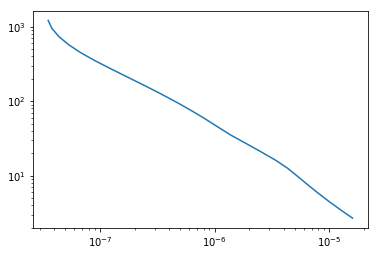

In [28]:
plt.loglog(*fsvals.T)

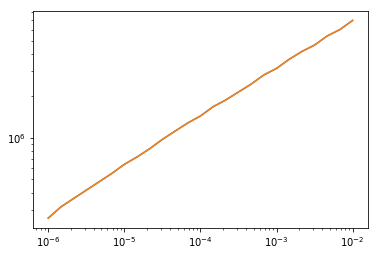

In [29]:
plt.loglog(prange, [float(s['x'][0]) for s in solutions])
plt.loglog(prange, [float(s['x'][1]) for s in solutions])

In [49]:
getx = ca.Function('getx', [solver_setup['x']], model.xs)
getp = ca.Function('getp', [solver_setup['x']], model.ps)

[7.695477128140819e-05, 536.3443066030061]


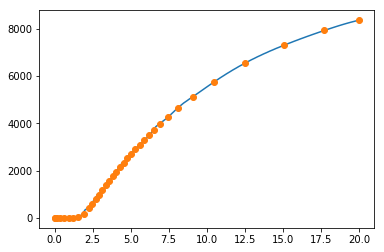

In [51]:
print([float(p) for p in getp(solutions[-1]['x'])])
plt.plot(model.observation_times, getx(solutions[-1]['x'])[-1], label='model')
plt.plot(sol.t, sol.y[-1,:], 'o', label='data')

In [52]:
xs_recovered = getx(solutions[-1]['x'])
[float(x[10]) for x in xs_recovered]

[6972539.268485844, 1.0848091192005895, 350.33998485143496]

In [42]:
p_recovered = solutions[-1]['x'][:2]
sol_recovered = solve_ivp(lambda t, y: system(t, y, p_recovered), tspan, [x[0] for x in xs_recovered])
plt.plot(sol_recovered.t, sol_recovered.y.T)

KeyboardInterrupt: 